# Collaboration and Competition

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env_file_name = "Tennis_Windows_x86_64/Tennis.exe"
# env = UnityEnvironment(file_name=env_file_name)
env = UnityEnvironment(file_name=env_file_name,no_graphics=True)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])
print('states shape : ',states.shape)
print('Both states look like : ',states)
print(2*states)

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]
states shape :  (2, 24)
Both states look like :  [[ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.         -6.65278625 -1.5
  -0.          0.          6.83172083  6.         -0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.         -6.4669857  -1.5
   0.          0.         -6.83172083  6.          0.          0.

### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [5]:
if False:
    total_scores = []
    for i in range(100):                                        # play game for 5 episodes
        env_info = env.reset(train_mode=True)[brain_name]     # reset the environment    
        states = env_info.vector_observations                  # get the current state (for each agent)
        scores = np.zeros(num_agents)                          # initialize the score (for each agent)
        t = 0
        while True:
            actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
            actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
            # print('actions : ',actions)
            env_info = env.step(actions)[brain_name]           # send all actions to tne environment
            t += 1
            next_states = env_info.vector_observations         # get next state (for each agent)
            rewards = env_info.rewards                         # get reward (for each agent)
            dones = env_info.local_done                        # see if episode finished
            scores += env_info.rewards                         # update the score (for each agent)
            states = next_states                               # roll over states to next time step
            if np.any(dones):                                  # exit loop if episode finished
                break
        print('Score (max over agents) from episode {}: {}, and {} steps taken'.format(i, np.max(scores),t))
        print(scores)
        total_scores.append(scores)
    print('Average Random Score : ', np.mean(total_scores))
        
def plot_results(results):
    import matplotlib.pyplot as plt
    import torch
    plt.ion()

    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(np.arange(len(results.all_rewards)), [np.sum(ar) for ar in results.all_rewards])
    plt.plot(np.arange(len(results.avg_rewards)), results.avg_rewards)
    plt.ylabel('Rewards')
    plt.xlabel('Episode #')
    plt.show()

    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(np.arange(len(results.critic_loss)), results.critic_loss)
    plt.ylabel('critic_losses')
    plt.xlabel('Learn Step #')
    plt.show()

    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(np.arange(len(results.actor_loss)), results.actor_loss)
    plt.ylabel('actor_losses')
    plt.xlabel('Learn Step #')
    plt.show()

# env.close()

When finished, you can close the environment.

-------------------------------------
New Run :
-------------------------------------
Config Parameters    : 
gamma                : 0.99
tau                  : 0.01
action_size          : 2
state_size           : 24
hidden_size          : 256
buffer_size          : 50000
batch_size           : 256
seed                 : 64
max_episodes         : 3023
dropout              : 0.01
learn_every          : 1
learn_num            : 2
critic_learning_rate : 0.001
actor_learning_rate  : 0.001
noise_decay          : 0.999
sigma                : 1
num_agents           : 2
env_file_name        : Tennis_Windows_x86_64/Tennis.exe
load_model           : False
save_model           : True
train_mode           : True
brain_name           : TennisBrain
Running on device :  cpu


c:\programdata\anaconda3\envs\drlnd\lib\site-packages\numpy\core\fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\programdata\anaconda3\envs\drlnd\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Episode 0 with 15 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.999 || 0.138 seconds, mem : 15


Episode 20 with 15 steps || Reward : [ 0.   -0.01] || avg reward :  0.000 || Noise  0.979 || 0.236 seconds, mem : 299


Episode 40 with 15 steps || Reward : [-0.01  0.  ] || avg reward :  0.000 || Noise  0.960 || 0.254 seconds, mem : 583


Episode 42 with 29 steps || Reward : [0.   0.09] || avg reward :  0.002 || Noise  0.958 || 0.317 seconds, mem : 626


Episode 60 with 15 steps || Reward : [-0.01  0.  ] || avg reward :  0.001 || Noise  0.941 || 0.177 seconds, mem : 882


Episode 80 with 15 steps || Reward : [ 0.   -0.01] || avg reward :  0.001 || Noise  0.922 || 0.195 seconds, mem : 1166


Episode 100 with 15 steps || Reward : [ 0.   -0.01] || avg reward :  0.001 || Noise  0.904 || 0.193 seconds, mem : 1450


Episode 120 with 15 steps || Reward : [-0.01  0.  ] || avg reward :  0.001 || Noise  0.886 || 0.189 seconds, mem : 1734


Episode 140 with 15 steps || Reward : [-0.01  0.  ] || avg reward :  0.001 || Noise  0.868 || 0.183 seconds, mem : 2018


Episode 146 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.001 || Noise  0.863 || 0.254 seconds, mem : 2119


Episode 160 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.001 || Noise  0.851 || 0.200 seconds, mem : 2318


Episode 180 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.001 || Noise  0.834 || 0.221 seconds, mem : 2602


Episode 200 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.001 || Noise  0.818 || 0.202 seconds, mem : 2886


Episode 209 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.002 || Noise  0.810 || 0.277 seconds, mem : 3031


Episode 220 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.002 || Noise  0.802 || 0.195 seconds, mem : 3187


Episode 240 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.002 || Noise  0.786 || 0.230 seconds, mem : 3471


Episode 245 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.003 || Noise  0.782 || 0.313 seconds, mem : 3560


Episode 254 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.003 || Noise  0.775 || 0.302 seconds, mem : 3703


Episode 260 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.003 || Noise  0.770 || 0.216 seconds, mem : 3788


Episode 280 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.003 || Noise  0.755 || 0.202 seconds, mem : 4071


Episode 286 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.004 || Noise  0.750 || 0.283 seconds, mem : 4173


Episode 300 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.004 || Noise  0.740 || 0.210 seconds, mem : 4371
Episode 301 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.005 || Noise  0.739 || 0.292 seconds, mem : 4402


Episode 311 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.005 || Noise  0.732 || 0.290 seconds, mem : 4569


Episode 319 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.006 || Noise  0.726 || 0.288 seconds, mem : 4699


Episode 320 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.006 || Noise  0.725 || 0.231 seconds, mem : 4713


Episode 333 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.007 || Noise  0.716 || 0.285 seconds, mem : 4913


Episode 335 with 29 steps || Reward : [ 0.1  -0.01] || avg reward :  0.008 || Noise  0.715 || 0.267 seconds, mem : 4957
Episode 338 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.009 || Noise  0.712 || 0.276 seconds, mem : 5016


Episode 340 with 30 steps || Reward : [-0.01  0.  ] || avg reward :  0.009 || Noise  0.711 || 0.314 seconds, mem : 5060


Episode 360 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.007 || Noise  0.697 || 0.204 seconds, mem : 5344


Episode 364 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.008 || Noise  0.694 || 0.252 seconds, mem : 5418


Episode 380 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.008 || Noise  0.683 || 0.136 seconds, mem : 5645
Episode 381 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.009 || Noise  0.682 || 0.177 seconds, mem : 5675


Episode 390 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.009 || Noise  0.676 || 0.210 seconds, mem : 5819
Episode 392 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.010 || Noise  0.675 || 0.215 seconds, mem : 5864
Episode 393 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.011 || Noise  0.674 || 0.186 seconds, mem : 5895


Episode 400 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.011 || Noise  0.670 || 0.152 seconds, mem : 5994


Episode 403 with 29 steps || Reward : [ 0.1  -0.01] || avg reward :  0.011 || Noise  0.668 || 0.192 seconds, mem : 6052
Episode 407 with 28 steps || Reward : [-0.01  0.1 ] || avg reward :  0.012 || Noise  0.665 || 0.204 seconds, mem : 6123


Episode 416 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.012 || Noise  0.659 || 0.276 seconds, mem : 6267
Episode 419 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.012 || Noise  0.657 || 0.328 seconds, mem : 6327
Episode 420 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.012 || Noise  0.656 || 0.208 seconds, mem : 6341


Episode 440 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.010 || Noise  0.643 || 0.463 seconds, mem : 6650


Episode 443 with 32 steps || Reward : [0.   0.09] || avg reward :  0.011 || Noise  0.641 || 0.457 seconds, mem : 6710


Episode 444 with 31 steps || Reward : [0.   0.09] || avg reward :  0.012 || Noise  0.641 || 0.480 seconds, mem : 6741
Episode 447 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.013 || Noise  0.639 || 0.289 seconds, mem : 6800


Episode 449 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.014 || Noise  0.637 || 0.408 seconds, mem : 6846


Episode 451 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.015 || Noise  0.636 || 0.402 seconds, mem : 6892
Episode 453 with 32 steps || Reward : [0.   0.09] || avg reward :  0.016 || Noise  0.635 || 0.344 seconds, mem : 6938


Episode 457 with 31 steps || Reward : [0.   0.09] || avg reward :  0.017 || Noise  0.632 || 0.317 seconds, mem : 7012


Episode 458 with 29 steps || Reward : [ 0.1  -0.01] || avg reward :  0.018 || Noise  0.632 || 0.422 seconds, mem : 7041
Episode 460 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.018 || Noise  0.631 || 0.241 seconds, mem : 7069


Episode 463 with 27 steps || Reward : [-0.01  0.1 ] || avg reward :  0.019 || Noise  0.629 || 0.285 seconds, mem : 7124
Episode 465 with 31 steps || Reward : [0.   0.09] || avg reward :  0.019 || Noise  0.627 || 0.283 seconds, mem : 7169


Episode 471 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.020 || Noise  0.624 || 0.257 seconds, mem : 7271


Episode 473 with 30 steps || Reward : [0.   0.09] || avg reward :  0.020 || Noise  0.622 || 0.274 seconds, mem : 7315
Episode 474 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.021 || Noise  0.622 || 0.284 seconds, mem : 7345


Episode 479 with 29 steps || Reward : [0.   0.09] || avg reward :  0.022 || Noise  0.619 || 0.265 seconds, mem : 7431
Episode 480 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.022 || Noise  0.618 || 0.199 seconds, mem : 7445


Episode 482 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.022 || Noise  0.617 || 0.262 seconds, mem : 7490
Episode 483 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.023 || Noise  0.616 || 0.288 seconds, mem : 7522


Episode 489 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.024 || Noise  0.612 || 0.270 seconds, mem : 7634


Episode 493 with 41 steps || Reward : [ 0.1  -0.01] || avg reward :  0.022 || Noise  0.610 || 0.306 seconds, mem : 7718
Episode 494 with 26 steps || Reward : [ 0.1  -0.01] || avg reward :  0.023 || Noise  0.609 || 0.247 seconds, mem : 7744


Episode 496 with 31 steps || Reward : [0.   0.09] || avg reward :  0.024 || Noise  0.608 || 0.282 seconds, mem : 7789
Episode 499 with 30 steps || Reward : [0.   0.09] || avg reward :  0.025 || Noise  0.606 || 0.251 seconds, mem : 7848
Episode 500 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.025 || Noise  0.606 || 0.184 seconds, mem : 7862


Episode 502 with 29 steps || Reward : [ 0.1  -0.01] || avg reward :  0.026 || Noise  0.605 || 0.275 seconds, mem : 7913
Episode 504 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.026 || Noise  0.603 || 0.256 seconds, mem : 7957


Episode 506 with 31 steps || Reward : [-0.01  0.1 ] || avg reward :  0.027 || Noise  0.602 || 0.254 seconds, mem : 8002


Episode 512 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.027 || Noise  0.599 || 0.259 seconds, mem : 8107
Episode 513 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.028 || Noise  0.598 || 0.264 seconds, mem : 8138
Episode 514 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.029 || Noise  0.597 || 0.265 seconds, mem : 8168


Episode 515 with 29 steps || Reward : [ 0.1  -0.01] || avg reward :  0.030 || Noise  0.597 || 0.271 seconds, mem : 8197
Episode 517 with 28 steps || Reward : [ 0.1  -0.01] || avg reward :  0.030 || Noise  0.596 || 0.467 seconds, mem : 8239
Episode 518 with 32 steps || Reward : [0.   0.09] || avg reward :  0.031 || Noise  0.595 || 0.327 seconds, mem : 8271


Episode 520 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.030 || Noise  0.594 || 0.201 seconds, mem : 8299


Episode 525 with 31 steps || Reward : [0.   0.09] || avg reward :  0.031 || Noise  0.591 || 0.290 seconds, mem : 8387
Episode 527 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.032 || Noise  0.590 || 0.261 seconds, mem : 8431


Episode 529 with 26 steps || Reward : [-0.01  0.1 ] || avg reward :  0.033 || Noise  0.588 || 0.241 seconds, mem : 8471
Episode 531 with 31 steps || Reward : [0.   0.09] || avg reward :  0.034 || Noise  0.587 || 0.265 seconds, mem : 8516
Episode 533 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.035 || Noise  0.586 || 0.267 seconds, mem : 8560


Episode 535 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.036 || Noise  0.585 || 0.252 seconds, mem : 8604


Episode 538 with 30 steps || Reward : [0.   0.09] || avg reward :  0.037 || Noise  0.583 || 0.321 seconds, mem : 8663
Episode 540 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.037 || Noise  0.582 || 0.272 seconds, mem : 8707
Episode 541 with 30 steps || Reward : [0.   0.09] || avg reward :  0.038 || Noise  0.581 || 0.268 seconds, mem : 8737


Episode 547 with 34 steps || Reward : [0.1  0.09] || avg reward :  0.036 || Noise  0.578 || 0.289 seconds, mem : 8842
Episode 548 with 27 steps || Reward : [-0.01  0.1 ] || avg reward :  0.037 || Noise  0.577 || 0.241 seconds, mem : 8869


Episode 549 with 29 steps || Reward : [ 0.1  -0.01] || avg reward :  0.037 || Noise  0.577 || 0.250 seconds, mem : 8898
Episode 552 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.037 || Noise  0.575 || 0.249 seconds, mem : 8957
Episode 553 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.037 || Noise  0.574 || 0.265 seconds, mem : 8988


Episode 555 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.038 || Noise  0.573 || 0.295 seconds, mem : 9034
Episode 556 with 28 steps || Reward : [ 0.1  -0.01] || avg reward :  0.039 || Noise  0.573 || 0.247 seconds, mem : 9062
Episode 557 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.039 || Noise  0.572 || 0.260 seconds, mem : 9092


Episode 559 with 30 steps || Reward : [0.   0.09] || avg reward :  0.039 || Noise  0.571 || 0.296 seconds, mem : 9136
Episode 560 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.039 || Noise  0.570 || 0.195 seconds, mem : 9150


Episode 568 with 32 steps || Reward : [0.   0.09] || avg reward :  0.038 || Noise  0.566 || 0.287 seconds, mem : 9281


Episode 571 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.038 || Noise  0.564 || 0.256 seconds, mem : 9339
Episode 572 with 34 steps || Reward : [0.1  0.09] || avg reward :  0.039 || Noise  0.564 || 0.287 seconds, mem : 9373


Episode 575 with 31 steps || Reward : [0.   0.09] || avg reward :  0.038 || Noise  0.562 || 0.265 seconds, mem : 9432


Episode 579 with 29 steps || Reward : [0.   0.09] || avg reward :  0.038 || Noise  0.560 || 0.254 seconds, mem : 9504
Episode 580 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.038 || Noise  0.559 || 0.191 seconds, mem : 9518
Episode 582 with 30 steps || Reward : [0.   0.09] || avg reward :  0.038 || Noise  0.558 || 0.287 seconds, mem : 9562


Episode 589 with 30 steps || Reward : [0.   0.09] || avg reward :  0.037 || Noise  0.554 || 0.255 seconds, mem : 9682
Episode 590 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.038 || Noise  0.554 || 0.271 seconds, mem : 9712
Episode 593 with 29 steps || Reward : [0.   0.09] || avg reward :  0.038 || Noise  0.552 || 0.248 seconds, mem : 9770


Episode 594 with 33 steps || Reward : [0.   0.09] || avg reward :  0.038 || Noise  0.551 || 0.268 seconds, mem : 9803


Episode 600 with 15 steps || Reward : [-0.01  0.  ] || avg reward :  0.036 || Noise  0.548 || 0.249 seconds, mem : 9892
Episode 601 with 31 steps || Reward : [0.   0.09] || avg reward :  0.037 || Noise  0.548 || 0.260 seconds, mem : 9923


Episode 604 with 32 steps || Reward : [0.   0.09] || avg reward :  0.036 || Noise  0.546 || 0.278 seconds, mem : 9983
Episode 606 with 30 steps || Reward : [0.   0.09] || avg reward :  0.035 || Noise  0.545 || 0.263 seconds, mem : 10027
Episode 607 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.036 || Noise  0.544 || 0.258 seconds, mem : 10058


Episode 609 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.037 || Noise  0.543 || 0.283 seconds, mem : 10104
Episode 610 with 32 steps || Reward : [-0.01  0.1 ] || avg reward :  0.038 || Noise  0.543 || 0.289 seconds, mem : 10136
Episode 611 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.039 || Noise  0.542 || 0.258 seconds, mem : 10167
Episode 612 with 41 steps || Reward : [0.   0.09] || avg reward :  0.039 || Noise  0.542 || 0.356 seconds, mem : 10208


Episode 616 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.037 || Noise  0.539 || 0.279 seconds, mem : 10281


Episode 618 with 31 steps || Reward : [0.   0.09] || avg reward :  0.036 || Noise  0.538 || 0.265 seconds, mem : 10326
Episode 619 with 31 steps || Reward : [-0.01  0.1 ] || avg reward :  0.037 || Noise  0.538 || 0.266 seconds, mem : 10357
Episode 620 with 13 steps || Reward : [-0.01  0.  ] || avg reward :  0.037 || Noise  0.537 || 0.215 seconds, mem : 10370
Episode 621 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.038 || Noise  0.537 || 0.278 seconds, mem : 10402


Episode 623 with 30 steps || Reward : [0.   0.09] || avg reward :  0.039 || Noise  0.536 || 0.251 seconds, mem : 10446
Episode 626 with 31 steps || Reward : [0.   0.09] || avg reward :  0.039 || Noise  0.534 || 0.266 seconds, mem : 10505


Episode 629 with 32 steps || Reward : [0.   0.09] || avg reward :  0.038 || Noise  0.532 || 0.301 seconds, mem : 10566


Episode 634 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.037 || Noise  0.530 || 0.286 seconds, mem : 10656
Episode 635 with 30 steps || Reward : [0.   0.09] || avg reward :  0.037 || Noise  0.529 || 0.284 seconds, mem : 10686
Episode 636 with 29 steps || Reward : [-0.01  0.1 ] || avg reward :  0.038 || Noise  0.529 || 0.251 seconds, mem : 10715


Episode 637 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.039 || Noise  0.528 || 0.283 seconds, mem : 10748
Episode 638 with 31 steps || Reward : [0.   0.09] || avg reward :  0.039 || Noise  0.528 || 0.280 seconds, mem : 10779
Episode 640 with 41 steps || Reward : [0.   0.09] || avg reward :  0.039 || Noise  0.527 || 0.286 seconds, mem : 10834


Episode 641 with 32 steps || Reward : [0.   0.09] || avg reward :  0.039 || Noise  0.526 || 0.304 seconds, mem : 10866
Episode 642 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.040 || Noise  0.526 || 0.278 seconds, mem : 10898


Episode 645 with 42 steps || Reward : [-0.01  0.1 ] || avg reward :  0.041 || Noise  0.524 || 0.335 seconds, mem : 10968
Episode 646 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.042 || Noise  0.523 || 0.268 seconds, mem : 10998


Episode 651 with 29 steps || Reward : [-0.01  0.1 ] || avg reward :  0.040 || Noise  0.521 || 0.271 seconds, mem : 11083


Episode 655 with 31 steps || Reward : [0.   0.09] || avg reward :  0.038 || Noise  0.519 || 0.267 seconds, mem : 11155
Episode 656 with 31 steps || Reward : [0.   0.09] || avg reward :  0.038 || Noise  0.518 || 0.279 seconds, mem : 11186
Episode 657 with 43 steps || Reward : [0.   0.09] || avg reward :  0.038 || Noise  0.518 || 0.303 seconds, mem : 11229


Episode 660 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.038 || Noise  0.516 || 0.270 seconds, mem : 11289
Episode 662 with 32 steps || Reward : [0.   0.09] || avg reward :  0.039 || Noise  0.515 || 0.284 seconds, mem : 11336


Episode 663 with 28 steps || Reward : [ 0.1  -0.01] || avg reward :  0.040 || Noise  0.515 || 0.268 seconds, mem : 11364


Episode 669 with 34 steps || Reward : [ 0.1  -0.01] || avg reward :  0.040 || Noise  0.512 || 0.286 seconds, mem : 11468
Episode 670 with 31 steps || Reward : [0.   0.09] || avg reward :  0.041 || Noise  0.511 || 0.266 seconds, mem : 11499


Episode 673 with 31 steps || Reward : [0.   0.09] || avg reward :  0.040 || Noise  0.509 || 0.282 seconds, mem : 11558
Episode 677 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.040 || Noise  0.507 || 0.257 seconds, mem : 11639


Episode 679 with 32 steps || Reward : [0.   0.09] || avg reward :  0.040 || Noise  0.506 || 0.282 seconds, mem : 11685
Episode 680 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.040 || Noise  0.506 || 0.203 seconds, mem : 11699


Episode 681 with 31 steps || Reward : [0.   0.09] || avg reward :  0.041 || Noise  0.505 || 0.360 seconds, mem : 11730
Episode 684 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.041 || Noise  0.504 || 0.313 seconds, mem : 11789


Episode 686 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.042 || Noise  0.503 || 0.377 seconds, mem : 11835
Episode 687 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.043 || Noise  0.502 || 0.298 seconds, mem : 11865
Episode 688 with 31 steps || Reward : [0.   0.09] || avg reward :  0.044 || Noise  0.502 || 0.285 seconds, mem : 11896


Episode 690 with 29 steps || Reward : [ 0.1  -0.01] || avg reward :  0.043 || Noise  0.501 || 0.266 seconds, mem : 11940
Episode 692 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.044 || Noise  0.500 || 0.268 seconds, mem : 11984


Episode 694 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.043 || Noise  0.499 || 0.294 seconds, mem : 12031
Episode 695 with 31 steps || Reward : [0.   0.09] || avg reward :  0.044 || Noise  0.498 || 0.280 seconds, mem : 12062
Episode 696 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.045 || Noise  0.498 || 0.285 seconds, mem : 12092
Episode 697 with 33 steps || Reward : [0.   0.09] || avg reward :  0.046 || Noise  0.497 || 0.310 seconds, mem : 12125


Episode 699 with 30 steps || Reward : [0.   0.09] || avg reward :  0.047 || Noise  0.496 || 0.266 seconds, mem : 12169
Episode 700 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.048 || Noise  0.496 || 0.285 seconds, mem : 12202
Episode 701 with 30 steps || Reward : [0.   0.09] || avg reward :  0.048 || Noise  0.495 || 0.294 seconds, mem : 12232


Episode 703 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.049 || Noise  0.494 || 0.289 seconds, mem : 12279


Episode 707 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.047 || Noise  0.492 || 0.270 seconds, mem : 12356
Episode 708 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.048 || Noise  0.492 || 0.299 seconds, mem : 12388
Episode 709 with 29 steps || Reward : [0.   0.09] || avg reward :  0.048 || Noise  0.491 || 0.295 seconds, mem : 12417
Episode 710 with 30 steps || Reward : [0.   0.09] || avg reward :  0.048 || Noise  0.491 || 0.282 seconds, mem : 12447


Episode 711 with 32 steps || Reward : [0.   0.09] || avg reward :  0.048 || Noise  0.490 || 0.274 seconds, mem : 12479
Episode 714 with 32 steps || Reward : [0.   0.09] || avg reward :  0.048 || Noise  0.489 || 0.272 seconds, mem : 12539


Episode 715 with 31 steps || Reward : [0.   0.09] || avg reward :  0.048 || Noise  0.489 || 0.281 seconds, mem : 12570
Episode 717 with 32 steps || Reward : [0.   0.09] || avg reward :  0.048 || Noise  0.488 || 0.282 seconds, mem : 12616


Episode 720 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.046 || Noise  0.486 || 0.211 seconds, mem : 12658
Episode 721 with 31 steps || Reward : [0.   0.09] || avg reward :  0.046 || Noise  0.486 || 0.290 seconds, mem : 12689
Episode 723 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.046 || Noise  0.485 || 0.295 seconds, mem : 12737


Episode 725 with 34 steps || Reward : [ 0.1  -0.01] || avg reward :  0.047 || Noise  0.484 || 0.289 seconds, mem : 12785
Episode 726 with 34 steps || Reward : [ 0.1  -0.01] || avg reward :  0.048 || Noise  0.483 || 0.287 seconds, mem : 12819
Episode 727 with 32 steps || Reward : [0.   0.09] || avg reward :  0.048 || Noise  0.483 || 0.259 seconds, mem : 12851


Episode 730 with 31 steps || Reward : [0.   0.09] || avg reward :  0.048 || Noise  0.481 || 0.275 seconds, mem : 12910
Episode 732 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.049 || Noise  0.480 || 0.288 seconds, mem : 12956


Episode 733 with 32 steps || Reward : [0.   0.09] || avg reward :  0.050 || Noise  0.480 || 0.297 seconds, mem : 12988
Episode 737 with 43 steps || Reward : [0.1  0.09] || avg reward :  0.047 || Noise  0.478 || 0.322 seconds, mem : 13073


Episode 738 with 32 steps || Reward : [0.   0.09] || avg reward :  0.047 || Noise  0.477 || 0.285 seconds, mem : 13105
Episode 740 with 32 steps || Reward : [0.   0.09] || avg reward :  0.047 || Noise  0.476 || 0.310 seconds, mem : 13157


Episode 743 with 30 steps || Reward : [0.   0.09] || avg reward :  0.046 || Noise  0.475 || 0.263 seconds, mem : 13234
Episode 744 with 32 steps || Reward : [0.   0.09] || avg reward :  0.047 || Noise  0.475 || 0.341 seconds, mem : 13266


Episode 749 with 30 steps || Reward : [0.   0.09] || avg reward :  0.046 || Noise  0.472 || 0.258 seconds, mem : 13352


Episode 751 with 29 steps || Reward : [0.   0.09] || avg reward :  0.046 || Noise  0.471 || 0.242 seconds, mem : 13396
Episode 752 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.047 || Noise  0.471 || 0.327 seconds, mem : 13429
Episode 754 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.048 || Noise  0.470 || 0.297 seconds, mem : 13475


Episode 757 with 27 steps || Reward : [-0.01  0.1 ] || avg reward :  0.046 || Noise  0.468 || 0.249 seconds, mem : 13530
Episode 758 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.047 || Noise  0.468 || 0.298 seconds, mem : 13563


Episode 759 with 29 steps || Reward : [0.   0.09] || avg reward :  0.048 || Noise  0.467 || 0.274 seconds, mem : 13592
Episode 760 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.048 || Noise  0.467 || 0.307 seconds, mem : 13623
Episode 761 with 34 steps || Reward : [ 0.1  -0.01] || avg reward :  0.049 || Noise  0.467 || 0.318 seconds, mem : 13657
Episode 762 with 31 steps || Reward : [0.   0.09] || avg reward :  0.049 || Noise  0.466 || 0.271 seconds, mem : 13688


Episode 764 with 32 steps || Reward : [0.   0.09] || avg reward :  0.049 || Noise  0.465 || 0.289 seconds, mem : 13736
Episode 765 with 32 steps || Reward : [0.   0.09] || avg reward :  0.050 || Noise  0.465 || 0.295 seconds, mem : 13768
Episode 766 with 30 steps || Reward : [0.   0.09] || avg reward :  0.051 || Noise  0.464 || 0.264 seconds, mem : 13798


Episode 767 with 30 steps || Reward : [0.   0.09] || avg reward :  0.052 || Noise  0.464 || 0.292 seconds, mem : 13828
Episode 769 with 31 steps || Reward : [0.   0.09] || avg reward :  0.052 || Noise  0.463 || 0.262 seconds, mem : 13879
Episode 770 with 30 steps || Reward : [0.   0.09] || avg reward :  0.052 || Noise  0.462 || 0.276 seconds, mem : 13909


Episode 771 with 30 steps || Reward : [0.   0.09] || avg reward :  0.053 || Noise  0.462 || 0.261 seconds, mem : 13939
Episode 773 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.053 || Noise  0.461 || 0.262 seconds, mem : 13986
Episode 774 with 32 steps || Reward : [0.   0.09] || avg reward :  0.054 || Noise  0.461 || 0.287 seconds, mem : 14018


Episode 776 with 31 steps || Reward : [0.   0.09] || avg reward :  0.055 || Noise  0.460 || 0.289 seconds, mem : 14063
Episode 778 with 31 steps || Reward : [0.   0.09] || avg reward :  0.055 || Noise  0.459 || 0.290 seconds, mem : 14108
Episode 780 with 31 steps || Reward : [0.   0.09] || avg reward :  0.055 || Noise  0.458 || 0.293 seconds, mem : 14153


Episode 785 with 30 steps || Reward : [0.   0.09] || avg reward :  0.054 || Noise  0.455 || 0.270 seconds, mem : 14240


Episode 786 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.054 || Noise  0.455 || 0.300 seconds, mem : 14273


Episode 790 with 30 steps || Reward : [0.   0.09] || avg reward :  0.052 || Noise  0.453 || 0.279 seconds, mem : 14346
Episode 793 with 33 steps || Reward : [ 0.1  -0.02] || avg reward :  0.052 || Noise  0.452 || 0.269 seconds, mem : 14408


Episode 796 with 30 steps || Reward : [0.   0.09] || avg reward :  0.050 || Noise  0.450 || 0.252 seconds, mem : 14466
Episode 797 with 30 steps || Reward : [0.   0.09] || avg reward :  0.050 || Noise  0.450 || 0.288 seconds, mem : 14496


Episode 799 with 30 steps || Reward : [0.   0.09] || avg reward :  0.050 || Noise  0.449 || 0.287 seconds, mem : 14540
Episode 800 with 30 steps || Reward : [0.   0.09] || avg reward :  0.049 || Noise  0.449 || 0.254 seconds, mem : 14570
Episode 801 with 33 steps || Reward : [ 0.1  -0.02] || avg reward :  0.050 || Noise  0.448 || 0.295 seconds, mem : 14603


Episode 802 with 30 steps || Reward : [0.   0.09] || avg reward :  0.050 || Noise  0.448 || 0.262 seconds, mem : 14633
Episode 803 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.050 || Noise  0.447 || 0.308 seconds, mem : 14666
Episode 804 with 34 steps || Reward : [ 0.1  -0.01] || avg reward :  0.051 || Noise  0.447 || 0.281 seconds, mem : 14700


Episode 809 with 31 steps || Reward : [0.   0.09] || avg reward :  0.049 || Noise  0.445 || 0.282 seconds, mem : 14796
Episode 810 with 35 steps || Reward : [0.1  0.09] || avg reward :  0.050 || Noise  0.444 || 0.282 seconds, mem : 14831


Episode 812 with 30 steps || Reward : [0.   0.09] || avg reward :  0.050 || Noise  0.443 || 0.269 seconds, mem : 14875
Episode 813 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.051 || Noise  0.443 || 0.299 seconds, mem : 14908


Episode 815 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.050 || Noise  0.442 || 0.292 seconds, mem : 14955
Episode 817 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.050 || Noise  0.441 || 0.297 seconds, mem : 15002
Episode 818 with 33 steps || Reward : [ 0.1  -0.02] || avg reward :  0.051 || Noise  0.441 || 0.292 seconds, mem : 15035


Episode 820 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.051 || Noise  0.440 || 0.196 seconds, mem : 15063
Episode 821 with 32 steps || Reward : [0.   0.09] || avg reward :  0.051 || Noise  0.439 || 0.298 seconds, mem : 15095
Episode 822 with 30 steps || Reward : [0.   0.09] || avg reward :  0.052 || Noise  0.439 || 0.265 seconds, mem : 15125
Episode 823 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.052 || Noise  0.438 || 0.296 seconds, mem : 15158


Episode 824 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.053 || Noise  0.438 || 0.278 seconds, mem : 15191
Episode 825 with 30 steps || Reward : [0.   0.09] || avg reward :  0.053 || Noise  0.438 || 0.287 seconds, mem : 15221
Episode 826 with 31 steps || Reward : [0.   0.09] || avg reward :  0.053 || Noise  0.437 || 0.275 seconds, mem : 15252


Episode 828 with 35 steps || Reward : [ 0.1  -0.01] || avg reward :  0.053 || Noise  0.436 || 0.295 seconds, mem : 15301


Episode 833 with 31 steps || Reward : [0.   0.09] || avg reward :  0.051 || Noise  0.434 || 0.280 seconds, mem : 15408
Episode 834 with 30 steps || Reward : [0.   0.09] || avg reward :  0.052 || Noise  0.434 || 0.281 seconds, mem : 15438
Episode 837 with 29 steps || Reward : [0.   0.09] || avg reward :  0.052 || Noise  0.432 || 0.273 seconds, mem : 15496


Episode 838 with 30 steps || Reward : [0.   0.09] || avg reward :  0.052 || Noise  0.432 || 0.269 seconds, mem : 15526
Episode 840 with 33 steps || Reward : [0.1  0.09] || avg reward :  0.052 || Noise  0.431 || 0.281 seconds, mem : 15573
Episode 841 with 29 steps || Reward : [ 0.1  -0.01] || avg reward :  0.053 || Noise  0.431 || 0.274 seconds, mem : 15602


Episode 846 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.052 || Noise  0.429 || 0.263 seconds, mem : 15691


Episode 852 with 33 steps || Reward : [-0.01  0.1 ] || avg reward :  0.050 || Noise  0.426 || 0.318 seconds, mem : 15795
Episode 853 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.051 || Noise  0.426 || 0.381 seconds, mem : 15827


Episode 856 with 31 steps || Reward : [0.   0.09] || avg reward :  0.051 || Noise  0.424 || 0.280 seconds, mem : 15889
Episode 857 with 29 steps || Reward : [0.   0.09] || avg reward :  0.051 || Noise  0.424 || 0.283 seconds, mem : 15918
Episode 858 with 36 steps || Reward : [0.1  0.09] || avg reward :  0.051 || Noise  0.423 || 0.334 seconds, mem : 15954


Episode 860 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.049 || Noise  0.423 || 0.274 seconds, mem : 15982
Episode 861 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.049 || Noise  0.422 || 0.338 seconds, mem : 16014


Episode 865 with 31 steps || Reward : [0.   0.09] || avg reward :  0.047 || Noise  0.420 || 0.307 seconds, mem : 16089
Episode 866 with 30 steps || Reward : [0.   0.09] || avg reward :  0.047 || Noise  0.420 || 0.357 seconds, mem : 16119


Episode 869 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.046 || Noise  0.419 || 0.323 seconds, mem : 16199
Episode 870 with 30 steps || Reward : [0.   0.09] || avg reward :  0.046 || Noise  0.418 || 0.342 seconds, mem : 16229


Episode 873 with 31 steps || Reward : [0.   0.09] || avg reward :  0.045 || Noise  0.417 || 0.368 seconds, mem : 16288


Episode 876 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.045 || Noise  0.416 || 0.292 seconds, mem : 16355
Episode 877 with 29 steps || Reward : [ 0.1  -0.01] || avg reward :  0.046 || Noise  0.415 || 0.312 seconds, mem : 16384
Episode 879 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.046 || Noise  0.415 || 0.299 seconds, mem : 16431


Episode 880 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.045 || Noise  0.414 || 0.247 seconds, mem : 16445


Episode 888 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.044 || Noise  0.411 || 0.300 seconds, mem : 16577


Episode 891 with 33 steps || Reward : [ 0.1  -0.02] || avg reward :  0.044 || Noise  0.410 || 0.297 seconds, mem : 16638


Episode 894 with 28 steps || Reward : [ 0.1  -0.01] || avg reward :  0.044 || Noise  0.408 || 0.260 seconds, mem : 16695
Episode 898 with 33 steps || Reward : [-0.01  0.1 ] || avg reward :  0.043 || Noise  0.407 || 0.292 seconds, mem : 16770


Episode 900 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.042 || Noise  0.406 || 0.289 seconds, mem : 16815
Episode 902 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.041 || Noise  0.405 || 0.288 seconds, mem : 16861


Episode 904 with 29 steps || Reward : [0.   0.09] || avg reward :  0.040 || Noise  0.404 || 0.281 seconds, mem : 16904


Episode 907 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.041 || Noise  0.403 || 0.286 seconds, mem : 16969
Episode 910 with 32 steps || Reward : [0.   0.09] || avg reward :  0.040 || Noise  0.402 || 0.296 seconds, mem : 17032


Episode 911 with 34 steps || Reward : [ 0.1  -0.01] || avg reward :  0.041 || Noise  0.402 || 0.298 seconds, mem : 17066
Episode 912 with 30 steps || Reward : [0.   0.09] || avg reward :  0.041 || Noise  0.401 || 0.345 seconds, mem : 17096
Episode 913 with 32 steps || Reward : [0.   0.09] || avg reward :  0.041 || Noise  0.401 || 0.288 seconds, mem : 17128


Episode 916 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.041 || Noise  0.400 || 0.323 seconds, mem : 17188
Episode 917 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.041 || Noise  0.399 || 0.314 seconds, mem : 17221


Episode 920 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.041 || Noise  0.398 || 0.320 seconds, mem : 17285
Episode 922 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.040 || Noise  0.397 || 0.282 seconds, mem : 17331


Episode 929 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.037 || Noise  0.394 || 0.291 seconds, mem : 17449
Episode 931 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.038 || Noise  0.394 || 0.294 seconds, mem : 17494


Episode 933 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.038 || Noise  0.393 || 0.297 seconds, mem : 17541
Episode 934 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.038 || Noise  0.392 || 0.287 seconds, mem : 17572


Episode 936 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.039 || Noise  0.392 || 0.290 seconds, mem : 17616
Episode 940 with 24 steps || Reward : [ 0.   -0.01] || avg reward :  0.036 || Noise  0.390 || 0.261 seconds, mem : 17683


Episode 941 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.036 || Noise  0.390 || 0.314 seconds, mem : 17716


Episode 948 with 29 steps || Reward : [0.   0.09] || avg reward :  0.036 || Noise  0.387 || 0.310 seconds, mem : 17834


Episode 952 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.036 || Noise  0.385 || 0.327 seconds, mem : 17911
Episode 954 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.036 || Noise  0.385 || 0.290 seconds, mem : 17960


Episode 956 with 29 steps || Reward : [ 0.1  -0.01] || avg reward :  0.036 || Noise  0.384 || 0.317 seconds, mem : 18003


Episode 960 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.034 || Noise  0.382 || 0.266 seconds, mem : 18066


Episode 963 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.034 || Noise  0.381 || 0.305 seconds, mem : 18145


Episode 970 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.031 || Noise  0.379 || 0.295 seconds, mem : 18265


Episode 980 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.028 || Noise  0.375 || 0.208 seconds, mem : 18409


Episode 994 with 29 steps || Reward : [0.   0.09] || avg reward :  0.025 || Noise  0.370 || 0.323 seconds, mem : 18623
Episode 995 with 30 steps || Reward : [0.   0.09] || avg reward :  0.026 || Noise  0.369 || 0.354 seconds, mem : 18653


Episode 998 with 29 steps || Reward : [0.   0.09] || avg reward :  0.026 || Noise  0.368 || 0.319 seconds, mem : 18710
Episode 1000 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.025 || Noise  0.367 || 0.219 seconds, mem : 18739


Episode 1006 with 30 steps || Reward : [0.   0.09] || avg reward :  0.024 || Noise  0.365 || 0.313 seconds, mem : 18841
Episode 1008 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.024 || Noise  0.364 || 0.286 seconds, mem : 18889


Episode 1015 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.022 || Noise  0.362 || 0.310 seconds, mem : 19006
Episode 1016 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.022 || Noise  0.361 || 0.306 seconds, mem : 19038
Episode 1017 with 30 steps || Reward : [0.   0.09] || avg reward :  0.021 || Noise  0.361 || 0.290 seconds, mem : 19068


Episode 1020 with 30 steps || Reward : [0.   0.09] || avg reward :  0.021 || Noise  0.360 || 0.283 seconds, mem : 19127


Episode 1023 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.021 || Noise  0.359 || 0.302 seconds, mem : 19188
Episode 1025 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.022 || Noise  0.358 || 0.316 seconds, mem : 19235


Episode 1031 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.021 || Noise  0.356 || 0.300 seconds, mem : 19337


Episode 1036 with 30 steps || Reward : [0.   0.09] || avg reward :  0.019 || Noise  0.354 || 0.292 seconds, mem : 19424


Episode 1038 with 44 steps || Reward : [0.   0.19] || avg reward :  0.021 || Noise  0.354 || 0.385 seconds, mem : 19482
Episode 1040 with 14 steps || Reward : [ 0.   -0.01] || avg reward :  0.021 || Noise  0.353 || 0.208 seconds, mem : 19510


Episode 1049 with 29 steps || Reward : [0.   0.09] || avg reward :  0.020 || Noise  0.350 || 0.267 seconds, mem : 19653


Episode 1052 with 30 steps || Reward : [0.   0.09] || avg reward :  0.020 || Noise  0.349 || 0.307 seconds, mem : 19715
Episode 1053 with 30 steps || Reward : [0.   0.09] || avg reward :  0.021 || Noise  0.348 || 0.285 seconds, mem : 19745


Episode 1056 with 29 steps || Reward : [0.   0.09] || avg reward :  0.020 || Noise  0.347 || 0.307 seconds, mem : 19803
Episode 1058 with 30 steps || Reward : [0.   0.09] || avg reward :  0.021 || Noise  0.347 || 0.336 seconds, mem : 19848


Episode 1060 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.021 || Noise  0.346 || 0.219 seconds, mem : 19876


Episode 1064 with 30 steps || Reward : [0.   0.09] || avg reward :  0.021 || Noise  0.345 || 0.296 seconds, mem : 19949
Episode 1065 with 30 steps || Reward : [0.   0.09] || avg reward :  0.022 || Noise  0.344 || 0.300 seconds, mem : 19979
Episode 1066 with 31 steps || Reward : [0.   0.09] || avg reward :  0.022 || Noise  0.344 || 0.310 seconds, mem : 20010
Episode 1067 with 30 steps || Reward : [0.   0.09] || avg reward :  0.023 || Noise  0.344 || 0.287 seconds, mem : 20040


Episode 1070 with 30 steps || Reward : [0.   0.09] || avg reward :  0.023 || Noise  0.342 || 0.314 seconds, mem : 20099
Episode 1071 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.024 || Noise  0.342 || 0.299 seconds, mem : 20130


Episode 1072 with 31 steps || Reward : [0.   0.09] || avg reward :  0.025 || Noise  0.342 || 0.296 seconds, mem : 20161
Episode 1073 with 29 steps || Reward : [0.   0.09] || avg reward :  0.026 || Noise  0.341 || 0.303 seconds, mem : 20190
Episode 1074 with 30 steps || Reward : [0.   0.09] || avg reward :  0.027 || Noise  0.341 || 0.325 seconds, mem : 20220
Episode 1075 with 30 steps || Reward : [0.   0.09] || avg reward :  0.028 || Noise  0.341 || 0.285 seconds, mem : 20250


Episode 1076 with 31 steps || Reward : [0.   0.09] || avg reward :  0.029 || Noise  0.340 || 0.332 seconds, mem : 20281
Episode 1078 with 29 steps || Reward : [0.   0.09] || avg reward :  0.030 || Noise  0.340 || 0.273 seconds, mem : 20326
Episode 1079 with 29 steps || Reward : [0.   0.09] || avg reward :  0.031 || Noise  0.339 || 0.301 seconds, mem : 20355


Episode 1080 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.032 || Noise  0.339 || 0.313 seconds, mem : 20386
Episode 1081 with 31 steps || Reward : [0.   0.09] || avg reward :  0.032 || Noise  0.339 || 0.313 seconds, mem : 20417
Episode 1082 with 30 steps || Reward : [0.   0.09] || avg reward :  0.033 || Noise  0.338 || 0.288 seconds, mem : 20447
Episode 1083 with 30 steps || Reward : [0.   0.09] || avg reward :  0.034 || Noise  0.338 || 0.299 seconds, mem : 20477


Episode 1085 with 30 steps || Reward : [0.   0.09] || avg reward :  0.035 || Noise  0.337 || 0.285 seconds, mem : 20521


Episode 1088 with 30 steps || Reward : [0.   0.09] || avg reward :  0.036 || Noise  0.336 || 0.298 seconds, mem : 20583
Episode 1089 with 31 steps || Reward : [0.   0.09] || avg reward :  0.037 || Noise  0.336 || 0.289 seconds, mem : 20614
Episode 1090 with 31 steps || Reward : [0.   0.09] || avg reward :  0.038 || Noise  0.336 || 0.319 seconds, mem : 20645


Episode 1093 with 31 steps || Reward : [0.   0.09] || avg reward :  0.039 || Noise  0.335 || 0.290 seconds, mem : 20704
Episode 1094 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.039 || Noise  0.334 || 0.310 seconds, mem : 20734


Episode 1096 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.039 || Noise  0.334 || 0.285 seconds, mem : 20780
Episode 1097 with 30 steps || Reward : [0.   0.09] || avg reward :  0.040 || Noise  0.333 || 0.341 seconds, mem : 20810
Episode 1099 with 30 steps || Reward : [0.   0.09] || avg reward :  0.040 || Noise  0.333 || 0.302 seconds, mem : 20855


Episode 1100 with 31 steps || Reward : [0.   0.09] || avg reward :  0.041 || Noise  0.332 || 0.289 seconds, mem : 20886
Episode 1101 with 30 steps || Reward : [0.   0.09] || avg reward :  0.042 || Noise  0.332 || 0.322 seconds, mem : 20916
Episode 1102 with 32 steps || Reward : [0.   0.09] || avg reward :  0.043 || Noise  0.332 || 0.362 seconds, mem : 20948
Episode 1103 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.044 || Noise  0.331 || 0.288 seconds, mem : 20980


Episode 1104 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.045 || Noise  0.331 || 0.328 seconds, mem : 21013
Episode 1105 with 30 steps || Reward : [0.   0.09] || avg reward :  0.045 || Noise  0.331 || 0.320 seconds, mem : 21043
Episode 1106 with 29 steps || Reward : [0.   0.09] || avg reward :  0.045 || Noise  0.330 || 0.277 seconds, mem : 21072


Episode 1109 with 31 steps || Reward : [0.   0.09] || avg reward :  0.045 || Noise  0.329 || 0.303 seconds, mem : 21131
Episode 1110 with 31 steps || Reward : [0.   0.09] || avg reward :  0.046 || Noise  0.329 || 0.286 seconds, mem : 21162
Episode 1111 with 31 steps || Reward : [0.   0.09] || avg reward :  0.047 || Noise  0.329 || 0.327 seconds, mem : 21193


Episode 1112 with 30 steps || Reward : [0.   0.09] || avg reward :  0.048 || Noise  0.328 || 0.304 seconds, mem : 21223
Episode 1113 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.049 || Noise  0.328 || 0.308 seconds, mem : 21255
Episode 1114 with 31 steps || Reward : [0.   0.09] || avg reward :  0.050 || Noise  0.328 || 0.335 seconds, mem : 21286
Episode 1115 with 30 steps || Reward : [0.   0.09] || avg reward :  0.050 || Noise  0.327 || 0.316 seconds, mem : 21316


Episode 1117 with 31 steps || Reward : [0.   0.09] || avg reward :  0.049 || Noise  0.327 || 0.294 seconds, mem : 21362
Episode 1118 with 30 steps || Reward : [0.   0.09] || avg reward :  0.050 || Noise  0.326 || 0.299 seconds, mem : 21392
Episode 1119 with 31 steps || Reward : [0.   0.09] || avg reward :  0.051 || Noise  0.326 || 0.313 seconds, mem : 21423


Episode 1120 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.051 || Noise  0.326 || 0.333 seconds, mem : 21455
Episode 1121 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.052 || Noise  0.325 || 0.328 seconds, mem : 21487
Episode 1122 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.053 || Noise  0.325 || 0.312 seconds, mem : 21518
Episode 1123 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.053 || Noise  0.325 || 0.298 seconds, mem : 21550


Episode 1124 with 31 steps || Reward : [0.   0.09] || avg reward :  0.054 || Noise  0.324 || 0.316 seconds, mem : 21581
Episode 1125 with 32 steps || Reward : [0.   0.09] || avg reward :  0.054 || Noise  0.324 || 0.334 seconds, mem : 21613


Episode 1130 with 32 steps || Reward : [0.   0.09] || avg reward :  0.054 || Noise  0.323 || 0.309 seconds, mem : 21701
Episode 1132 with 31 steps || Reward : [0.   0.09] || avg reward :  0.054 || Noise  0.322 || 0.300 seconds, mem : 21750


Episode 1133 with 30 steps || Reward : [0.   0.09] || avg reward :  0.055 || Noise  0.322 || 0.317 seconds, mem : 21780
Episode 1134 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.056 || Noise  0.321 || 0.300 seconds, mem : 21810
Episode 1135 with 30 steps || Reward : [0.   0.09] || avg reward :  0.057 || Noise  0.321 || 0.316 seconds, mem : 21840
Episode 1136 with 32 steps || Reward : [0.   0.09] || avg reward :  0.057 || Noise  0.321 || 0.314 seconds, mem : 21872


Episode 1137 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.058 || Noise  0.320 || 0.293 seconds, mem : 21903
Episode 1138 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.057 || Noise  0.320 || 0.337 seconds, mem : 21934
Episode 1139 with 31 steps || Reward : [0.   0.09] || avg reward :  0.058 || Noise  0.320 || 0.309 seconds, mem : 21965
Episode 1140 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.059 || Noise  0.319 || 0.289 seconds, mem : 21995


Episode 1141 with 31 steps || Reward : [0.   0.09] || avg reward :  0.060 || Noise  0.319 || 0.313 seconds, mem : 22026
Episode 1142 with 30 steps || Reward : [0.   0.09] || avg reward :  0.061 || Noise  0.319 || 0.295 seconds, mem : 22056
Episode 1143 with 31 steps || Reward : [0.   0.09] || avg reward :  0.062 || Noise  0.318 || 0.299 seconds, mem : 22087
Episode 1144 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.063 || Noise  0.318 || 0.281 seconds, mem : 22119


Episode 1145 with 30 steps || Reward : [0.   0.09] || avg reward :  0.064 || Noise  0.318 || 0.314 seconds, mem : 22149
Episode 1147 with 29 steps || Reward : [0.   0.09] || avg reward :  0.065 || Noise  0.317 || 0.274 seconds, mem : 22196
Episode 1148 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.066 || Noise  0.317 || 0.339 seconds, mem : 22226


Episode 1149 with 30 steps || Reward : [0.   0.09] || avg reward :  0.066 || Noise  0.316 || 0.289 seconds, mem : 22256
Episode 1151 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.067 || Noise  0.316 || 0.278 seconds, mem : 22303
Episode 1152 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.067 || Noise  0.316 || 0.305 seconds, mem : 22334


Episode 1153 with 30 steps || Reward : [0.   0.09] || avg reward :  0.067 || Noise  0.315 || 0.310 seconds, mem : 22364
Episode 1154 with 30 steps || Reward : [0.   0.09] || avg reward :  0.068 || Noise  0.315 || 0.285 seconds, mem : 22394
Episode 1155 with 31 steps || Reward : [0.   0.09] || avg reward :  0.069 || Noise  0.315 || 0.317 seconds, mem : 22425
Episode 1156 with 31 steps || Reward : [0.   0.09] || avg reward :  0.069 || Noise  0.314 || 0.299 seconds, mem : 22456


Episode 1157 with 32 steps || Reward : [0.   0.09] || avg reward :  0.069 || Noise  0.314 || 0.299 seconds, mem : 22488
Episode 1158 with 31 steps || Reward : [0.   0.09] || avg reward :  0.069 || Noise  0.314 || 0.328 seconds, mem : 22519
Episode 1159 with 31 steps || Reward : [0.   0.09] || avg reward :  0.070 || Noise  0.313 || 0.292 seconds, mem : 22550
Episode 1160 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.071 || Noise  0.313 || 0.353 seconds, mem : 22582


Episode 1161 with 31 steps || Reward : [0.   0.09] || avg reward :  0.072 || Noise  0.313 || 0.317 seconds, mem : 22613
Episode 1162 with 30 steps || Reward : [0.   0.09] || avg reward :  0.073 || Noise  0.312 || 0.303 seconds, mem : 22643
Episode 1163 with 32 steps || Reward : [0.   0.09] || avg reward :  0.074 || Noise  0.312 || 0.327 seconds, mem : 22675


Episode 1165 with 31 steps || Reward : [0.   0.09] || avg reward :  0.073 || Noise  0.311 || 0.310 seconds, mem : 22720
Episode 1167 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.072 || Noise  0.311 || 0.285 seconds, mem : 22765
Episode 1168 with 31 steps || Reward : [0.   0.09] || avg reward :  0.073 || Noise  0.310 || 0.323 seconds, mem : 22796


Episode 1169 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.074 || Noise  0.310 || 0.294 seconds, mem : 22827
Episode 1170 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.074 || Noise  0.310 || 0.317 seconds, mem : 22857
Episode 1171 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.074 || Noise  0.310 || 0.289 seconds, mem : 22887
Episode 1172 with 32 steps || Reward : [0.   0.09] || avg reward :  0.074 || Noise  0.309 || 0.319 seconds, mem : 22919


Episode 1173 with 29 steps || Reward : [ 0.1  -0.01] || avg reward :  0.074 || Noise  0.309 || 0.297 seconds, mem : 22948
Episode 1174 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.075 || Noise  0.309 || 0.297 seconds, mem : 22978
Episode 1175 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.075 || Noise  0.308 || 0.307 seconds, mem : 23009
Episode 1176 with 31 steps || Reward : [0.   0.09] || avg reward :  0.075 || Noise  0.308 || 0.303 seconds, mem : 23040


Episode 1177 with 31 steps || Reward : [0.   0.09] || avg reward :  0.076 || Noise  0.308 || 0.313 seconds, mem : 23071
Episode 1178 with 32 steps || Reward : [0.   0.09] || avg reward :  0.076 || Noise  0.307 || 0.347 seconds, mem : 23103
Episode 1179 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.076 || Noise  0.307 || 0.321 seconds, mem : 23133


Episode 1180 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.076 || Noise  0.307 || 0.330 seconds, mem : 23164
Episode 1181 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.076 || Noise  0.306 || 0.381 seconds, mem : 23194
Episode 1182 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.076 || Noise  0.306 || 0.339 seconds, mem : 23225


Episode 1183 with 31 steps || Reward : [0.   0.09] || avg reward :  0.076 || Noise  0.306 || 0.355 seconds, mem : 23256
Episode 1184 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.077 || Noise  0.306 || 0.402 seconds, mem : 23287
Episode 1185 with 31 steps || Reward : [0.   0.09] || avg reward :  0.077 || Noise  0.305 || 0.360 seconds, mem : 23318


Episode 1187 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.078 || Noise  0.305 || 0.327 seconds, mem : 23363
Episode 1188 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.078 || Noise  0.304 || 0.325 seconds, mem : 23394
Episode 1189 with 30 steps || Reward : [0.   0.09] || avg reward :  0.078 || Noise  0.304 || 0.316 seconds, mem : 23424
Episode 1190 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.078 || Noise  0.304 || 0.323 seconds, mem : 23454


Episode 1191 with 30 steps || Reward : [0.   0.09] || avg reward :  0.079 || Noise  0.303 || 0.321 seconds, mem : 23484
Episode 1192 with 30 steps || Reward : [0.   0.09] || avg reward :  0.080 || Noise  0.303 || 0.326 seconds, mem : 23514
Episode 1193 with 32 steps || Reward : [0.   0.09] || avg reward :  0.080 || Noise  0.303 || 0.344 seconds, mem : 23546
Episode 1194 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.080 || Noise  0.303 || 0.320 seconds, mem : 23577


Episode 1195 with 30 steps || Reward : [0.   0.09] || avg reward :  0.081 || Noise  0.302 || 0.313 seconds, mem : 23607
Episode 1196 with 50 steps || Reward : [-0.01  0.1 ] || avg reward :  0.081 || Noise  0.302 || 0.446 seconds, mem : 23657
Episode 1197 with 29 steps || Reward : [0.   0.09] || avg reward :  0.081 || Noise  0.302 || 0.317 seconds, mem : 23686


Episode 1199 with 30 steps || Reward : [0.   0.09] || avg reward :  0.081 || Noise  0.301 || 0.321 seconds, mem : 23730
Episode 1200 with 30 steps || Reward : [0.   0.09] || avg reward :  0.081 || Noise  0.301 || 0.197 seconds, mem : 23760


Episode 1204 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.078 || Noise  0.300 || 0.264 seconds, mem : 23833
Episode 1205 with 30 steps || Reward : [0.   0.09] || avg reward :  0.078 || Noise  0.299 || 0.302 seconds, mem : 23863
Episode 1206 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.078 || Noise  0.299 || 0.314 seconds, mem : 23893


Episode 1207 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.079 || Noise  0.299 || 0.360 seconds, mem : 23925
Episode 1208 with 65 steps || Reward : [0.09 0.1 ] || avg reward :  0.080 || Noise  0.298 || 0.487 seconds, mem : 23990
Episode 1209 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.080 || Noise  0.298 || 0.306 seconds, mem : 24020


Episode 1210 with 31 steps || Reward : [0.   0.09] || avg reward :  0.080 || Noise  0.298 || 0.311 seconds, mem : 24051
Episode 1211 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.080 || Noise  0.297 || 0.336 seconds, mem : 24083
Episode 1212 with 30 steps || Reward : [0.   0.09] || avg reward :  0.080 || Noise  0.297 || 0.287 seconds, mem : 24113
Episode 1213 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.080 || Noise  0.297 || 0.341 seconds, mem : 24145


Episode 1214 with 30 steps || Reward : [0.   0.09] || avg reward :  0.080 || Noise  0.297 || 0.324 seconds, mem : 24175
Episode 1215 with 30 steps || Reward : [0.   0.09] || avg reward :  0.080 || Noise  0.296 || 0.321 seconds, mem : 24205
Episode 1216 with 30 steps || Reward : [0.   0.09] || avg reward :  0.081 || Noise  0.296 || 0.323 seconds, mem : 24235
Episode 1217 with 31 steps || Reward : [0.   0.09] || avg reward :  0.081 || Noise  0.296 || 0.329 seconds, mem : 24266


Episode 1218 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.081 || Noise  0.295 || 0.311 seconds, mem : 24296
Episode 1219 with 31 steps || Reward : [0.   0.09] || avg reward :  0.081 || Noise  0.295 || 0.342 seconds, mem : 24327
Episode 1220 with 31 steps || Reward : [0.   0.09] || avg reward :  0.081 || Noise  0.295 || 0.310 seconds, mem : 24358
Episode 1221 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.081 || Noise  0.294 || 0.317 seconds, mem : 24389


Episode 1222 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.081 || Noise  0.294 || 0.335 seconds, mem : 24420
Episode 1223 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.081 || Noise  0.294 || 0.326 seconds, mem : 24450
Episode 1224 with 65 steps || Reward : [0.1  0.09] || avg reward :  0.081 || Noise  0.294 || 0.553 seconds, mem : 24515


Episode 1225 with 31 steps || Reward : [0.   0.09] || avg reward :  0.081 || Noise  0.293 || 0.384 seconds, mem : 24546
Episode 1226 with 30 steps || Reward : [0.   0.09] || avg reward :  0.082 || Noise  0.293 || 0.326 seconds, mem : 24576
Episode 1227 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.083 || Noise  0.293 || 0.339 seconds, mem : 24607
Episode 1228 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.084 || Noise  0.292 || 0.325 seconds, mem : 24638


Episode 1229 with 27 steps || Reward : [ 0.1  -0.01] || avg reward :  0.085 || Noise  0.292 || 0.272 seconds, mem : 24665
Episode 1230 with 30 steps || Reward : [0.   0.09] || avg reward :  0.085 || Noise  0.292 || 0.317 seconds, mem : 24695
Episode 1231 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.086 || Noise  0.292 || 0.306 seconds, mem : 24727
Episode 1232 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.086 || Noise  0.291 || 0.307 seconds, mem : 24758


Episode 1233 with 31 steps || Reward : [0.   0.09] || avg reward :  0.086 || Noise  0.291 || 0.305 seconds, mem : 24789
Episode 1234 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.086 || Noise  0.291 || 0.310 seconds, mem : 24820
Episode 1235 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.086 || Noise  0.290 || 0.306 seconds, mem : 24851
Episode 1236 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.086 || Noise  0.290 || 0.278 seconds, mem : 24881


Episode 1237 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.086 || Noise  0.290 || 0.313 seconds, mem : 24913
Episode 1238 with 31 steps || Reward : [0.   0.09] || avg reward :  0.086 || Noise  0.289 || 0.311 seconds, mem : 24944
Episode 1239 with 30 steps || Reward : [0.   0.09] || avg reward :  0.086 || Noise  0.289 || 0.276 seconds, mem : 24974
Episode 1240 with 15 steps || Reward : [-0.01  0.  ] || avg reward :  0.085 || Noise  0.289 || 0.260 seconds, mem : 24989


Episode 1241 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.085 || Noise  0.289 || 0.300 seconds, mem : 25020
Episode 1242 with 31 steps || Reward : [0.   0.09] || avg reward :  0.085 || Noise  0.288 || 0.335 seconds, mem : 25051
Episode 1243 with 29 steps || Reward : [ 0.1  -0.01] || avg reward :  0.086 || Noise  0.288 || 0.329 seconds, mem : 25080
Episode 1244 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.086 || Noise  0.288 || 0.302 seconds, mem : 25110


Episode 1245 with 30 steps || Reward : [0.   0.09] || avg reward :  0.086 || Noise  0.287 || 0.293 seconds, mem : 25140
Episode 1246 with 29 steps || Reward : [ 0.1  -0.01] || avg reward :  0.087 || Noise  0.287 || 0.187 seconds, mem : 25169
Episode 1247 with 31 steps || Reward : [0.   0.09] || avg reward :  0.087 || Noise  0.287 || 0.309 seconds, mem : 25200
Episode 1248 with 30 steps || Reward : [0.   0.09] || avg reward :  0.086 || Noise  0.287 || 0.304 seconds, mem : 25230


Episode 1249 with 32 steps || Reward : [0.   0.09] || avg reward :  0.086 || Noise  0.286 || 0.309 seconds, mem : 25262
Episode 1250 with 32 steps || Reward : [0.   0.09] || avg reward :  0.087 || Noise  0.286 || 0.356 seconds, mem : 25294
Episode 1251 with 29 steps || Reward : [ 0.1  -0.01] || avg reward :  0.087 || Noise  0.286 || 0.297 seconds, mem : 25323


Episode 1253 with 30 steps || Reward : [0.   0.09] || avg reward :  0.086 || Noise  0.285 || 0.296 seconds, mem : 25369
Episode 1254 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.086 || Noise  0.285 || 0.335 seconds, mem : 25400
Episode 1255 with 63 steps || Reward : [0.1  0.09] || avg reward :  0.087 || Noise  0.285 || 0.458 seconds, mem : 25463


Episode 1257 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.086 || Noise  0.284 || 0.324 seconds, mem : 25509
Episode 1258 with 31 steps || Reward : [0.   0.09] || avg reward :  0.086 || Noise  0.284 || 0.308 seconds, mem : 25540
Episode 1259 with 29 steps || Reward : [ 0.1  -0.01] || avg reward :  0.086 || Noise  0.283 || 0.296 seconds, mem : 25569


Episode 1260 with 32 steps || Reward : [0.   0.09] || avg reward :  0.086 || Noise  0.283 || 0.342 seconds, mem : 25601
Episode 1261 with 32 steps || Reward : [0.   0.09] || avg reward :  0.086 || Noise  0.283 || 0.321 seconds, mem : 25633
Episode 1262 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.086 || Noise  0.283 || 0.299 seconds, mem : 25664
Episode 1263 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.086 || Noise  0.282 || 0.340 seconds, mem : 25695


Episode 1264 with 32 steps || Reward : [0.   0.09] || avg reward :  0.087 || Noise  0.282 || 0.310 seconds, mem : 25727
Episode 1265 with 29 steps || Reward : [0.   0.09] || avg reward :  0.087 || Noise  0.282 || 0.294 seconds, mem : 25756
Episode 1266 with 31 steps || Reward : [0.   0.09] || avg reward :  0.088 || Noise  0.281 || 0.682 seconds, mem : 25787


Episode 1267 with 29 steps || Reward : [0.   0.09] || avg reward :  0.088 || Noise  0.281 || 0.287 seconds, mem : 25816
Episode 1268 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.088 || Noise  0.281 || 0.303 seconds, mem : 25847
Episode 1271 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.086 || Noise  0.280 || 0.256 seconds, mem : 25907


Episode 1272 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.086 || Noise  0.280 || 0.312 seconds, mem : 25939
Episode 1274 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.085 || Noise  0.279 || 0.283 seconds, mem : 25982
Episode 1275 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.085 || Noise  0.279 || 0.301 seconds, mem : 26014


Episode 1276 with 31 steps || Reward : [0.   0.09] || avg reward :  0.085 || Noise  0.279 || 0.320 seconds, mem : 26045
Episode 1277 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.085 || Noise  0.278 || 0.312 seconds, mem : 26076
Episode 1278 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.085 || Noise  0.278 || 0.281 seconds, mem : 26107
Episode 1279 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.085 || Noise  0.278 || 0.327 seconds, mem : 26139


Episode 1280 with 30 steps || Reward : [0.   0.09] || avg reward :  0.085 || Noise  0.278 || 0.307 seconds, mem : 26169
Episode 1281 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.085 || Noise  0.277 || 0.297 seconds, mem : 26200
Episode 1282 with 32 steps || Reward : [0.   0.09] || avg reward :  0.085 || Noise  0.277 || 0.313 seconds, mem : 26232
Episode 1283 with 32 steps || Reward : [0.   0.09] || avg reward :  0.085 || Noise  0.277 || 0.288 seconds, mem : 26264


Episode 1284 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.085 || Noise  0.276 || 0.283 seconds, mem : 26294
Episode 1285 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.085 || Noise  0.276 || 0.290 seconds, mem : 26326
Episode 1286 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.086 || Noise  0.276 || 0.316 seconds, mem : 26358
Episode 1287 with 32 steps || Reward : [0.   0.09] || avg reward :  0.086 || Noise  0.276 || 0.304 seconds, mem : 26390


Episode 1288 with 31 steps || Reward : [0.   0.09] || avg reward :  0.086 || Noise  0.275 || 0.282 seconds, mem : 26421
Episode 1289 with 30 steps || Reward : [0.   0.09] || avg reward :  0.086 || Noise  0.275 || 0.323 seconds, mem : 26451
Episode 1290 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.086 || Noise  0.275 || 0.275 seconds, mem : 26482


Episode 1292 with 31 steps || Reward : [0.   0.09] || avg reward :  0.085 || Noise  0.274 || 0.266 seconds, mem : 26526
Episode 1293 with 31 steps || Reward : [0.   0.09] || avg reward :  0.085 || Noise  0.274 || 0.330 seconds, mem : 26557
Episode 1294 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.085 || Noise  0.274 || 0.282 seconds, mem : 26589
Episode 1295 with 31 steps || Reward : [0.   0.09] || avg reward :  0.085 || Noise  0.273 || 0.298 seconds, mem : 26620


Episode 1296 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.085 || Noise  0.273 || 0.297 seconds, mem : 26652
Episode 1297 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.085 || Noise  0.273 || 0.279 seconds, mem : 26683
Episode 1298 with 31 steps || Reward : [0.   0.09] || avg reward :  0.086 || Noise  0.273 || 0.271 seconds, mem : 26714
Episode 1299 with 31 steps || Reward : [0.   0.09] || avg reward :  0.086 || Noise  0.272 || 0.267 seconds, mem : 26745


Episode 1300 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.086 || Noise  0.272 || 0.321 seconds, mem : 26776
Episode 1301 with 30 steps || Reward : [0.   0.09] || avg reward :  0.087 || Noise  0.272 || 0.303 seconds, mem : 26806
Episode 1302 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.088 || Noise  0.272 || 0.273 seconds, mem : 26837
Episode 1303 with 31 steps || Reward : [0.   0.09] || avg reward :  0.089 || Noise  0.271 || 0.308 seconds, mem : 26868


Episode 1304 with 30 steps || Reward : [0.   0.09] || avg reward :  0.089 || Noise  0.271 || 0.268 seconds, mem : 26898
Episode 1305 with 31 steps || Reward : [0.   0.09] || avg reward :  0.089 || Noise  0.271 || 0.282 seconds, mem : 26929
Episode 1306 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.089 || Noise  0.270 || 0.263 seconds, mem : 26959
Episode 1307 with 30 steps || Reward : [0.   0.09] || avg reward :  0.089 || Noise  0.270 || 0.367 seconds, mem : 26989


Episode 1308 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.089 || Noise  0.270 || 0.290 seconds, mem : 27022
Episode 1309 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.089 || Noise  0.270 || 0.300 seconds, mem : 27053
Episode 1310 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.089 || Noise  0.269 || 0.309 seconds, mem : 27084
Episode 1311 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.089 || Noise  0.269 || 0.298 seconds, mem : 27114


Episode 1312 with 30 steps || Reward : [0.   0.09] || avg reward :  0.089 || Noise  0.269 || 0.296 seconds, mem : 27144
Episode 1313 with 29 steps || Reward : [ 0.1  -0.01] || avg reward :  0.089 || Noise  0.269 || 0.311 seconds, mem : 27173
Episode 1314 with 31 steps || Reward : [0.   0.09] || avg reward :  0.089 || Noise  0.268 || 0.278 seconds, mem : 27204
Episode 1315 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.089 || Noise  0.268 || 0.272 seconds, mem : 27236


Episode 1316 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.089 || Noise  0.268 || 0.256 seconds, mem : 27267
Episode 1317 with 31 steps || Reward : [0.   0.09] || avg reward :  0.089 || Noise  0.267 || 0.301 seconds, mem : 27298
Episode 1318 with 31 steps || Reward : [0.   0.09] || avg reward :  0.089 || Noise  0.267 || 0.268 seconds, mem : 27329
Episode 1319 with 31 steps || Reward : [0.   0.09] || avg reward :  0.089 || Noise  0.267 || 0.267 seconds, mem : 27360


Episode 1320 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.089 || Noise  0.267 || 0.277 seconds, mem : 27390
Episode 1321 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.089 || Noise  0.266 || 0.298 seconds, mem : 27421
Episode 1322 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.089 || Noise  0.266 || 0.269 seconds, mem : 27452
Episode 1323 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.089 || Noise  0.266 || 0.267 seconds, mem : 27483


Episode 1324 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.089 || Noise  0.266 || 0.297 seconds, mem : 27514
Episode 1325 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.089 || Noise  0.265 || 0.298 seconds, mem : 27545
Episode 1326 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.089 || Noise  0.265 || 0.266 seconds, mem : 27576
Episode 1327 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.089 || Noise  0.265 || 0.283 seconds, mem : 27608


Episode 1328 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.089 || Noise  0.265 || 0.299 seconds, mem : 27639
Episode 1329 with 31 steps || Reward : [0.   0.09] || avg reward :  0.089 || Noise  0.264 || 0.299 seconds, mem : 27670
Episode 1330 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.089 || Noise  0.264 || 0.284 seconds, mem : 27701


Double Hit
Episode 1331 with 61 steps || Reward : [0.1  0.19] || avg reward :  0.090 || Noise  0.264 || 0.421 seconds, mem : 27762
Episode 1332 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.090 || Noise  0.264 || 0.289 seconds, mem : 27792
Episode 1333 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.090 || Noise  0.263 || 0.295 seconds, mem : 27824
Episode 1334 with 31 steps || Reward : [0.   0.09] || avg reward :  0.090 || Noise  0.263 || 0.302 seconds, mem : 27855


Episode 1335 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.090 || Noise  0.263 || 0.299 seconds, mem : 27887
Episode 1336 with 31 steps || Reward : [0.   0.09] || avg reward :  0.090 || Noise  0.262 || 0.275 seconds, mem : 27918
Episode 1337 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.090 || Noise  0.262 || 0.300 seconds, mem : 27950
Episode 1338 with 32 steps || Reward : [0.   0.09] || avg reward :  0.090 || Noise  0.262 || 0.286 seconds, mem : 27982


Episode 1339 with 31 steps || Reward : [0.   0.09] || avg reward :  0.090 || Noise  0.262 || 0.290 seconds, mem : 28013
Episode 1340 with 30 steps || Reward : [0.   0.09] || avg reward :  0.091 || Noise  0.261 || 0.286 seconds, mem : 28043
Episode 1341 with 32 steps || Reward : [0.   0.09] || avg reward :  0.091 || Noise  0.261 || 0.306 seconds, mem : 28075
Episode 1342 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.091 || Noise  0.261 || 0.284 seconds, mem : 28105


Episode 1343 with 31 steps || Reward : [0.   0.09] || avg reward :  0.091 || Noise  0.261 || 0.289 seconds, mem : 28136
Episode 1344 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.091 || Noise  0.260 || 0.320 seconds, mem : 28168
Episode 1345 with 31 steps || Reward : [0.   0.09] || avg reward :  0.091 || Noise  0.260 || 0.302 seconds, mem : 28199
Episode 1346 with 30 steps || Reward : [0.   0.09] || avg reward :  0.091 || Noise  0.260 || 0.273 seconds, mem : 28229


Episode 1347 with 30 steps || Reward : [0.   0.09] || avg reward :  0.091 || Noise  0.260 || 0.299 seconds, mem : 28259
Episode 1348 with 30 steps || Reward : [0.   0.09] || avg reward :  0.091 || Noise  0.259 || 0.309 seconds, mem : 28289
Episode 1349 with 30 steps || Reward : [0.   0.09] || avg reward :  0.091 || Noise  0.259 || 0.289 seconds, mem : 28319
Episode 1350 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.091 || Noise  0.259 || 0.267 seconds, mem : 28350


Episode 1351 with 31 steps || Reward : [0.   0.09] || avg reward :  0.091 || Noise  0.259 || 0.328 seconds, mem : 28381
Episode 1352 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.092 || Noise  0.258 || 0.308 seconds, mem : 28412
Episode 1353 with 30 steps || Reward : [0.   0.09] || avg reward :  0.092 || Noise  0.258 || 0.274 seconds, mem : 28442
Episode 1354 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.092 || Noise  0.258 || 0.309 seconds, mem : 28473


Episode 1355 with 31 steps || Reward : [0.   0.09] || avg reward :  0.091 || Noise  0.258 || 0.291 seconds, mem : 28504
Episode 1356 with 31 steps || Reward : [0.   0.09] || avg reward :  0.092 || Noise  0.257 || 0.275 seconds, mem : 28535
Episode 1357 with 32 steps || Reward : [0.   0.09] || avg reward :  0.092 || Noise  0.257 || 0.289 seconds, mem : 28567
Episode 1358 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.092 || Noise  0.257 || 0.291 seconds, mem : 28598


Episode 1359 with 31 steps || Reward : [0.   0.09] || avg reward :  0.092 || Noise  0.256 || 0.284 seconds, mem : 28629
Episode 1360 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.092 || Noise  0.256 || 0.292 seconds, mem : 28659
Episode 1361 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.092 || Noise  0.256 || 0.296 seconds, mem : 28689
Episode 1362 with 31 steps || Reward : [0.   0.09] || avg reward :  0.092 || Noise  0.256 || 0.301 seconds, mem : 28720


Episode 1363 with 32 steps || Reward : [0.   0.09] || avg reward :  0.092 || Noise  0.255 || 0.266 seconds, mem : 28752
Episode 1364 with 30 steps || Reward : [0.   0.09] || avg reward :  0.092 || Noise  0.255 || 0.298 seconds, mem : 28782
Episode 1365 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.092 || Noise  0.255 || 0.282 seconds, mem : 28813
Episode 1366 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.092 || Noise  0.255 || 0.268 seconds, mem : 28843


Episode 1367 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.093 || Noise  0.254 || 0.269 seconds, mem : 28875
Episode 1368 with 31 steps || Reward : [0.   0.09] || avg reward :  0.092 || Noise  0.254 || 0.302 seconds, mem : 28906
Episode 1369 with 62 steps || Reward : [0.1  0.09] || avg reward :  0.093 || Noise  0.254 || 0.318 seconds, mem : 28968
Episode 1370 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.094 || Noise  0.254 || 0.210 seconds, mem : 28999


Episode 1371 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.094 || Noise  0.253 || 0.278 seconds, mem : 29030
Episode 1372 with 30 steps || Reward : [0.   0.09] || avg reward :  0.094 || Noise  0.253 || 0.284 seconds, mem : 29060
Episode 1373 with 32 steps || Reward : [0.   0.09] || avg reward :  0.095 || Noise  0.253 || 0.292 seconds, mem : 29092
Episode 1374 with 30 steps || Reward : [0.   0.09] || avg reward :  0.095 || Noise  0.253 || 0.258 seconds, mem : 29122


Episode 1375 with 30 steps || Reward : [0.   0.09] || avg reward :  0.095 || Noise  0.252 || 0.291 seconds, mem : 29152
Episode 1376 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.095 || Noise  0.252 || 0.283 seconds, mem : 29182
Episode 1377 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.095 || Noise  0.252 || 0.273 seconds, mem : 29213
Episode 1378 with 31 steps || Reward : [0.   0.09] || avg reward :  0.095 || Noise  0.252 || 0.260 seconds, mem : 29244


Episode 1379 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.095 || Noise  0.251 || 0.295 seconds, mem : 29276
Episode 1380 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.095 || Noise  0.251 || 0.285 seconds, mem : 29307
Episode 1381 with 31 steps || Reward : [0.   0.09] || avg reward :  0.095 || Noise  0.251 || 0.278 seconds, mem : 29338
Double Hit
Episode 1382 with 61 steps || Reward : [0.1  0.19] || avg reward :  0.096 || Noise  0.251 || 0.410 seconds, mem : 29399


Episode 1383 with 31 steps || Reward : [0.   0.09] || avg reward :  0.096 || Noise  0.250 || 0.272 seconds, mem : 29430
Episode 1384 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.096 || Noise  0.250 || 0.279 seconds, mem : 29462
Episode 1385 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.096 || Noise  0.250 || 0.283 seconds, mem : 29494
Episode 1386 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.096 || Noise  0.250 || 0.267 seconds, mem : 29525


Episode 1387 with 32 steps || Reward : [0.   0.09] || avg reward :  0.096 || Noise  0.249 || 0.284 seconds, mem : 29557
Episode 1388 with 32 steps || Reward : [0.   0.09] || avg reward :  0.096 || Noise  0.249 || 0.278 seconds, mem : 29589
Episode 1389 with 31 steps || Reward : [0.   0.09] || avg reward :  0.096 || Noise  0.249 || 0.283 seconds, mem : 29620


Double Hit
Episode 1391 with 62 steps || Reward : [0.1  0.19] || avg reward :  0.097 || Noise  0.248 || 0.387 seconds, mem : 29695
Episode 1392 with 31 steps || Reward : [0.   0.09] || avg reward :  0.097 || Noise  0.248 || 0.292 seconds, mem : 29726
Episode 1393 with 30 steps || Reward : [0.   0.09] || avg reward :  0.097 || Noise  0.248 || 0.264 seconds, mem : 29756
Episode 1394 with 32 steps || Reward : [0.   0.09] || avg reward :  0.097 || Noise  0.248 || 0.282 seconds, mem : 29788


Episode 1395 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.097 || Noise  0.247 || 0.273 seconds, mem : 29819
Episode 1396 with 33 steps || Reward : [-0.01  0.1 ] || avg reward :  0.097 || Noise  0.247 || 0.314 seconds, mem : 29852
Episode 1397 with 32 steps || Reward : [0.   0.09] || avg reward :  0.097 || Noise  0.247 || 0.292 seconds, mem : 29884
Episode 1398 with 31 steps || Reward : [0.   0.09] || avg reward :  0.097 || Noise  0.247 || 0.260 seconds, mem : 29915


Episode 1399 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.097 || Noise  0.246 || 0.285 seconds, mem : 29945
Episode 1400 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.096 || Noise  0.246 || 0.200 seconds, mem : 29959
Episode 1401 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.096 || Noise  0.246 || 0.297 seconds, mem : 29989
Episode 1402 with 32 steps || Reward : [0.   0.09] || avg reward :  0.096 || Noise  0.246 || 0.266 seconds, mem : 30021


Episode 1403 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.096 || Noise  0.245 || 0.292 seconds, mem : 30051
Episode 1404 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.096 || Noise  0.245 || 0.268 seconds, mem : 30082
Episode 1405 with 31 steps || Reward : [0.   0.09] || avg reward :  0.096 || Noise  0.245 || 0.283 seconds, mem : 30113
Episode 1406 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.096 || Noise  0.245 || 0.263 seconds, mem : 30143


Episode 1407 with 31 steps || Reward : [0.   0.09] || avg reward :  0.096 || Noise  0.244 || 0.284 seconds, mem : 30174
Episode 1408 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.096 || Noise  0.244 || 0.302 seconds, mem : 30206
Episode 1409 with 65 steps || Reward : [0.1  0.09] || avg reward :  0.096 || Noise  0.244 || 0.399 seconds, mem : 30271


Episode 1411 with 31 steps || Reward : [0.   0.09] || avg reward :  0.095 || Noise  0.243 || 0.260 seconds, mem : 30316
Episode 1412 with 30 steps || Reward : [0.   0.09] || avg reward :  0.095 || Noise  0.243 || 0.287 seconds, mem : 30346
Episode 1413 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.095 || Noise  0.243 || 0.279 seconds, mem : 30377
Episode 1414 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.095 || Noise  0.243 || 0.300 seconds, mem : 30409


Episode 1415 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.095 || Noise  0.243 || 0.278 seconds, mem : 30439
Episode 1416 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.095 || Noise  0.242 || 0.267 seconds, mem : 30470
Episode 1417 with 32 steps || Reward : [0.   0.09] || avg reward :  0.095 || Noise  0.242 || 0.317 seconds, mem : 30502
Episode 1418 with 31 steps || Reward : [0.   0.09] || avg reward :  0.095 || Noise  0.242 || 0.265 seconds, mem : 30533


Episode 1419 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.095 || Noise  0.242 || 0.292 seconds, mem : 30565
Episode 1420 with 29 steps || Reward : [0.   0.09] || avg reward :  0.095 || Noise  0.241 || 0.273 seconds, mem : 30594
Episode 1421 with 31 steps || Reward : [0.   0.09] || avg reward :  0.095 || Noise  0.241 || 0.284 seconds, mem : 30625
Episode 1422 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.095 || Noise  0.241 || 0.324 seconds, mem : 30657


Episode 1424 with 32 steps || Reward : [0.   0.09] || avg reward :  0.094 || Noise  0.240 || 0.304 seconds, mem : 30702
Episode 1426 with 31 steps || Reward : [-0.01  0.1 ] || avg reward :  0.093 || Noise  0.240 || 0.294 seconds, mem : 30746


Episode 1427 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.093 || Noise  0.240 || 0.261 seconds, mem : 30778
Episode 1429 with 53 steps || Reward : [0.1  0.09] || avg reward :  0.092 || Noise  0.239 || 0.357 seconds, mem : 30844


Episode 1431 with 31 steps || Reward : [0.   0.09] || avg reward :  0.090 || Noise  0.239 || 0.266 seconds, mem : 30888
Episode 1432 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.090 || Noise  0.238 || 0.310 seconds, mem : 30919
Episode 1433 with 31 steps || Reward : [-0.01  0.1 ] || avg reward :  0.090 || Noise  0.238 || 0.277 seconds, mem : 30950


Episode 1434 with 29 steps || Reward : [-0.01  0.1 ] || avg reward :  0.090 || Noise  0.238 || 0.266 seconds, mem : 30979
Episode 1436 with 32 steps || Reward : [0.   0.09] || avg reward :  0.089 || Noise  0.237 || 0.304 seconds, mem : 31024
Episode 1437 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.089 || Noise  0.237 || 0.261 seconds, mem : 31054
Episode 1438 with 31 steps || Reward : [0.   0.09] || avg reward :  0.089 || Noise  0.237 || 0.279 seconds, mem : 31085


Episode 1439 with 65 steps || Reward : [0.1  0.09] || avg reward :  0.089 || Noise  0.237 || 0.419 seconds, mem : 31150
Episode 1440 with 31 steps || Reward : [0.   0.09] || avg reward :  0.089 || Noise  0.237 || 0.282 seconds, mem : 31181
Episode 1441 with 28 steps || Reward : [-0.01  0.1 ] || avg reward :  0.089 || Noise  0.236 || 0.277 seconds, mem : 31209
Episode 1442 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.089 || Noise  0.236 || 0.292 seconds, mem : 31239


Episode 1443 with 30 steps || Reward : [0.   0.09] || avg reward :  0.089 || Noise  0.236 || 0.272 seconds, mem : 31269
Episode 1445 with 53 steps || Reward : [0.1  0.09] || avg reward :  0.088 || Noise  0.235 || 0.366 seconds, mem : 31336
Episode 1446 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.089 || Noise  0.235 || 0.303 seconds, mem : 31366


Episode 1447 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.089 || Noise  0.235 || 0.288 seconds, mem : 31399
Episode 1448 with 31 steps || Reward : [-0.01  0.1 ] || avg reward :  0.089 || Noise  0.235 || 0.274 seconds, mem : 31430
Episode 1449 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.089 || Noise  0.234 || 0.302 seconds, mem : 31462
Episode 1450 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.089 || Noise  0.234 || 0.290 seconds, mem : 31492


Episode 1451 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.089 || Noise  0.234 || 0.300 seconds, mem : 31524
Episode 1452 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.089 || Noise  0.234 || 0.280 seconds, mem : 31555
Episode 1453 with 31 steps || Reward : [0.   0.09] || avg reward :  0.089 || Noise  0.233 || 0.289 seconds, mem : 31586
Episode 1454 with 31 steps || Reward : [0.   0.09] || avg reward :  0.089 || Noise  0.233 || 0.304 seconds, mem : 31617


Episode 1455 with 31 steps || Reward : [0.   0.09] || avg reward :  0.089 || Noise  0.233 || 0.264 seconds, mem : 31648
Episode 1456 with 65 steps || Reward : [0.1  0.09] || avg reward :  0.089 || Noise  0.233 || 0.436 seconds, mem : 31713
Episode 1457 with 30 steps || Reward : [0.   0.09] || avg reward :  0.089 || Noise  0.233 || 0.304 seconds, mem : 31743


Episode 1458 with 64 steps || Reward : [0.1  0.09] || avg reward :  0.089 || Noise  0.232 || 0.389 seconds, mem : 31807
Episode 1460 with 32 steps || Reward : [0.   0.09] || avg reward :  0.088 || Noise  0.232 || 0.275 seconds, mem : 31852
Episode 1461 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.088 || Noise  0.232 || 0.282 seconds, mem : 31883


Episode 1462 with 32 steps || Reward : [-0.01  0.1 ] || avg reward :  0.088 || Noise  0.231 || 0.285 seconds, mem : 31915
Episode 1463 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.088 || Noise  0.231 || 0.298 seconds, mem : 31946
Episode 1464 with 32 steps || Reward : [0.   0.09] || avg reward :  0.088 || Noise  0.231 || 0.298 seconds, mem : 31978
Episode 1465 with 30 steps || Reward : [0.   0.09] || avg reward :  0.088 || Noise  0.231 || 0.264 seconds, mem : 32008


Episode 1466 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.088 || Noise  0.230 || 0.301 seconds, mem : 32039
Episode 1467 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.088 || Noise  0.230 || 0.343 seconds, mem : 32071
Episode 1468 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.088 || Noise  0.230 || 0.317 seconds, mem : 32101
Episode 1469 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.088 || Noise  0.230 || 0.290 seconds, mem : 32131


Episode 1470 with 32 steps || Reward : [0.   0.09] || avg reward :  0.088 || Noise  0.230 || 0.304 seconds, mem : 32163
Episode 1471 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.088 || Noise  0.229 || 0.295 seconds, mem : 32195
Episode 1472 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.088 || Noise  0.229 || 0.286 seconds, mem : 32226
Episode 1473 with 31 steps || Reward : [-0.01  0.1 ] || avg reward :  0.088 || Noise  0.229 || 0.271 seconds, mem : 32257


Episode 1474 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.088 || Noise  0.229 || 0.283 seconds, mem : 32288
Episode 1475 with 61 steps || Reward : [0.   0.19] || avg reward :  0.089 || Noise  0.228 || 0.472 seconds, mem : 32349
Episode 1476 with 30 steps || Reward : [0.   0.09] || avg reward :  0.089 || Noise  0.228 || 0.282 seconds, mem : 32379


Episode 1477 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.089 || Noise  0.228 || 0.287 seconds, mem : 32410
Episode 1478 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.089 || Noise  0.228 || 0.289 seconds, mem : 32440
Episode 1479 with 30 steps || Reward : [0.   0.09] || avg reward :  0.089 || Noise  0.227 || 0.301 seconds, mem : 32470
Episode 1480 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.089 || Noise  0.227 || 0.276 seconds, mem : 32502


Episode 1481 with 31 steps || Reward : [0.   0.09] || avg reward :  0.089 || Noise  0.227 || 0.281 seconds, mem : 32533
Episode 1482 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.088 || Noise  0.227 || 0.304 seconds, mem : 32563
Episode 1483 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.088 || Noise  0.227 || 0.258 seconds, mem : 32594
Episode 1484 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.088 || Noise  0.226 || 0.293 seconds, mem : 32626


Episode 1485 with 32 steps || Reward : [0.   0.09] || avg reward :  0.088 || Noise  0.226 || 0.293 seconds, mem : 32658
Episode 1486 with 49 steps || Reward : [ 0.1  -0.01] || avg reward :  0.088 || Noise  0.226 || 0.381 seconds, mem : 32707
Episode 1487 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.088 || Noise  0.226 || 0.289 seconds, mem : 32737


Episode 1488 with 63 steps || Reward : [0.1  0.09] || avg reward :  0.089 || Noise  0.225 || 0.467 seconds, mem : 32800
Episode 1489 with 53 steps || Reward : [0.1  0.09] || avg reward :  0.089 || Noise  0.225 || 0.377 seconds, mem : 32853
Episode 1491 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.088 || Noise  0.225 || 0.293 seconds, mem : 32897


Episode 1492 with 31 steps || Reward : [0.   0.09] || avg reward :  0.088 || Noise  0.225 || 0.279 seconds, mem : 32928
Episode 1493 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.088 || Noise  0.224 || 0.274 seconds, mem : 32958
Episode 1494 with 62 steps || Reward : [0.1  0.09] || avg reward :  0.088 || Noise  0.224 || 0.463 seconds, mem : 33020


Episode 1495 with 32 steps || Reward : [0.   0.09] || avg reward :  0.088 || Noise  0.224 || 0.280 seconds, mem : 33052
Episode 1496 with 49 steps || Reward : [-0.01  0.1 ] || avg reward :  0.088 || Noise  0.224 || 0.381 seconds, mem : 33101
Episode 1497 with 32 steps || Reward : [0.   0.09] || avg reward :  0.088 || Noise  0.223 || 0.318 seconds, mem : 33133


Episode 1498 with 31 steps || Reward : [0.   0.09] || avg reward :  0.088 || Noise  0.223 || 0.302 seconds, mem : 33164
Episode 1499 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.088 || Noise  0.223 || 0.299 seconds, mem : 33195
Episode 1500 with 31 steps || Reward : [0.   0.09] || avg reward :  0.089 || Noise  0.223 || 0.323 seconds, mem : 33226


Episode 1501 with 65 steps || Reward : [0.1  0.09] || avg reward :  0.089 || Noise  0.223 || 0.423 seconds, mem : 33291
Episode 1502 with 31 steps || Reward : [0.   0.09] || avg reward :  0.089 || Noise  0.222 || 0.297 seconds, mem : 33322
Episode 1503 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.089 || Noise  0.222 || 0.237 seconds, mem : 33354
Episode 1504 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.089 || Noise  0.222 || 0.202 seconds, mem : 33386
Episode 1505 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.089 || Noise  0.222 || 0.187 seconds, mem : 33416
Episode 1506 with 31 steps || Reward : [-0.01  0.1 ] || avg reward :  0.089 || Noise  0.221 || 0.193 seconds, mem : 33447


Episode 1507 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.089 || Noise  0.221 || 0.195 seconds, mem : 33477
Episode 1508 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.089 || Noise  0.221 || 0.206 seconds, mem : 33509
Episode 1509 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.089 || Noise  0.221 || 0.204 seconds, mem : 33540
Episode 1510 with 31 steps || Reward : [0.   0.09] || avg reward :  0.090 || Noise  0.221 || 0.236 seconds, mem : 33571


Episode 1511 with 32 steps || Reward : [-0.01  0.1 ] || avg reward :  0.090 || Noise  0.220 || 0.275 seconds, mem : 33603
Episode 1512 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.090 || Noise  0.220 || 0.294 seconds, mem : 33634
Episode 1513 with 32 steps || Reward : [0.   0.09] || avg reward :  0.090 || Noise  0.220 || 0.288 seconds, mem : 33666
Episode 1514 with 32 steps || Reward : [0.   0.09] || avg reward :  0.090 || Noise  0.220 || 0.296 seconds, mem : 33698


Episode 1515 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.090 || Noise  0.219 || 0.281 seconds, mem : 33728
Episode 1516 with 32 steps || Reward : [0.   0.09] || avg reward :  0.090 || Noise  0.219 || 0.337 seconds, mem : 33760
Episode 1517 with 31 steps || Reward : [-0.01  0.1 ] || avg reward :  0.090 || Noise  0.219 || 0.264 seconds, mem : 33791
Episode 1518 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.090 || Noise  0.219 || 0.280 seconds, mem : 33822


Episode 1519 with 30 steps || Reward : [0.   0.09] || avg reward :  0.090 || Noise  0.219 || 0.282 seconds, mem : 33852
Episode 1520 with 51 steps || Reward : [-0.01  0.1 ] || avg reward :  0.090 || Noise  0.218 || 0.377 seconds, mem : 33903
Double Hit
Episode 1521 with 67 steps || Reward : [0.2  0.09] || avg reward :  0.091 || Noise  0.218 || 0.438 seconds, mem : 33970


Episode 1522 with 32 steps || Reward : [-0.01  0.1 ] || avg reward :  0.091 || Noise  0.218 || 0.331 seconds, mem : 34002
Episode 1523 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.092 || Noise  0.218 || 0.316 seconds, mem : 34033
Episode 1524 with 31 steps || Reward : [0.   0.09] || avg reward :  0.092 || Noise  0.217 || 0.293 seconds, mem : 34064
Episode 1525 with 31 steps || Reward : [-0.01  0.1 ] || avg reward :  0.093 || Noise  0.217 || 0.284 seconds, mem : 34095


Episode 1526 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.093 || Noise  0.217 || 0.284 seconds, mem : 34126
Episode 1527 with 56 steps || Reward : [0.09 0.1 ] || avg reward :  0.093 || Noise  0.217 || 0.393 seconds, mem : 34182
Episode 1528 with 62 steps || Reward : [0.1  0.09] || avg reward :  0.094 || Noise  0.217 || 0.485 seconds, mem : 34244


Episode 1529 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.094 || Noise  0.216 || 0.288 seconds, mem : 34276
Episode 1530 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.095 || Noise  0.216 || 0.292 seconds, mem : 34307
Episode 1531 with 31 steps || Reward : [0.   0.09] || avg reward :  0.095 || Noise  0.216 || 0.303 seconds, mem : 34338
Episode 1532 with 32 steps || Reward : [0.   0.09] || avg reward :  0.095 || Noise  0.216 || 0.284 seconds, mem : 34370


Episode 1534 with 53 steps || Reward : [0.1  0.09] || avg reward :  0.094 || Noise  0.215 || 0.377 seconds, mem : 34436


Episode 1536 with 61 steps || Reward : [0.   0.19] || avg reward :  0.095 || Noise  0.215 || 0.385 seconds, mem : 34510
Episode 1537 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.095 || Noise  0.215 || 0.282 seconds, mem : 34542


Episode 1540 with 30 steps || Reward : [0.   0.09] || avg reward :  0.093 || Noise  0.214 || 0.266 seconds, mem : 34600
Episode 1542 with 31 steps || Reward : [0.   0.09] || avg reward :  0.092 || Noise  0.214 || 0.301 seconds, mem : 34645
Episode 1543 with 41 steps || Reward : [-0.01  0.1 ] || avg reward :  0.092 || Noise  0.213 || 0.333 seconds, mem : 34686


Episode 1544 with 31 steps || Reward : [0.   0.09] || avg reward :  0.093 || Noise  0.213 || 0.279 seconds, mem : 34717
Episode 1545 with 32 steps || Reward : [0.   0.09] || avg reward :  0.093 || Noise  0.213 || 0.294 seconds, mem : 34749
Episode 1546 with 32 steps || Reward : [-0.01  0.1 ] || avg reward :  0.093 || Noise  0.213 || 0.305 seconds, mem : 34781
Episode 1547 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.093 || Noise  0.213 || 0.282 seconds, mem : 34812


Episode 1548 with 51 steps || Reward : [0.1  0.09] || avg reward :  0.093 || Noise  0.212 || 0.364 seconds, mem : 34863
Episode 1549 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.093 || Noise  0.212 || 0.335 seconds, mem : 34894
Episode 1550 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.093 || Noise  0.212 || 0.282 seconds, mem : 34924
Episode 1551 with 31 steps || Reward : [-0.01  0.1 ] || avg reward :  0.093 || Noise  0.212 || 0.277 seconds, mem : 34955


Episode 1552 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.093 || Noise  0.211 || 0.330 seconds, mem : 34985
Episode 1554 with 63 steps || Reward : [0.1  0.09] || avg reward :  0.092 || Noise  0.211 || 0.403 seconds, mem : 35062
Episode 1555 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.092 || Noise  0.211 || 0.313 seconds, mem : 35092


Episode 1556 with 50 steps || Reward : [ 0.1  -0.01] || avg reward :  0.092 || Noise  0.211 || 0.363 seconds, mem : 35142
Double Hit
Episode 1557 with 62 steps || Reward : [0.2  0.09] || avg reward :  0.093 || Noise  0.210 || 0.396 seconds, mem : 35204


Episode 1559 with 66 steps || Reward : [0.1  0.09] || avg reward :  0.093 || Noise  0.210 || 0.425 seconds, mem : 35283
Episode 1560 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.093 || Noise  0.210 || 0.266 seconds, mem : 35313
Episode 1561 with 63 steps || Reward : [0.1  0.09] || avg reward :  0.093 || Noise  0.210 || 0.435 seconds, mem : 35376


Episode 1562 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.093 || Noise  0.209 || 0.315 seconds, mem : 35408
Episode 1563 with 31 steps || Reward : [0.   0.09] || avg reward :  0.093 || Noise  0.209 || 0.275 seconds, mem : 35439
Episode 1564 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.093 || Noise  0.209 || 0.329 seconds, mem : 35470
Episode 1565 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.093 || Noise  0.209 || 0.309 seconds, mem : 35502


Episode 1566 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.093 || Noise  0.209 || 0.284 seconds, mem : 35533
Episode 1567 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.093 || Noise  0.208 || 0.358 seconds, mem : 35563
Episode 1568 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.093 || Noise  0.208 || 0.335 seconds, mem : 35595
Episode 1569 with 32 steps || Reward : [0.   0.09] || avg reward :  0.093 || Noise  0.208 || 0.295 seconds, mem : 35627


Episode 1570 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.093 || Noise  0.208 || 0.290 seconds, mem : 35657
Episode 1571 with 33 steps || Reward : [-0.01  0.1 ] || avg reward :  0.093 || Noise  0.207 || 0.297 seconds, mem : 35690
Episode 1572 with 61 steps || Reward : [ 0.2  -0.01] || avg reward :  0.094 || Noise  0.207 || 0.392 seconds, mem : 35751
Episode 1573 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.094 || Noise  0.207 || 0.285 seconds, mem : 35782


Episode 1574 with 52 steps || Reward : [-0.01  0.1 ] || avg reward :  0.094 || Noise  0.207 || 0.383 seconds, mem : 35834
Episode 1575 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.094 || Noise  0.207 || 0.294 seconds, mem : 35867
Episode 1576 with 31 steps || Reward : [-0.01  0.1 ] || avg reward :  0.094 || Noise  0.206 || 0.271 seconds, mem : 35898
Episode 1577 with 31 steps || Reward : [0.   0.09] || avg reward :  0.094 || Noise  0.206 || 0.292 seconds, mem : 35929


Episode 1578 with 46 steps || Reward : [-0.01  0.1 ] || avg reward :  0.094 || Noise  0.206 || 0.349 seconds, mem : 35975
Episode 1579 with 32 steps || Reward : [-0.01  0.1 ] || avg reward :  0.094 || Noise  0.206 || 0.284 seconds, mem : 36007
Double Hit
Episode 1580 with 62 steps || Reward : [0.19 0.1 ] || avg reward :  0.095 || Noise  0.206 || 0.448 seconds, mem : 36069


Episode 1583 with 30 steps || Reward : [0.   0.09] || avg reward :  0.093 || Noise  0.205 || 0.279 seconds, mem : 36126
Episode 1585 with 31 steps || Reward : [-0.01  0.1 ] || avg reward :  0.092 || Noise  0.205 || 0.283 seconds, mem : 36170


Episode 1586 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.092 || Noise  0.204 || 0.276 seconds, mem : 36202
Episode 1587 with 53 steps || Reward : [0.09 0.1 ] || avg reward :  0.092 || Noise  0.204 || 0.405 seconds, mem : 36255
Episode 1588 with 52 steps || Reward : [0.09 0.1 ] || avg reward :  0.092 || Noise  0.204 || 0.379 seconds, mem : 36307


Double Hit
Episode 1589 with 65 steps || Reward : [0.1  0.29] || avg reward :  0.094 || Noise  0.204 || 0.422 seconds, mem : 36372
Episode 1592 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.093 || Noise  0.203 || 0.268 seconds, mem : 36430


Episode 1593 with 31 steps || Reward : [-0.01  0.1 ] || avg reward :  0.093 || Noise  0.203 || 0.315 seconds, mem : 36461
Episode 1595 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.092 || Noise  0.203 || 0.277 seconds, mem : 36505


Episode 1597 with 64 steps || Reward : [0.1  0.09] || avg reward :  0.091 || Noise  0.202 || 0.456 seconds, mem : 36582
Episode 1598 with 32 steps || Reward : [-0.01  0.1 ] || avg reward :  0.091 || Noise  0.202 || 0.322 seconds, mem : 36614
Episode 1599 with 32 steps || Reward : [0.   0.09] || avg reward :  0.091 || Noise  0.202 || 0.276 seconds, mem : 36646
Episode 1600 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.091 || Noise  0.202 || 0.303 seconds, mem : 36676


Episode 1601 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.091 || Noise  0.201 || 0.352 seconds, mem : 36706
Episode 1602 with 32 steps || Reward : [-0.01  0.1 ] || avg reward :  0.091 || Noise  0.201 || 0.298 seconds, mem : 36738
Episode 1603 with 52 steps || Reward : [0.1  0.09] || avg reward :  0.091 || Noise  0.201 || 0.405 seconds, mem : 36790


Episode 1604 with 63 steps || Reward : [0.1  0.09] || avg reward :  0.091 || Noise  0.201 || 0.419 seconds, mem : 36853
Episode 1605 with 32 steps || Reward : [-0.01  0.1 ] || avg reward :  0.091 || Noise  0.201 || 0.290 seconds, mem : 36885
Episode 1606 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.091 || Noise  0.200 || 0.304 seconds, mem : 36916
Episode 1607 with 33 steps || Reward : [-0.01  0.1 ] || avg reward :  0.091 || Noise  0.200 || 0.300 seconds, mem : 36949


Episode 1608 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.091 || Noise  0.200 || 0.272 seconds, mem : 36980
Episode 1609 with 54 steps || Reward : [0.1  0.09] || avg reward :  0.091 || Noise  0.200 || 0.381 seconds, mem : 37034
Episode 1611 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.090 || Noise  0.199 || 0.298 seconds, mem : 37077


Episode 1612 with 31 steps || Reward : [-0.01  0.1 ] || avg reward :  0.090 || Noise  0.199 || 0.276 seconds, mem : 37108
Episode 1613 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.090 || Noise  0.199 || 0.305 seconds, mem : 37138
Episode 1614 with 49 steps || Reward : [-0.01  0.1 ] || avg reward :  0.090 || Noise  0.199 || 0.364 seconds, mem : 37187


Episode 1615 with 63 steps || Reward : [0.1  0.09] || avg reward :  0.090 || Noise  0.199 || 0.413 seconds, mem : 37250
Episode 1616 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.090 || Noise  0.198 || 0.281 seconds, mem : 37281
Episode 1617 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.090 || Noise  0.198 || 0.278 seconds, mem : 37312
Episode 1618 with 64 steps || Reward : [0.1  0.09] || avg reward :  0.090 || Noise  0.198 || 0.400 seconds, mem : 37376


Episode 1619 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.091 || Noise  0.198 || 0.285 seconds, mem : 37408
Episode 1620 with 32 steps || Reward : [-0.01  0.1 ] || avg reward :  0.091 || Noise  0.198 || 0.295 seconds, mem : 37440
Episode 1621 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.090 || Noise  0.197 || 0.270 seconds, mem : 37472


Episode 1623 with 50 steps || Reward : [ 0.2  -0.01] || avg reward :  0.090 || Noise  0.197 || 0.351 seconds, mem : 37535
Episode 1624 with 62 steps || Reward : [0.1  0.09] || avg reward :  0.090 || Noise  0.197 || 0.410 seconds, mem : 37597
Episode 1625 with 31 steps || Reward : [0.   0.09] || avg reward :  0.090 || Noise  0.197 || 0.302 seconds, mem : 37628


Episode 1626 with 61 steps || Reward : [0.   0.19] || avg reward :  0.090 || Noise  0.196 || 0.410 seconds, mem : 37689
Episode 1627 with 63 steps || Reward : [0.1  0.09] || avg reward :  0.090 || Noise  0.196 || 0.417 seconds, mem : 37752
Episode 1628 with 62 steps || Reward : [0.1  0.09] || avg reward :  0.090 || Noise  0.196 || 0.402 seconds, mem : 37814


Episode 1629 with 31 steps || Reward : [-0.01  0.1 ] || avg reward :  0.090 || Noise  0.196 || 0.278 seconds, mem : 37845
Episode 1630 with 61 steps || Reward : [0.   0.19] || avg reward :  0.091 || Noise  0.196 || 0.417 seconds, mem : 37906
Episode 1631 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.091 || Noise  0.195 || 0.266 seconds, mem : 37936


Episode 1633 with 52 steps || Reward : [ 0.1  -0.01] || avg reward :  0.092 || Noise  0.195 || 0.349 seconds, mem : 38001
Episode 1634 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.092 || Noise  0.195 || 0.294 seconds, mem : 38032
Episode 1635 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.093 || Noise  0.195 || 0.291 seconds, mem : 38064


Episode 1636 with 65 steps || Reward : [0.1  0.09] || avg reward :  0.092 || Noise  0.194 || 0.412 seconds, mem : 38129
Episode 1637 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.092 || Noise  0.194 || 0.289 seconds, mem : 38161
Episode 1638 with 53 steps || Reward : [0.1  0.09] || avg reward :  0.093 || Noise  0.194 || 0.366 seconds, mem : 38214


Episode 1640 with 33 steps || Reward : [-0.01  0.1 ] || avg reward :  0.093 || Noise  0.194 || 0.311 seconds, mem : 38261
Episode 1641 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.094 || Noise  0.193 || 0.271 seconds, mem : 38291
Episode 1642 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.094 || Noise  0.193 || 0.284 seconds, mem : 38323
Episode 1643 with 52 steps || Reward : [-0.01  0.1 ] || avg reward :  0.094 || Noise  0.193 || 0.392 seconds, mem : 38375


Episode 1644 with 55 steps || Reward : [0.1  0.09] || avg reward :  0.094 || Noise  0.193 || 0.383 seconds, mem : 38430
Episode 1645 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.094 || Noise  0.193 || 0.268 seconds, mem : 38460
Episode 1646 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.094 || Noise  0.192 || 0.285 seconds, mem : 38491
Episode 1647 with 29 steps || Reward : [ 0.1  -0.01] || avg reward :  0.094 || Noise  0.192 || 0.275 seconds, mem : 38520


Episode 1648 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.094 || Noise  0.192 || 0.292 seconds, mem : 38551
Episode 1649 with 54 steps || Reward : [0.1  0.09] || avg reward :  0.094 || Noise  0.192 || 0.355 seconds, mem : 38605
Episode 1650 with 61 steps || Reward : [0.   0.19] || avg reward :  0.095 || Noise  0.192 || 0.403 seconds, mem : 38666


Episode 1651 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.095 || Noise  0.192 || 0.281 seconds, mem : 38697
Episode 1653 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.095 || Noise  0.191 || 0.297 seconds, mem : 38742
Episode 1655 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.094 || Noise  0.191 || 0.279 seconds, mem : 38786


Episode 1656 with 65 steps || Reward : [0.1  0.09] || avg reward :  0.094 || Noise  0.191 || 0.394 seconds, mem : 38851
Episode 1657 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.093 || Noise  0.190 || 0.303 seconds, mem : 38882
Episode 1658 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.094 || Noise  0.190 || 0.283 seconds, mem : 38913
Episode 1659 with 32 steps || Reward : [-0.01  0.1 ] || avg reward :  0.094 || Noise  0.190 || 0.269 seconds, mem : 38945


Episode 1660 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.094 || Noise  0.190 || 0.312 seconds, mem : 38978
Episode 1661 with 32 steps || Reward : [-0.01  0.1 ] || avg reward :  0.094 || Noise  0.190 || 0.298 seconds, mem : 39010
Episode 1662 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.094 || Noise  0.189 || 0.284 seconds, mem : 39041
Episode 1663 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.094 || Noise  0.189 || 0.279 seconds, mem : 39071


Episode 1664 with 55 steps || Reward : [0.1  0.09] || avg reward :  0.094 || Noise  0.189 || 0.370 seconds, mem : 39126
Episode 1665 with 56 steps || Reward : [0.1  0.09] || avg reward :  0.094 || Noise  0.189 || 0.385 seconds, mem : 39182
Episode 1666 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.094 || Noise  0.189 || 0.288 seconds, mem : 39212


Episode 1667 with 66 steps || Reward : [0.1  0.09] || avg reward :  0.094 || Noise  0.188 || 0.428 seconds, mem : 39278
Episode 1668 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.094 || Noise  0.188 || 0.275 seconds, mem : 39308
Episode 1669 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.094 || Noise  0.188 || 0.289 seconds, mem : 39339
Episode 1670 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.094 || Noise  0.188 || 0.275 seconds, mem : 39370


Episode 1671 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.094 || Noise  0.188 || 0.281 seconds, mem : 39400
Double Hit
Episode 1672 with 88 steps || Reward : [0.2  0.19] || avg reward :  0.094 || Noise  0.188 || 0.516 seconds, mem : 39488
Episode 1673 with 32 steps || Reward : [-0.01  0.1 ] || avg reward :  0.094 || Noise  0.187 || 0.286 seconds, mem : 39520


Episode 1674 with 63 steps || Reward : [0.1  0.09] || avg reward :  0.094 || Noise  0.187 || 0.450 seconds, mem : 39583
Episode 1675 with 53 steps || Reward : [-0.01  0.1 ] || avg reward :  0.094 || Noise  0.187 || 0.376 seconds, mem : 39636
Episode 1676 with 51 steps || Reward : [-0.01  0.1 ] || avg reward :  0.094 || Noise  0.187 || 0.376 seconds, mem : 39687


Episode 1677 with 52 steps || Reward : [-0.01  0.1 ] || avg reward :  0.094 || Noise  0.187 || 0.357 seconds, mem : 39739
Episode 1678 with 30 steps || Reward : [0.   0.09] || avg reward :  0.094 || Noise  0.186 || 0.296 seconds, mem : 39769
Episode 1679 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.094 || Noise  0.186 || 0.289 seconds, mem : 39800
Episode 1680 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.093 || Noise  0.186 || 0.259 seconds, mem : 39830


Episode 1682 with 50 steps || Reward : [ 0.2  -0.01] || avg reward :  0.095 || Noise  0.186 || 0.383 seconds, mem : 39894
Episode 1683 with 63 steps || Reward : [0.1  0.09] || avg reward :  0.095 || Noise  0.185 || 0.405 seconds, mem : 39957


Episode 1686 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.094 || Noise  0.185 || 0.269 seconds, mem : 40014
Episode 1687 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.094 || Noise  0.185 || 0.281 seconds, mem : 40045


Episode 1691 with 33 steps || Reward : [0.   0.09] || avg reward :  0.091 || Noise  0.184 || 0.271 seconds, mem : 40120
Episode 1692 with 33 steps || Reward : [0.   0.09] || avg reward :  0.091 || Noise  0.184 || 0.303 seconds, mem : 40153


Episode 1693 with 31 steps || Reward : [-0.01  0.1 ] || avg reward :  0.091 || Noise  0.184 || 0.271 seconds, mem : 40184
Episode 1694 with 28 steps || Reward : [ 0.1  -0.01] || avg reward :  0.092 || Noise  0.183 || 0.300 seconds, mem : 40212
Episode 1695 with 33 steps || Reward : [-0.01  0.1 ] || avg reward :  0.092 || Noise  0.183 || 0.293 seconds, mem : 40245
Episode 1696 with 32 steps || Reward : [0.   0.09] || avg reward :  0.093 || Noise  0.183 || 0.294 seconds, mem : 40277


Episode 1697 with 60 steps || Reward : [-0.01  0.1 ] || avg reward :  0.093 || Noise  0.183 || 0.424 seconds, mem : 40337
Episode 1698 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.093 || Noise  0.183 || 0.277 seconds, mem : 40367
Episode 1699 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.093 || Noise  0.183 || 0.281 seconds, mem : 40397
Episode 1700 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.093 || Noise  0.182 || 0.283 seconds, mem : 40427


Double Hit
Episode 1701 with 92 steps || Reward : [0.09 0.2 ] || avg reward :  0.094 || Noise  0.182 || 0.533 seconds, mem : 40519
Episode 1702 with 48 steps || Reward : [ 0.1  -0.01] || avg reward :  0.094 || Noise  0.182 || 0.381 seconds, mem : 40567
Episode 1703 with 79 steps || Reward : [0.1  0.09] || avg reward :  0.094 || Noise  0.182 || 0.482 seconds, mem : 40646


Episode 1705 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.093 || Noise  0.181 || 0.267 seconds, mem : 40690
Episode 1707 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.092 || Noise  0.181 || 0.302 seconds, mem : 40735


Episode 1708 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.092 || Noise  0.181 || 0.282 seconds, mem : 40766
Episode 1709 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.092 || Noise  0.181 || 0.287 seconds, mem : 40798
Episode 1710 with 55 steps || Reward : [-0.01  0.1 ] || avg reward :  0.093 || Noise  0.181 || 0.376 seconds, mem : 40853
Episode 1711 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.093 || Noise  0.180 || 0.318 seconds, mem : 40883


Episode 1712 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.093 || Noise  0.180 || 0.288 seconds, mem : 40914
Episode 1713 with 67 steps || Reward : [0.1  0.09] || avg reward :  0.093 || Noise  0.180 || 0.446 seconds, mem : 40981
Episode 1714 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.093 || Noise  0.180 || 0.303 seconds, mem : 41012


Episode 1716 with 64 steps || Reward : [0.1  0.09] || avg reward :  0.092 || Noise  0.179 || 0.423 seconds, mem : 41089
Episode 1717 with 53 steps || Reward : [0.1  0.09] || avg reward :  0.092 || Noise  0.179 || 0.413 seconds, mem : 41142
Episode 1718 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.092 || Noise  0.179 || 0.308 seconds, mem : 41173


Episode 1719 with 31 steps || Reward : [-0.01  0.1 ] || avg reward :  0.092 || Noise  0.179 || 0.303 seconds, mem : 41204
Episode 1720 with 62 steps || Reward : [0.1  0.09] || avg reward :  0.092 || Noise  0.179 || 0.455 seconds, mem : 41266
Episode 1721 with 33 steps || Reward : [0.1  0.09] || avg reward :  0.092 || Noise  0.179 || 0.314 seconds, mem : 41299


Episode 1722 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.093 || Noise  0.178 || 0.299 seconds, mem : 41331
Episode 1723 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.092 || Noise  0.178 || 0.311 seconds, mem : 41361
Episode 1724 with 65 steps || Reward : [0.1  0.09] || avg reward :  0.092 || Noise  0.178 || 0.437 seconds, mem : 41426


Episode 1725 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.092 || Noise  0.178 || 0.326 seconds, mem : 41456
Episode 1726 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.091 || Noise  0.178 || 0.304 seconds, mem : 41488
Episode 1728 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.090 || Noise  0.177 || 0.280 seconds, mem : 41533


Episode 1729 with 58 steps || Reward : [0.1  0.09] || avg reward :  0.090 || Noise  0.177 || 0.406 seconds, mem : 41591
Episode 1730 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.090 || Noise  0.177 || 0.311 seconds, mem : 41621
Episode 1731 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.090 || Noise  0.177 || 0.294 seconds, mem : 41652
Episode 1732 with 29 steps || Reward : [ 0.1  -0.01] || avg reward :  0.091 || Noise  0.177 || 0.298 seconds, mem : 41681


Episode 1733 with 53 steps || Reward : [0.1  0.09] || avg reward :  0.091 || Noise  0.176 || 0.381 seconds, mem : 41734
Episode 1734 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.091 || Noise  0.176 || 0.312 seconds, mem : 41766
Episode 1735 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.091 || Noise  0.176 || 0.293 seconds, mem : 41797
Episode 1736 with 54 steps || Reward : [0.1  0.09] || avg reward :  0.091 || Noise  0.176 || 0.355 seconds, mem : 41851


Episode 1737 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.091 || Noise  0.176 || 0.272 seconds, mem : 41881
Episode 1738 with 64 steps || Reward : [0.1  0.09] || avg reward :  0.091 || Noise  0.176 || 0.479 seconds, mem : 41945
Episode 1739 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.092 || Noise  0.175 || 0.270 seconds, mem : 41976


Episode 1740 with 33 steps || Reward : [-0.01  0.1 ] || avg reward :  0.092 || Noise  0.175 || 0.281 seconds, mem : 42009
Episode 1741 with 51 steps || Reward : [-0.01  0.1 ] || avg reward :  0.092 || Noise  0.175 || 0.397 seconds, mem : 42060
Episode 1742 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.092 || Noise  0.175 || 0.280 seconds, mem : 42091


Episode 1743 with 63 steps || Reward : [0.1  0.08] || avg reward :  0.092 || Noise  0.175 || 0.420 seconds, mem : 42154
Episode 1744 with 33 steps || Reward : [-0.01  0.1 ] || avg reward :  0.092 || Noise  0.174 || 0.326 seconds, mem : 42187
Episode 1745 with 65 steps || Reward : [0.1  0.09] || avg reward :  0.092 || Noise  0.174 || 0.417 seconds, mem : 42252


Episode 1746 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.092 || Noise  0.174 || 0.280 seconds, mem : 42283
Episode 1747 with 62 steps || Reward : [0.1  0.09] || avg reward :  0.092 || Noise  0.174 || 0.436 seconds, mem : 42345
Episode 1748 with 33 steps || Reward : [0.   0.09] || avg reward :  0.091 || Noise  0.174 || 0.281 seconds, mem : 42378


Episode 1750 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.090 || Noise  0.173 || 0.338 seconds, mem : 42424
Episode 1752 with 62 steps || Reward : [0.09 0.1 ] || avg reward :  0.090 || Noise  0.173 || 0.412 seconds, mem : 42499
Episode 1753 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.090 || Noise  0.173 || 0.336 seconds, mem : 42530


Episode 1754 with 32 steps || Reward : [0.   0.09] || avg reward :  0.090 || Noise  0.173 || 0.300 seconds, mem : 42562
Double Hit
Episode 1756 with 75 steps || Reward : [0.2  0.09] || avg reward :  0.090 || Noise  0.172 || 0.487 seconds, mem : 42651


Episode 1757 with 54 steps || Reward : [0.09 0.1 ] || avg reward :  0.090 || Noise  0.172 || 0.397 seconds, mem : 42705
Episode 1760 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.088 || Noise  0.172 || 0.302 seconds, mem : 42763


Episode 1761 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.088 || Noise  0.172 || 0.290 seconds, mem : 42794
Episode 1763 with 53 steps || Reward : [0.1  0.09] || avg reward :  0.087 || Noise  0.171 || 0.400 seconds, mem : 42860
Episode 1764 with 29 steps || Reward : [-0.01  0.1 ] || avg reward :  0.087 || Noise  0.171 || 0.300 seconds, mem : 42889


Episode 1765 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.087 || Noise  0.171 || 0.276 seconds, mem : 42920
Episode 1766 with 52 steps || Reward : [0.1  0.09] || avg reward :  0.087 || Noise  0.171 || 0.419 seconds, mem : 42972
Episode 1767 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.087 || Noise  0.171 || 0.295 seconds, mem : 43003


Episode 1768 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.087 || Noise  0.170 || 0.285 seconds, mem : 43034
Episode 1769 with 52 steps || Reward : [0.1  0.09] || avg reward :  0.087 || Noise  0.170 || 0.418 seconds, mem : 43086
Episode 1770 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.087 || Noise  0.170 || 0.281 seconds, mem : 43117
Episode 1771 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.087 || Noise  0.170 || 0.283 seconds, mem : 43148


Episode 1772 with 52 steps || Reward : [0.1  0.09] || avg reward :  0.086 || Noise  0.170 || 0.394 seconds, mem : 43200
Episode 1773 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.086 || Noise  0.170 || 0.306 seconds, mem : 43231
Episode 1774 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.086 || Noise  0.169 || 0.273 seconds, mem : 43263
Episode 1775 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.086 || Noise  0.169 || 0.299 seconds, mem : 43294


Episode 1776 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.086 || Noise  0.169 || 0.278 seconds, mem : 43325
Episode 1777 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.086 || Noise  0.169 || 0.285 seconds, mem : 43355
Episode 1778 with 53 steps || Reward : [0.1  0.09] || avg reward :  0.087 || Noise  0.169 || 0.409 seconds, mem : 43408


Episode 1779 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.087 || Noise  0.168 || 0.324 seconds, mem : 43440
Episode 1780 with 13 steps || Reward : [ 0.   -0.01] || avg reward :  0.086 || Noise  0.168 || 0.219 seconds, mem : 43453
Episode 1781 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.087 || Noise  0.168 || 0.274 seconds, mem : 43484


Episode 1783 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.085 || Noise  0.168 || 0.282 seconds, mem : 43530
Double Hit
Episode 1785 with 101 steps || Reward : [0.2  0.19] || avg reward :  0.087 || Noise  0.167 || 0.596 seconds, mem : 43644


Episode 1786 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.087 || Noise  0.167 || 0.286 seconds, mem : 43676
Episode 1787 with 34 steps || Reward : [-0.01  0.1 ] || avg reward :  0.087 || Noise  0.167 || 0.293 seconds, mem : 43710
Episode 1788 with 68 steps || Reward : [0.1  0.09] || avg reward :  0.088 || Noise  0.167 || 0.438 seconds, mem : 43778


Episode 1789 with 52 steps || Reward : [0.1  0.09] || avg reward :  0.089 || Noise  0.167 || 0.360 seconds, mem : 43830
Episode 1790 with 52 steps || Reward : [0.1  0.09] || avg reward :  0.090 || Noise  0.167 || 0.376 seconds, mem : 43882
Episode 1791 with 53 steps || Reward : [0.1  0.09] || avg reward :  0.090 || Noise  0.166 || 0.383 seconds, mem : 43935


Double Hit
Episode 1792 with 61 steps || Reward : [0.2  0.09] || avg reward :  0.091 || Noise  0.166 || 0.418 seconds, mem : 43996
Episode 1793 with 31 steps || Reward : [0.   0.09] || avg reward :  0.091 || Noise  0.166 || 0.313 seconds, mem : 44027
Episode 1795 with 30 steps || Reward : [0.   0.09] || avg reward :  0.090 || Noise  0.166 || 0.268 seconds, mem : 44071


Episode 1797 with 49 steps || Reward : [ 0.1  -0.01] || avg reward :  0.089 || Noise  0.165 || 0.372 seconds, mem : 44135
Episode 1798 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.089 || Noise  0.165 || 0.299 seconds, mem : 44166
Episode 1799 with 43 steps || Reward : [0.1  0.09] || avg reward :  0.089 || Noise  0.165 || 0.317 seconds, mem : 44209
Episode 1800 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.089 || Noise  0.165 || 0.335 seconds, mem : 44239


Episode 1801 with 65 steps || Reward : [0.1  0.09] || avg reward :  0.088 || Noise  0.165 || 0.446 seconds, mem : 44304
Episode 1802 with 65 steps || Reward : [0.1  0.09] || avg reward :  0.088 || Noise  0.165 || 0.518 seconds, mem : 44369
Episode 1803 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.088 || Noise  0.164 || 0.321 seconds, mem : 44401


Episode 1804 with 64 steps || Reward : [0.1  0.09] || avg reward :  0.089 || Noise  0.164 || 0.431 seconds, mem : 44465
Episode 1805 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.089 || Noise  0.164 || 0.315 seconds, mem : 44496
Episode 1806 with 50 steps || Reward : [0.   0.09] || avg reward :  0.090 || Noise  0.164 || 0.377 seconds, mem : 44546


Episode 1807 with 66 steps || Reward : [0.1  0.09] || avg reward :  0.090 || Noise  0.164 || 0.487 seconds, mem : 44612
Episode 1808 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.090 || Noise  0.164 || 0.304 seconds, mem : 44643
Episode 1809 with 52 steps || Reward : [ 0.1  -0.01] || avg reward :  0.090 || Noise  0.164 || 0.380 seconds, mem : 44695


Episode 1810 with 31 steps || Reward : [-0.01  0.1 ] || avg reward :  0.090 || Noise  0.163 || 0.342 seconds, mem : 44726
Episode 1811 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.090 || Noise  0.163 || 0.324 seconds, mem : 44756
Episode 1812 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.090 || Noise  0.163 || 0.310 seconds, mem : 44786


Episode 1813 with 65 steps || Reward : [0.1  0.09] || avg reward :  0.090 || Noise  0.163 || 0.458 seconds, mem : 44851
Episode 1814 with 31 steps || Reward : [-0.01  0.1 ] || avg reward :  0.090 || Noise  0.163 || 0.303 seconds, mem : 44882
Episode 1815 with 67 steps || Reward : [0.09 0.1 ] || avg reward :  0.091 || Noise  0.163 || 0.416 seconds, mem : 44949


Episode 1817 with 31 steps || Reward : [-0.01  0.1 ] || avg reward :  0.090 || Noise  0.162 || 0.278 seconds, mem : 44993
Episode 1818 with 55 steps || Reward : [0.1  0.09] || avg reward :  0.090 || Noise  0.162 || 0.388 seconds, mem : 45048
Double Hit
Episode 1819 with 72 steps || Reward : [0.2  0.09] || avg reward :  0.091 || Noise  0.162 || 0.465 seconds, mem : 45120


Double Hit
Episode 1820 with 165 steps || Reward : [0.29       0.40000001] || avg reward :  0.094 || Noise  0.162 || 0.915 seconds, mem : 45285
Episode 1821 with 52 steps || Reward : [ 0.1  -0.01] || avg reward :  0.094 || Noise  0.162 || 0.391 seconds, mem : 45337
Episode 1822 with 33 steps || Reward : [0.   0.09] || avg reward :  0.093 || Noise  0.161 || 0.302 seconds, mem : 45370


Episode 1823 with 62 steps || Reward : [0.1  0.09] || avg reward :  0.093 || Noise  0.161 || 0.400 seconds, mem : 45432
Episode 1824 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.093 || Noise  0.161 || 0.300 seconds, mem : 45464
Episode 1825 with 65 steps || Reward : [0.1  0.09] || avg reward :  0.093 || Noise  0.161 || 0.432 seconds, mem : 45529


Episode 1826 with 61 steps || Reward : [0.09 0.1 ] || avg reward :  0.093 || Noise  0.161 || 0.445 seconds, mem : 45590
Episode 1827 with 30 steps || Reward : [0.   0.09] || avg reward :  0.094 || Noise  0.161 || 0.281 seconds, mem : 45620
Episode 1828 with 62 steps || Reward : [0.1  0.09] || avg reward :  0.094 || Noise  0.160 || 0.396 seconds, mem : 45682


Episode 1829 with 52 steps || Reward : [ 0.1  -0.01] || avg reward :  0.094 || Noise  0.160 || 0.390 seconds, mem : 45734
Episode 1830 with 64 steps || Reward : [0.1  0.09] || avg reward :  0.094 || Noise  0.160 || 0.428 seconds, mem : 45798
Episode 1831 with 30 steps || Reward : [0.   0.09] || avg reward :  0.094 || Noise  0.160 || 0.307 seconds, mem : 45828


Episode 1832 with 49 steps || Reward : [ 0.2  -0.01] || avg reward :  0.095 || Noise  0.160 || 0.400 seconds, mem : 45877
Episode 1833 with 52 steps || Reward : [0.09 0.1 ] || avg reward :  0.095 || Noise  0.160 || 0.373 seconds, mem : 45929
Episode 1834 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.095 || Noise  0.159 || 0.276 seconds, mem : 45959


Episode 1835 with 64 steps || Reward : [ 0.2  -0.01] || avg reward :  0.096 || Noise  0.159 || 0.461 seconds, mem : 46023
Episode 1837 with 66 steps || Reward : [0.1  0.09] || avg reward :  0.095 || Noise  0.159 || 0.430 seconds, mem : 46102


Episode 1838 with 64 steps || Reward : [0.1  0.09] || avg reward :  0.095 || Noise  0.159 || 0.415 seconds, mem : 46166
Episode 1839 with 48 steps || Reward : [-0.01  0.1 ] || avg reward :  0.095 || Noise  0.159 || 0.370 seconds, mem : 46214
Episode 1840 with 66 steps || Reward : [0.09 0.1 ] || avg reward :  0.095 || Noise  0.159 || 0.431 seconds, mem : 46280


Episode 1841 with 65 steps || Reward : [0.1  0.09] || avg reward :  0.095 || Noise  0.158 || 0.443 seconds, mem : 46345
Episode 1842 with 52 steps || Reward : [ 0.1  -0.01] || avg reward :  0.095 || Noise  0.158 || 0.387 seconds, mem : 46397
Episode 1843 with 71 steps || Reward : [0.09 0.1 ] || avg reward :  0.095 || Noise  0.158 || 0.432 seconds, mem : 46468


Episode 1844 with 31 steps || Reward : [-0.01  0.1 ] || avg reward :  0.095 || Noise  0.158 || 0.295 seconds, mem : 46499
Episode 1845 with 31 steps || Reward : [0.   0.09] || avg reward :  0.095 || Noise  0.158 || 0.300 seconds, mem : 46530
Episode 1846 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.095 || Noise  0.158 || 0.264 seconds, mem : 46561
Episode 1847 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.095 || Noise  0.157 || 0.302 seconds, mem : 46591


Episode 1848 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.095 || Noise  0.157 || 0.275 seconds, mem : 46623
Episode 1849 with 34 steps || Reward : [0.1  0.09] || avg reward :  0.096 || Noise  0.157 || 0.301 seconds, mem : 46657
Episode 1850 with 64 steps || Reward : [0.1  0.09] || avg reward :  0.096 || Noise  0.157 || 0.416 seconds, mem : 46721


Episode 1851 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.097 || Noise  0.157 || 0.281 seconds, mem : 46753
Episode 1852 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.097 || Noise  0.157 || 0.288 seconds, mem : 46783
Episode 1853 with 75 steps || Reward : [0.1  0.09] || avg reward :  0.097 || Noise  0.156 || 0.502 seconds, mem : 46858


Episode 1854 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.097 || Noise  0.156 || 0.258 seconds, mem : 46888
Episode 1855 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.098 || Noise  0.156 || 0.294 seconds, mem : 46920
Double Hit
Episode 1856 with 109 steps || Reward : [0.2  0.19] || avg reward :  0.098 || Noise  0.156 || 0.594 seconds, mem : 47029


Episode 1857 with 27 steps || Reward : [-0.01  0.1 ] || avg reward :  0.098 || Noise  0.156 || 0.265 seconds, mem : 47056
Episode 1858 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.099 || Noise  0.156 || 0.288 seconds, mem : 47088
Episode 1860 with 53 steps || Reward : [ 0.1  -0.01] || avg reward :  0.099 || Noise  0.155 || 0.368 seconds, mem : 47154


Episode 1861 with 63 steps || Reward : [0.1  0.09] || avg reward :  0.099 || Noise  0.155 || 0.398 seconds, mem : 47217
Episode 1864 with 62 steps || Reward : [0.1  0.09] || avg reward :  0.098 || Noise  0.155 || 0.394 seconds, mem : 47305


Episode 1865 with 65 steps || Reward : [0.1  0.09] || avg reward :  0.098 || Noise  0.155 || 0.421 seconds, mem : 47370
Episode 1866 with 45 steps || Reward : [ 0.1  -0.01] || avg reward :  0.098 || Noise  0.154 || 0.351 seconds, mem : 47415
Episode 1867 with 52 steps || Reward : [ 0.1  -0.01] || avg reward :  0.098 || Noise  0.154 || 0.362 seconds, mem : 47467


Double Hit
Episode 1868 with 89 steps || Reward : [0.09 0.2 ] || avg reward :  0.099 || Noise  0.154 || 0.524 seconds, mem : 47556
Double Hit
Episode 1869 with 65 steps || Reward : [0.2  0.09] || avg reward :  0.100 || Noise  0.154 || 0.423 seconds, mem : 47621
Episode 1870 with 65 steps || Reward : [0.09 0.1 ] || avg reward :  0.100 || Noise  0.154 || 0.427 seconds, mem : 47686


Episode 1871 with 32 steps || Reward : [-0.01  0.1 ] || avg reward :  0.100 || Noise  0.154 || 0.295 seconds, mem : 47718
Episode 1872 with 62 steps || Reward : [0.1  0.09] || avg reward :  0.100 || Noise  0.154 || 0.404 seconds, mem : 47780
Episode 1873 with 65 steps || Reward : [0.09 0.1 ] || avg reward :  0.100 || Noise  0.153 || 0.449 seconds, mem : 47845


Episode 1874 with 52 steps || Reward : [ 0.1  -0.01] || avg reward :  0.100 || Noise  0.153 || 0.368 seconds, mem : 47897
Episode 1875 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.100 || Noise  0.153 || 0.265 seconds, mem : 47927
Episode 1877 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.099 || Noise  0.153 || 0.286 seconds, mem : 47970


Episode 1879 with 63 steps || Reward : [0.1  0.09] || avg reward :  0.098 || Noise  0.152 || 0.457 seconds, mem : 48047
Episode 1880 with 68 steps || Reward : [0.09 0.1 ] || avg reward :  0.099 || Noise  0.152 || 0.429 seconds, mem : 48115


Episode 1881 with 49 steps || Reward : [ 0.2  -0.01] || avg reward :  0.100 || Noise  0.152 || 0.362 seconds, mem : 48164
Episode 1882 with 52 steps || Reward : [ 0.1  -0.01] || avg reward :  0.101 || Noise  0.152 || 0.415 seconds, mem : 48216
Episode 1883 with 52 steps || Reward : [ 0.1  -0.01] || avg reward :  0.101 || Noise  0.152 || 0.397 seconds, mem : 48268


Episode 1884 with 67 steps || Reward : [0.1  0.09] || avg reward :  0.102 || Noise  0.152 || 0.437 seconds, mem : 48335
Episode 1885 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.101 || Noise  0.152 || 0.309 seconds, mem : 48365
Episode 1886 with 64 steps || Reward : [0.1  0.09] || avg reward :  0.101 || Noise  0.151 || 0.413 seconds, mem : 48429


Episode 1887 with 64 steps || Reward : [0.1  0.09] || avg reward :  0.101 || Noise  0.151 || 0.447 seconds, mem : 48493
Episode 1888 with 62 steps || Reward : [0.1  0.09] || avg reward :  0.101 || Noise  0.151 || 0.450 seconds, mem : 48555


Episode 1890 with 67 steps || Reward : [0.1  0.09] || avg reward :  0.100 || Noise  0.151 || 0.447 seconds, mem : 48635
Episode 1892 with 65 steps || Reward : [0.09 0.1 ] || avg reward :  0.098 || Noise  0.150 || 0.436 seconds, mem : 48713


Double Hit
Episode 1893 with 86 steps || Reward : [0.2  0.09] || avg reward :  0.099 || Noise  0.150 || 0.528 seconds, mem : 48799
Episode 1894 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.100 || Noise  0.150 || 0.298 seconds, mem : 48829
Episode 1895 with 30 steps || Reward : [0.   0.09] || avg reward :  0.100 || Noise  0.150 || 0.282 seconds, mem : 48859
Episode 1896 with 53 steps || Reward : [ 0.1  -0.01] || avg reward :  0.101 || Noise  0.150 || 0.370 seconds, mem : 48912


Episode 1897 with 29 steps || Reward : [0.   0.09] || avg reward :  0.101 || Noise  0.150 || 0.277 seconds, mem : 48941
Episode 1898 with 65 steps || Reward : [0.1  0.09] || avg reward :  0.101 || Noise  0.150 || 0.429 seconds, mem : 49006
Episode 1899 with 51 steps || Reward : [ 0.1  -0.01] || avg reward :  0.101 || Noise  0.149 || 0.375 seconds, mem : 49057


Episode 1900 with 64 steps || Reward : [0.1  0.09] || avg reward :  0.101 || Noise  0.149 || 0.426 seconds, mem : 49121
Episode 1901 with 29 steps || Reward : [0.   0.09] || avg reward :  0.101 || Noise  0.149 || 0.278 seconds, mem : 49150
Episode 1902 with 30 steps || Reward : [0.   0.09] || avg reward :  0.101 || Noise  0.149 || 0.306 seconds, mem : 49180
Episode 1903 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.101 || Noise  0.149 || 0.303 seconds, mem : 49211


Episode 1904 with 51 steps || Reward : [ 0.1  -0.01] || avg reward :  0.101 || Noise  0.149 || 0.345 seconds, mem : 49262
Episode 1905 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.101 || Noise  0.149 || 0.390 seconds, mem : 49294
Episode 1906 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.101 || Noise  0.148 || 0.323 seconds, mem : 49324


Double Hit
Episode 1907 with 80 steps || Reward : [0.2  0.09] || avg reward :  0.102 || Noise  0.148 || 0.457 seconds, mem : 49404
Episode 1908 with 63 steps || Reward : [0.1  0.09] || avg reward :  0.102 || Noise  0.148 || 0.517 seconds, mem : 49467
Episode 1909 with 64 steps || Reward : [0.1  0.09] || avg reward :  0.102 || Noise  0.148 || 0.433 seconds, mem : 49531


Episode 1910 with 30 steps || Reward : [0.   0.09] || avg reward :  0.102 || Noise  0.148 || 0.291 seconds, mem : 49561
Episode 1911 with 67 steps || Reward : [0.09 0.1 ] || avg reward :  0.102 || Noise  0.148 || 0.438 seconds, mem : 49628
Episode 1912 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.102 || Noise  0.147 || 0.299 seconds, mem : 49658


Episode 1913 with 52 steps || Reward : [ 0.1  -0.01] || avg reward :  0.102 || Noise  0.147 || 0.381 seconds, mem : 49710
Episode 1914 with 63 steps || Reward : [0.1  0.09] || avg reward :  0.102 || Noise  0.147 || 0.417 seconds, mem : 49773
Episode 1915 with 65 steps || Reward : [0.1  0.09] || avg reward :  0.102 || Noise  0.147 || 0.411 seconds, mem : 49838


Episode 1916 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.103 || Noise  0.147 || 0.336 seconds, mem : 49868
Episode 1917 with 51 steps || Reward : [ 0.1  -0.01] || avg reward :  0.103 || Noise  0.147 || 0.393 seconds, mem : 49919
Episode 1918 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.103 || Noise  0.147 || 0.267 seconds, mem : 49950


Episode 1919 with 65 steps || Reward : [0.1  0.09] || avg reward :  0.102 || Noise  0.146 || 0.433 seconds, mem : 50000
Episode 1920 with 30 steps || Reward : [0.   0.09] || avg reward :  0.099 || Noise  0.146 || 0.292 seconds, mem : 50000
Episode 1921 with 29 steps || Reward : [ 0.1  -0.01] || avg reward :  0.099 || Noise  0.146 || 0.256 seconds, mem : 50000
Episode 1922 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.099 || Noise  0.146 || 0.308 seconds, mem : 50000


Episode 1923 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.099 || Noise  0.146 || 0.267 seconds, mem : 50000
Episode 1924 with 30 steps || Reward : [0.   0.09] || avg reward :  0.099 || Noise  0.146 || 0.286 seconds, mem : 50000
Episode 1925 with 65 steps || Reward : [0.1  0.09] || avg reward :  0.099 || Noise  0.146 || 0.444 seconds, mem : 50000


Episode 1926 with 68 steps || Reward : [0.09 0.1 ] || avg reward :  0.099 || Noise  0.145 || 0.453 seconds, mem : 50000
Episode 1927 with 62 steps || Reward : [0.1  0.09] || avg reward :  0.099 || Noise  0.145 || 0.415 seconds, mem : 50000
Episode 1928 with 51 steps || Reward : [ 0.1  -0.01] || avg reward :  0.099 || Noise  0.145 || 0.367 seconds, mem : 50000


Episode 1929 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.099 || Noise  0.145 || 0.290 seconds, mem : 50000
Episode 1930 with 31 steps || Reward : [-0.01  0.1 ] || avg reward :  0.099 || Noise  0.145 || 0.298 seconds, mem : 50000
Episode 1931 with 31 steps || Reward : [-0.01  0.1 ] || avg reward :  0.099 || Noise  0.145 || 0.324 seconds, mem : 50000


Episode 1932 with 64 steps || Reward : [0.1  0.09] || avg reward :  0.098 || Noise  0.145 || 0.409 seconds, mem : 50000
Episode 1933 with 63 steps || Reward : [0.1  0.09] || avg reward :  0.098 || Noise  0.144 || 0.454 seconds, mem : 50000
Episode 1934 with 67 steps || Reward : [0.09 0.1 ] || avg reward :  0.098 || Noise  0.144 || 0.423 seconds, mem : 50000


Episode 1935 with 52 steps || Reward : [ 0.1  -0.01] || avg reward :  0.097 || Noise  0.144 || 0.350 seconds, mem : 50000
Episode 1936 with 65 steps || Reward : [0.1  0.09] || avg reward :  0.098 || Noise  0.144 || 0.450 seconds, mem : 50000
Episode 1937 with 65 steps || Reward : [0.1  0.09] || avg reward :  0.098 || Noise  0.144 || 0.434 seconds, mem : 50000


Episode 1938 with 68 steps || Reward : [0.1  0.09] || avg reward :  0.098 || Noise  0.144 || 0.492 seconds, mem : 50000
Episode 1939 with 52 steps || Reward : [ 0.1  -0.01] || avg reward :  0.098 || Noise  0.144 || 0.385 seconds, mem : 50000
Episode 1940 with 51 steps || Reward : [ 0.1  -0.01] || avg reward :  0.098 || Noise  0.143 || 0.397 seconds, mem : 50000


Episode 1941 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.098 || Noise  0.143 || 0.282 seconds, mem : 50000
Episode 1942 with 64 steps || Reward : [0.09 0.1 ] || avg reward :  0.098 || Noise  0.143 || 0.419 seconds, mem : 50000
Double Hit
Episode 1943 with 86 steps || Reward : [0.2  0.09] || avg reward :  0.099 || Noise  0.143 || 0.560 seconds, mem : 50000


Episode 1944 with 31 steps || Reward : [-0.01  0.1 ] || avg reward :  0.099 || Noise  0.143 || 0.313 seconds, mem : 50000
Episode 1945 with 30 steps || Reward : [0.   0.09] || avg reward :  0.099 || Noise  0.143 || 0.281 seconds, mem : 50000
Episode 1946 with 51 steps || Reward : [ 0.1  -0.01] || avg reward :  0.099 || Noise  0.143 || 0.374 seconds, mem : 50000
Episode 1947 with 33 steps || Reward : [-0.01  0.1 ] || avg reward :  0.099 || Noise  0.142 || 0.286 seconds, mem : 50000


Episode 1948 with 64 steps || Reward : [0.1  0.09] || avg reward :  0.099 || Noise  0.142 || 0.411 seconds, mem : 50000
Episode 1949 with 66 steps || Reward : [0.1  0.09] || avg reward :  0.099 || Noise  0.142 || 0.460 seconds, mem : 50000
Episode 1950 with 29 steps || Reward : [0.   0.09] || avg reward :  0.099 || Noise  0.142 || 0.267 seconds, mem : 50000


Episode 1951 with 65 steps || Reward : [0.1  0.09] || avg reward :  0.099 || Noise  0.142 || 0.433 seconds, mem : 50000
Episode 1952 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.099 || Noise  0.142 || 0.302 seconds, mem : 50000
Episode 1953 with 30 steps || Reward : [0.   0.09] || avg reward :  0.099 || Noise  0.142 || 0.256 seconds, mem : 50000


Episode 1954 with 71 steps || Reward : [0.1  0.09] || avg reward :  0.099 || Noise  0.141 || 0.457 seconds, mem : 50000
Episode 1955 with 51 steps || Reward : [ 0.1  -0.01] || avg reward :  0.099 || Noise  0.141 || 0.376 seconds, mem : 50000
Episode 1956 with 57 steps || Reward : [ 0.1  -0.01] || avg reward :  0.098 || Noise  0.141 || 0.356 seconds, mem : 50000


Episode 1957 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.098 || Noise  0.141 || 0.305 seconds, mem : 50000
Episode 1958 with 63 steps || Reward : [0.1  0.09] || avg reward :  0.098 || Noise  0.141 || 0.422 seconds, mem : 50000
Episode 1959 with 55 steps || Reward : [ 0.1  -0.01] || avg reward :  0.099 || Noise  0.141 || 0.374 seconds, mem : 50000


Episode 1960 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.099 || Noise  0.141 || 0.287 seconds, mem : 50000
Episode 1961 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.099 || Noise  0.140 || 0.291 seconds, mem : 50000
Episode 1962 with 53 steps || Reward : [ 0.1  -0.01] || avg reward :  0.100 || Noise  0.140 || 0.355 seconds, mem : 50000
Episode 1963 with 30 steps || Reward : [0.   0.09] || avg reward :  0.101 || Noise  0.140 || 0.286 seconds, mem : 50000


Episode 1964 with 66 steps || Reward : [0.1  0.09] || avg reward :  0.101 || Noise  0.140 || 0.427 seconds, mem : 50000
Episode 1965 with 64 steps || Reward : [0.1  0.09] || avg reward :  0.101 || Noise  0.140 || 0.444 seconds, mem : 50000
Episode 1966 with 65 steps || Reward : [0.1  0.09] || avg reward :  0.101 || Noise  0.140 || 0.422 seconds, mem : 50000


Episode 1967 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.101 || Noise  0.140 || 0.263 seconds, mem : 50000
Episode 1968 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.100 || Noise  0.139 || 0.318 seconds, mem : 50000
Episode 1969 with 65 steps || Reward : [0.1  0.09] || avg reward :  0.099 || Noise  0.139 || 0.436 seconds, mem : 50000


Episode 1970 with 47 steps || Reward : [ 0.1  -0.01] || avg reward :  0.099 || Noise  0.139 || 0.330 seconds, mem : 50000
Episode 1971 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.099 || Noise  0.139 || 0.311 seconds, mem : 50000
Episode 1973 with 64 steps || Reward : [0.09 0.1 ] || avg reward :  0.098 || Noise  0.139 || 0.404 seconds, mem : 50000


Episode 1974 with 52 steps || Reward : [ 0.1  -0.01] || avg reward :  0.098 || Noise  0.139 || 0.396 seconds, mem : 50000
Episode 1975 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.098 || Noise  0.138 || 0.296 seconds, mem : 50000
Episode 1976 with 51 steps || Reward : [ 0.1  -0.01] || avg reward :  0.099 || Noise  0.138 || 0.356 seconds, mem : 50000


Episode 1979 with 28 steps || Reward : [ 0.1  -0.01] || avg reward :  0.098 || Noise  0.138 || 0.270 seconds, mem : 50000
Episode 1980 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.097 || Noise  0.138 || 0.195 seconds, mem : 50000
Episode 1981 with 66 steps || Reward : [0.1  0.09] || avg reward :  0.096 || Noise  0.138 || 0.452 seconds, mem : 50000


Episode 1982 with 31 steps || Reward : [-0.01  0.1 ] || avg reward :  0.096 || Noise  0.138 || 0.286 seconds, mem : 50000
Episode 1983 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.096 || Noise  0.137 || 0.287 seconds, mem : 50000
Episode 1984 with 29 steps || Reward : [0.   0.09] || avg reward :  0.096 || Noise  0.137 || 0.296 seconds, mem : 50000


Episode 1985 with 65 steps || Reward : [0.09 0.1 ] || avg reward :  0.096 || Noise  0.137 || 0.432 seconds, mem : 50000
Episode 1986 with 65 steps || Reward : [0.1  0.09] || avg reward :  0.096 || Noise  0.137 || 0.437 seconds, mem : 50000
Episode 1987 with 64 steps || Reward : [0.1  0.09] || avg reward :  0.096 || Noise  0.137 || 0.469 seconds, mem : 50000


Episode 1988 with 70 steps || Reward : [0.1  0.09] || avg reward :  0.096 || Noise  0.137 || 0.425 seconds, mem : 50000
Episode 1989 with 51 steps || Reward : [ 0.1  -0.01] || avg reward :  0.097 || Noise  0.137 || 0.396 seconds, mem : 50000
Episode 1990 with 30 steps || Reward : [0.   0.09] || avg reward :  0.097 || Noise  0.136 || 0.284 seconds, mem : 50000


Episode 1991 with 65 steps || Reward : [0.09 0.1 ] || avg reward :  0.098 || Noise  0.136 || 0.413 seconds, mem : 50000
Episode 1992 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.098 || Noise  0.136 || 0.326 seconds, mem : 50000
Episode 1993 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.097 || Noise  0.136 || 0.288 seconds, mem : 50000
Episode 1994 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.097 || Noise  0.136 || 0.281 seconds, mem : 50000


Episode 1995 with 52 steps || Reward : [0.1  0.09] || avg reward :  0.097 || Noise  0.136 || 0.393 seconds, mem : 50000
Episode 1996 with 52 steps || Reward : [ 0.1  -0.01] || avg reward :  0.097 || Noise  0.136 || 0.383 seconds, mem : 50000
Episode 1997 with 67 steps || Reward : [0.1  0.09] || avg reward :  0.097 || Noise  0.135 || 0.479 seconds, mem : 50000


Episode 1998 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.097 || Noise  0.135 || 0.308 seconds, mem : 50000
Episode 1999 with 57 steps || Reward : [ 0.1  -0.01] || avg reward :  0.097 || Noise  0.135 || 0.391 seconds, mem : 50000
Episode 2000 with 52 steps || Reward : [ 0.1  -0.01] || avg reward :  0.097 || Noise  0.135 || 0.368 seconds, mem : 50000


Episode 2001 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.097 || Noise  0.135 || 0.299 seconds, mem : 50000
Episode 2002 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.097 || Noise  0.135 || 0.283 seconds, mem : 50000
Double Hit
Episode 2003 with 87 steps || Reward : [0.09 0.2 ] || avg reward :  0.098 || Noise  0.135 || 0.517 seconds, mem : 50000


Episode 2004 with 57 steps || Reward : [ 0.1  -0.01] || avg reward :  0.098 || Noise  0.135 || 0.382 seconds, mem : 50000
Episode 2005 with 68 steps || Reward : [0.09 0.1 ] || avg reward :  0.098 || Noise  0.134 || 0.461 seconds, mem : 50000
Double Hit
Episode 2006 with 88 steps || Reward : [0.09 0.2 ] || avg reward :  0.099 || Noise  0.134 || 0.504 seconds, mem : 50000


Episode 2007 with 65 steps || Reward : [0.1  0.09] || avg reward :  0.098 || Noise  0.134 || 0.438 seconds, mem : 50000
Episode 2008 with 67 steps || Reward : [0.09 0.1 ] || avg reward :  0.098 || Noise  0.134 || 0.496 seconds, mem : 50000
Episode 2009 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.098 || Noise  0.134 || 0.320 seconds, mem : 50000


Episode 2010 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.098 || Noise  0.134 || 0.344 seconds, mem : 50000
Episode 2011 with 64 steps || Reward : [0.1  0.09] || avg reward :  0.098 || Noise  0.134 || 0.507 seconds, mem : 50000
Episode 2012 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.098 || Noise  0.133 || 0.377 seconds, mem : 50000


Double Hit
Episode 2013 with 71 steps || Reward : [0.2  0.09] || avg reward :  0.099 || Noise  0.133 || 0.486 seconds, mem : 50000
Episode 2014 with 63 steps || Reward : [0.1  0.09] || avg reward :  0.099 || Noise  0.133 || 0.428 seconds, mem : 50000
Episode 2015 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.099 || Noise  0.133 || 0.280 seconds, mem : 50000


Episode 2016 with 48 steps || Reward : [-0.01  0.1 ] || avg reward :  0.099 || Noise  0.133 || 0.349 seconds, mem : 50000
Episode 2017 with 31 steps || Reward : [0.   0.09] || avg reward :  0.099 || Noise  0.133 || 0.283 seconds, mem : 50000
Episode 2018 with 66 steps || Reward : [0.1  0.09] || avg reward :  0.099 || Noise  0.133 || 0.468 seconds, mem : 50000


Episode 2019 with 66 steps || Reward : [0.1  0.09] || avg reward :  0.099 || Noise  0.133 || 0.435 seconds, mem : 50000
Episode 2020 with 63 steps || Reward : [0.1  0.09] || avg reward :  0.099 || Noise  0.132 || 0.521 seconds, mem : 50000
Episode 2021 with 51 steps || Reward : [ 0.1  -0.01] || avg reward :  0.099 || Noise  0.132 || 0.375 seconds, mem : 50000


Episode 2022 with 30 steps || Reward : [0.   0.09] || avg reward :  0.099 || Noise  0.132 || 0.256 seconds, mem : 50000
Episode 2023 with 68 steps || Reward : [0.09 0.1 ] || avg reward :  0.099 || Noise  0.132 || 0.459 seconds, mem : 50000
Episode 2024 with 30 steps || Reward : [0.   0.09] || avg reward :  0.099 || Noise  0.132 || 0.272 seconds, mem : 50000


Episode 2025 with 50 steps || Reward : [ 0.1  -0.01] || avg reward :  0.099 || Noise  0.132 || 0.354 seconds, mem : 50000
Episode 2026 with 30 steps || Reward : [0.   0.09] || avg reward :  0.099 || Noise  0.132 || 0.291 seconds, mem : 50000
Double Hit
Episode 2027 with 91 steps || Reward : [0.09 0.2 ] || avg reward :  0.100 || Noise  0.131 || 0.516 seconds, mem : 50000


Episode 2028 with 31 steps || Reward : [-0.01  0.1 ] || avg reward :  0.100 || Noise  0.131 || 0.311 seconds, mem : 50000
Episode 2029 with 64 steps || Reward : [0.1  0.09] || avg reward :  0.100 || Noise  0.131 || 0.518 seconds, mem : 50000


Episode 2030 with 67 steps || Reward : [0.09 0.1 ] || avg reward :  0.100 || Noise  0.131 || 0.529 seconds, mem : 50000
Episode 2031 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.100 || Noise  0.131 || 0.326 seconds, mem : 50000
Episode 2032 with 64 steps || Reward : [0.1  0.09] || avg reward :  0.100 || Noise  0.131 || 0.435 seconds, mem : 50000


Episode 2033 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.100 || Noise  0.131 || 0.335 seconds, mem : 50000
Episode 2034 with 65 steps || Reward : [0.1  0.09] || avg reward :  0.100 || Noise  0.131 || 0.467 seconds, mem : 50000
Episode 2035 with 48 steps || Reward : [-0.01  0.1 ] || avg reward :  0.100 || Noise  0.130 || 0.332 seconds, mem : 50000


Episode 2036 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.100 || Noise  0.130 || 0.291 seconds, mem : 50000
Episode 2037 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.100 || Noise  0.130 || 0.282 seconds, mem : 50000
Episode 2038 with 52 steps || Reward : [ 0.1  -0.01] || avg reward :  0.100 || Noise  0.130 || 0.353 seconds, mem : 50000


Episode 2039 with 65 steps || Reward : [0.1  0.09] || avg reward :  0.100 || Noise  0.130 || 0.445 seconds, mem : 50000
Episode 2040 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.100 || Noise  0.130 || 0.284 seconds, mem : 50000
Episode 2041 with 28 steps || Reward : [ 0.1  -0.01] || avg reward :  0.100 || Noise  0.130 || 0.253 seconds, mem : 50000


Double Hit
Episode 2042 with 126 steps || Reward : [0.19 0.3 ] || avg reward :  0.102 || Noise  0.130 || 0.699 seconds, mem : 50000
Episode 2043 with 28 steps || Reward : [ 0.1  -0.01] || avg reward :  0.101 || Noise  0.129 || 0.280 seconds, mem : 50000
Episode 2044 with 51 steps || Reward : [ 0.1  -0.01] || avg reward :  0.101 || Noise  0.129 || 0.369 seconds, mem : 50000


Episode 2045 with 64 steps || Reward : [0.09 0.1 ] || avg reward :  0.101 || Noise  0.129 || 0.410 seconds, mem : 50000
Episode 2046 with 66 steps || Reward : [0.1  0.09] || avg reward :  0.101 || Noise  0.129 || 0.415 seconds, mem : 50000
Episode 2047 with 68 steps || Reward : [0.09 0.1 ] || avg reward :  0.101 || Noise  0.129 || 0.432 seconds, mem : 50000


Episode 2049 with 85 steps || Reward : [0.1  0.09] || avg reward :  0.100 || Noise  0.129 || 0.586 seconds, mem : 50000
Episode 2050 with 65 steps || Reward : [0.1  0.09] || avg reward :  0.100 || Noise  0.128 || 0.410 seconds, mem : 50000


Episode 2051 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.100 || Noise  0.128 || 0.260 seconds, mem : 50000
Episode 2052 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.100 || Noise  0.128 || 0.298 seconds, mem : 50000
Episode 2053 with 65 steps || Reward : [0.1  0.09] || avg reward :  0.100 || Noise  0.128 || 0.455 seconds, mem : 50000


Episode 2054 with 51 steps || Reward : [ 0.1  -0.01] || avg reward :  0.100 || Noise  0.128 || 0.360 seconds, mem : 50000
Episode 2055 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.100 || Noise  0.128 || 0.319 seconds, mem : 50000
Episode 2056 with 66 steps || Reward : [0.09 0.1 ] || avg reward :  0.100 || Noise  0.128 || 0.427 seconds, mem : 50000


Episode 2057 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.100 || Noise  0.128 || 0.287 seconds, mem : 50000
Episode 2058 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.100 || Noise  0.127 || 0.304 seconds, mem : 50000
Episode 2059 with 48 steps || Reward : [ 0.1  -0.01] || avg reward :  0.100 || Noise  0.127 || 0.362 seconds, mem : 50000
Episode 2060 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.100 || Noise  0.127 || 0.267 seconds, mem : 50000


Episode 2061 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.100 || Noise  0.127 || 0.302 seconds, mem : 50000
Episode 2062 with 34 steps || Reward : [ 0.1  -0.01] || avg reward :  0.100 || Noise  0.127 || 0.297 seconds, mem : 50000
Episode 2063 with 66 steps || Reward : [0.1  0.09] || avg reward :  0.100 || Noise  0.127 || 0.425 seconds, mem : 50000


Episode 2064 with 95 steps || Reward : [0.09 0.1 ] || avg reward :  0.100 || Noise  0.127 || 0.552 seconds, mem : 50000
Episode 2065 with 66 steps || Reward : [0.1  0.09] || avg reward :  0.100 || Noise  0.127 || 0.416 seconds, mem : 50000
Episode 2066 with 65 steps || Reward : [0.1  0.09] || avg reward :  0.100 || Noise  0.126 || 0.424 seconds, mem : 50000


Double Hit
Episode 2067 with 87 steps || Reward : [0.09 0.2 ] || avg reward :  0.101 || Noise  0.126 || 0.516 seconds, mem : 50000
Double Hit
Episode 2068 with 89 steps || Reward : [0.09 0.2 ] || avg reward :  0.102 || Noise  0.126 || 0.630 seconds, mem : 50000
Episode 2069 with 30 steps || Reward : [0.   0.09] || avg reward :  0.102 || Noise  0.126 || 0.326 seconds, mem : 50000


Episode 2070 with 65 steps || Reward : [0.1  0.09] || avg reward :  0.102 || Noise  0.126 || 0.504 seconds, mem : 50000
Episode 2071 with 53 steps || Reward : [0.1  0.09] || avg reward :  0.102 || Noise  0.126 || 0.445 seconds, mem : 50000
Episode 2072 with 65 steps || Reward : [0.1  0.09] || avg reward :  0.103 || Noise  0.126 || 0.506 seconds, mem : 50000


Episode 2073 with 66 steps || Reward : [0.1  0.09] || avg reward :  0.103 || Noise  0.126 || 0.481 seconds, mem : 50000
Episode 2074 with 64 steps || Reward : [0.1  0.09] || avg reward :  0.103 || Noise  0.125 || 0.498 seconds, mem : 50000
Episode 2075 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.103 || Noise  0.125 || 0.276 seconds, mem : 50000


Episode 2076 with 52 steps || Reward : [ 0.1  -0.01] || avg reward :  0.103 || Noise  0.125 || 0.363 seconds, mem : 50000
Episode 2077 with 64 steps || Reward : [0.1  0.09] || avg reward :  0.104 || Noise  0.125 || 0.483 seconds, mem : 50000


Double Hit
Episode 2078 with 130 steps || Reward : [0.19 0.3 ] || avg reward :  0.107 || Noise  0.125 || 0.729 seconds, mem : 50000
Episode 2079 with 72 steps || Reward : [0.1  0.09] || avg reward :  0.107 || Noise  0.125 || 0.490 seconds, mem : 50000
Episode 2080 with 67 steps || Reward : [0.1  0.09] || avg reward :  0.108 || Noise  0.125 || 0.436 seconds, mem : 50000


Episode 2081 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.108 || Noise  0.125 || 0.290 seconds, mem : 50000
Episode 2082 with 29 steps || Reward : [ 0.1  -0.01] || avg reward :  0.108 || Noise  0.124 || 0.303 seconds, mem : 50000
Episode 2083 with 53 steps || Reward : [0.1  0.09] || avg reward :  0.108 || Noise  0.124 || 0.371 seconds, mem : 50000


Episode 2084 with 52 steps || Reward : [0.1  0.09] || avg reward :  0.108 || Noise  0.124 || 0.355 seconds, mem : 50000
Episode 2085 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.108 || Noise  0.124 || 0.312 seconds, mem : 50000
Episode 2086 with 31 steps || Reward : [-0.01  0.1 ] || avg reward :  0.108 || Noise  0.124 || 0.283 seconds, mem : 50000


Double Hit
Episode 2087 with 109 steps || Reward : [0.2  0.19] || avg reward :  0.109 || Noise  0.124 || 0.634 seconds, mem : 50000
Double Hit
Episode 2088 with 156 steps || Reward : [0.3  0.29] || avg reward :  0.111 || Noise  0.124 || 0.843 seconds, mem : 50000


Episode 2089 with 65 steps || Reward : [0.1  0.09] || avg reward :  0.111 || Noise  0.124 || 0.435 seconds, mem : 50000
Episode 2090 with 79 steps || Reward : [0.1  0.09] || avg reward :  0.112 || Noise  0.123 || 0.547 seconds, mem : 50000


Episode 2091 with 67 steps || Reward : [0.09 0.1 ] || avg reward :  0.112 || Noise  0.123 || 0.450 seconds, mem : 50000
Double Hit
Episode 2092 with 94 steps || Reward : [0.09 0.2 ] || avg reward :  0.113 || Noise  0.123 || 0.584 seconds, mem : 50000
Episode 2093 with 51 steps || Reward : [ 0.1  -0.01] || avg reward :  0.113 || Noise  0.123 || 0.361 seconds, mem : 50000


Episode 2094 with 68 steps || Reward : [0.09 0.1 ] || avg reward :  0.113 || Noise  0.123 || 0.441 seconds, mem : 50000
Episode 2095 with 66 steps || Reward : [0.1  0.09] || avg reward :  0.113 || Noise  0.123 || 0.454 seconds, mem : 50000
Episode 2096 with 64 steps || Reward : [0.1  0.09] || avg reward :  0.113 || Noise  0.123 || 0.413 seconds, mem : 50000


Episode 2097 with 65 steps || Reward : [0.1  0.09] || avg reward :  0.113 || Noise  0.123 || 0.416 seconds, mem : 50000
Episode 2098 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.113 || Noise  0.122 || 0.298 seconds, mem : 50000
Episode 2099 with 66 steps || Reward : [0.1  0.09] || avg reward :  0.113 || Noise  0.122 || 0.419 seconds, mem : 50000


Episode 2100 with 51 steps || Reward : [ 0.1  -0.01] || avg reward :  0.113 || Noise  0.122 || 0.375 seconds, mem : 50000
Episode 2101 with 64 steps || Reward : [0.1  0.09] || avg reward :  0.113 || Noise  0.122 || 0.350 seconds, mem : 50000
Episode 2102 with 60 steps || Reward : [0.09 0.1 ] || avg reward :  0.113 || Noise  0.122 || 0.404 seconds, mem : 50000


Episode 2103 with 61 steps || Reward : [0.   0.19] || avg reward :  0.112 || Noise  0.122 || 0.413 seconds, mem : 50000
Episode 2104 with 30 steps || Reward : [0.   0.09] || avg reward :  0.112 || Noise  0.122 || 0.293 seconds, mem : 50000
Episode 2105 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.112 || Noise  0.122 || 0.285 seconds, mem : 50000
Episode 2106 with 52 steps || Reward : [0.1  0.09] || avg reward :  0.111 || Noise  0.121 || 0.372 seconds, mem : 50000


Episode 2107 with 66 steps || Reward : [0.1  0.09] || avg reward :  0.111 || Noise  0.121 || 0.421 seconds, mem : 50000
Episode 2108 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.111 || Noise  0.121 || 0.298 seconds, mem : 50000
Episode 2109 with 65 steps || Reward : [0.09 0.1 ] || avg reward :  0.111 || Noise  0.121 || 0.415 seconds, mem : 50000
Episode 2110 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.111 || Noise  0.121 || 0.280 seconds, mem : 50000


Episode 2111 with 66 steps || Reward : [0.09 0.1 ] || avg reward :  0.111 || Noise  0.121 || 0.440 seconds, mem : 50000
Episode 2112 with 65 steps || Reward : [0.1  0.09] || avg reward :  0.111 || Noise  0.121 || 0.424 seconds, mem : 50000


Double Hit
Episode 2113 with 107 steps || Reward : [0.2  0.19] || avg reward :  0.111 || Noise  0.121 || 0.612 seconds, mem : 50000
Episode 2114 with 65 steps || Reward : [0.09 0.1 ] || avg reward :  0.111 || Noise  0.121 || 0.432 seconds, mem : 50000
Episode 2115 with 46 steps || Reward : [ 0.1  -0.01] || avg reward :  0.111 || Noise  0.120 || 0.348 seconds, mem : 50000


Double Hit
Episode 2116 with 127 steps || Reward : [0.19 0.3 ] || avg reward :  0.113 || Noise  0.120 || 0.728 seconds, mem : 50000
Episode 2117 with 31 steps || Reward : [-0.01  0.1 ] || avg reward :  0.113 || Noise  0.120 || 0.373 seconds, mem : 50000
Episode 2118 with 53 steps || Reward : [0.1  0.09] || avg reward :  0.113 || Noise  0.120 || 0.378 seconds, mem : 50000


Episode 2119 with 65 steps || Reward : [0.1  0.09] || avg reward :  0.113 || Noise  0.120 || 0.418 seconds, mem : 50000
Episode 2120 with 65 steps || Reward : [0.1  0.09] || avg reward :  0.113 || Noise  0.120 || 0.448 seconds, mem : 50000
Episode 2121 with 66 steps || Reward : [0.09 0.1 ] || avg reward :  0.113 || Noise  0.120 || 0.420 seconds, mem : 50000


Episode 2122 with 68 steps || Reward : [0.09 0.1 ] || avg reward :  0.114 || Noise  0.120 || 0.446 seconds, mem : 50000
Episode 2123 with 32 steps || Reward : [-0.01  0.1 ] || avg reward :  0.114 || Noise  0.119 || 0.300 seconds, mem : 50000
Episode 2124 with 65 steps || Reward : [0.1  0.09] || avg reward :  0.114 || Noise  0.119 || 0.416 seconds, mem : 50000


Double Hit
Episode 2125 with 66 steps || Reward : [0.2  0.09] || avg reward :  0.115 || Noise  0.119 || 0.443 seconds, mem : 50000
Episode 2126 with 67 steps || Reward : [0.09 0.1 ] || avg reward :  0.115 || Noise  0.119 || 0.454 seconds, mem : 50000


Episode 2128 with 30 steps || Reward : [0.   0.09] || avg reward :  0.113 || Noise  0.119 || 0.269 seconds, mem : 50000
Double Hit
Episode 2129 with 111 steps || Reward : [0.3  0.19] || avg reward :  0.115 || Noise  0.119 || 0.635 seconds, mem : 50000


Episode 2130 with 72 steps || Reward : [0.1  0.09] || avg reward :  0.115 || Noise  0.119 || 0.485 seconds, mem : 50000
Episode 2131 with 65 steps || Reward : [0.1  0.09] || avg reward :  0.115 || Noise  0.118 || 0.422 seconds, mem : 50000
Episode 2132 with 65 steps || Reward : [0.1  0.09] || avg reward :  0.115 || Noise  0.118 || 0.435 seconds, mem : 50000


Episode 2133 with 67 steps || Reward : [0.09 0.1 ] || avg reward :  0.115 || Noise  0.118 || 0.443 seconds, mem : 50000
Episode 2134 with 67 steps || Reward : [0.09 0.1 ] || avg reward :  0.115 || Noise  0.118 || 0.497 seconds, mem : 50000


Double Hit
Episode 2135 with 107 steps || Reward : [0.3  0.19] || avg reward :  0.117 || Noise  0.118 || 0.600 seconds, mem : 50000
Episode 2136 with 30 steps || Reward : [0.   0.09] || avg reward :  0.117 || Noise  0.118 || 0.479 seconds, mem : 50000
Episode 2137 with 49 steps || Reward : [ 0.1  -0.01] || avg reward :  0.117 || Noise  0.118 || 0.438 seconds, mem : 50000


Episode 2138 with 65 steps || Reward : [0.1  0.09] || avg reward :  0.117 || Noise  0.118 || 0.530 seconds, mem : 50000
Episode 2139 with 65 steps || Reward : [0.1  0.09] || avg reward :  0.117 || Noise  0.118 || 0.444 seconds, mem : 50000
Episode 2140 with 30 steps || Reward : [0.   0.09] || avg reward :  0.116 || Noise  0.117 || 0.315 seconds, mem : 50000


Episode 2141 with 67 steps || Reward : [0.09 0.1 ] || avg reward :  0.116 || Noise  0.117 || 0.449 seconds, mem : 50000
Episode 2142 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.114 || Noise  0.117 || 0.285 seconds, mem : 50000
Episode 2143 with 66 steps || Reward : [0.09 0.1 ] || avg reward :  0.114 || Noise  0.117 || 0.436 seconds, mem : 50000


Episode 2144 with 67 steps || Reward : [0.09 0.1 ] || avg reward :  0.114 || Noise  0.117 || 0.449 seconds, mem : 50000
Episode 2145 with 48 steps || Reward : [-0.01  0.1 ] || avg reward :  0.114 || Noise  0.117 || 0.389 seconds, mem : 50000
Episode 2146 with 66 steps || Reward : [0.1  0.09] || avg reward :  0.114 || Noise  0.117 || 0.449 seconds, mem : 50000


Episode 2147 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.114 || Noise  0.117 || 0.296 seconds, mem : 50000
Episode 2148 with 30 steps || Reward : [0.   0.09] || avg reward :  0.115 || Noise  0.116 || 0.333 seconds, mem : 50000
Episode 2149 with 64 steps || Reward : [0.1  0.09] || avg reward :  0.115 || Noise  0.116 || 0.418 seconds, mem : 50000


Episode 2150 with 19 steps || Reward : [0.09 0.  ] || avg reward :  0.115 || Noise  0.116 || 0.247 seconds, mem : 50000
Episode 2151 with 38 steps || Reward : [0.1  0.09] || avg reward :  0.115 || Noise  0.116 || 0.396 seconds, mem : 50000
Episode 2152 with 74 steps || Reward : [0.1  0.09] || avg reward :  0.115 || Noise  0.116 || 0.467 seconds, mem : 50000


Double Hit
Episode 2153 with 103 steps || Reward : [0.2  0.19] || avg reward :  0.116 || Noise  0.116 || 0.623 seconds, mem : 50000
Episode 2154 with 47 steps || Reward : [ 0.1  -0.01] || avg reward :  0.116 || Noise  0.116 || 0.355 seconds, mem : 50000
Episode 2155 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.116 || Noise  0.116 || 0.297 seconds, mem : 50000
Episode 2156 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.116 || Noise  0.116 || 0.302 seconds, mem : 50000


Episode 2157 with 30 steps || Reward : [0.   0.09] || avg reward :  0.116 || Noise  0.115 || 0.282 seconds, mem : 50000
Episode 2158 with 65 steps || Reward : [0.1  0.09] || avg reward :  0.116 || Noise  0.115 || 0.467 seconds, mem : 50000
Episode 2159 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.116 || Noise  0.115 || 0.295 seconds, mem : 50000


Episode 2160 with 66 steps || Reward : [0.1  0.09] || avg reward :  0.116 || Noise  0.115 || 0.418 seconds, mem : 50000
Episode 2161 with 66 steps || Reward : [0.1  0.09] || avg reward :  0.116 || Noise  0.115 || 0.489 seconds, mem : 50000
Episode 2162 with 68 steps || Reward : [0.09 0.1 ] || avg reward :  0.116 || Noise  0.115 || 0.440 seconds, mem : 50000


Episode 2163 with 47 steps || Reward : [ 0.1  -0.01] || avg reward :  0.116 || Noise  0.115 || 0.377 seconds, mem : 50000
Episode 2164 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.116 || Noise  0.115 || 0.322 seconds, mem : 50000
Episode 2165 with 30 steps || Reward : [0.   0.09] || avg reward :  0.116 || Noise  0.115 || 0.288 seconds, mem : 50000
Episode 2166 with 30 steps || Reward : [0.   0.09] || avg reward :  0.116 || Noise  0.114 || 0.285 seconds, mem : 50000


Episode 2167 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.115 || Noise  0.114 || 0.315 seconds, mem : 50000
Episode 2168 with 63 steps || Reward : [0.1  0.09] || avg reward :  0.114 || Noise  0.114 || 0.436 seconds, mem : 50000
Double Hit
Episode 2169 with 78 steps || Reward : [0.2  0.09] || avg reward :  0.115 || Noise  0.114 || 0.490 seconds, mem : 50000


Episode 2170 with 56 steps || Reward : [0.09 0.1 ] || avg reward :  0.115 || Noise  0.114 || 0.397 seconds, mem : 50000
Episode 2171 with 66 steps || Reward : [0.1  0.09] || avg reward :  0.115 || Noise  0.114 || 0.457 seconds, mem : 50000
Episode 2172 with 64 steps || Reward : [0.1  0.09] || avg reward :  0.115 || Noise  0.114 || 0.443 seconds, mem : 50000


Episode 2173 with 30 steps || Reward : [0.   0.09] || avg reward :  0.115 || Noise  0.114 || 0.262 seconds, mem : 50000
Episode 2174 with 29 steps || Reward : [ 0.1  -0.01] || avg reward :  0.115 || Noise  0.113 || 0.311 seconds, mem : 50000
Episode 2175 with 30 steps || Reward : [0.   0.09] || avg reward :  0.115 || Noise  0.113 || 0.291 seconds, mem : 50000
Episode 2176 with 47 steps || Reward : [ 0.1  -0.01] || avg reward :  0.115 || Noise  0.113 || 0.332 seconds, mem : 50000


Episode 2177 with 65 steps || Reward : [0.09 0.1 ] || avg reward :  0.115 || Noise  0.113 || 0.439 seconds, mem : 50000
Episode 2178 with 66 steps || Reward : [0.1  0.09] || avg reward :  0.113 || Noise  0.113 || 0.442 seconds, mem : 50000
Episode 2179 with 68 steps || Reward : [0.09 0.1 ] || avg reward :  0.113 || Noise  0.113 || 0.434 seconds, mem : 50000


Episode 2180 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.113 || Noise  0.113 || 0.282 seconds, mem : 50000
Episode 2181 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.113 || Noise  0.113 || 0.292 seconds, mem : 50000


Double Hit
Episode 2182 with 173 steps || Reward : [0.40000001 0.39000001] || avg reward :  0.116 || Noise  0.113 || 0.883 seconds, mem : 50000
Episode 2183 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.116 || Noise  0.112 || 0.276 seconds, mem : 50000
Episode 2184 with 68 steps || Reward : [0.09 0.1 ] || avg reward :  0.116 || Noise  0.112 || 0.454 seconds, mem : 50000


Episode 2185 with 29 steps || Reward : [ 0.1  -0.01] || avg reward :  0.116 || Noise  0.112 || 0.269 seconds, mem : 50000
Episode 2186 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.116 || Noise  0.112 || 0.326 seconds, mem : 50000
Episode 2187 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.115 || Noise  0.112 || 0.357 seconds, mem : 50000


Episode 2188 with 68 steps || Reward : [0.1  0.09] || avg reward :  0.113 || Noise  0.112 || 0.524 seconds, mem : 50000
Episode 2189 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.113 || Noise  0.112 || 0.391 seconds, mem : 50000
Episode 2190 with 64 steps || Reward : [0.1  0.09] || avg reward :  0.113 || Noise  0.112 || 0.438 seconds, mem : 50000


Episode 2191 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.113 || Noise  0.112 || 0.270 seconds, mem : 50000
Double Hit
Episode 2192 with 84 steps || Reward : [0.2  0.09] || avg reward :  0.113 || Noise  0.111 || 0.535 seconds, mem : 50000
Episode 2193 with 31 steps || Reward : [-0.01  0.1 ] || avg reward :  0.113 || Noise  0.111 || 0.279 seconds, mem : 50000


Episode 2194 with 47 steps || Reward : [-0.01  0.1 ] || avg reward :  0.113 || Noise  0.111 || 0.350 seconds, mem : 50000
Episode 2195 with 30 steps || Reward : [0.   0.09] || avg reward :  0.113 || Noise  0.111 || 0.296 seconds, mem : 50000
Episode 2196 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.113 || Noise  0.111 || 0.277 seconds, mem : 50000


Episode 2197 with 66 steps || Reward : [0.09 0.1 ] || avg reward :  0.113 || Noise  0.111 || 0.428 seconds, mem : 50000
Episode 2198 with 67 steps || Reward : [0.09 0.1 ] || avg reward :  0.113 || Noise  0.111 || 0.463 seconds, mem : 50000
Episode 2199 with 29 steps || Reward : [ 0.1  -0.01] || avg reward :  0.113 || Noise  0.111 || 0.265 seconds, mem : 50000


Episode 2200 with 64 steps || Reward : [0.1  0.09] || avg reward :  0.113 || Noise  0.111 || 0.428 seconds, mem : 50000
Episode 2201 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.113 || Noise  0.110 || 0.320 seconds, mem : 50000
Episode 2202 with 65 steps || Reward : [0.1  0.09] || avg reward :  0.113 || Noise  0.110 || 0.401 seconds, mem : 50000


Double Hit
Episode 2203 with 79 steps || Reward : [0.1  0.19] || avg reward :  0.113 || Noise  0.110 || 0.498 seconds, mem : 50000
Episode 2204 with 53 steps || Reward : [ 0.1  -0.01] || avg reward :  0.113 || Noise  0.110 || 0.373 seconds, mem : 50000
Episode 2205 with 66 steps || Reward : [0.1  0.09] || avg reward :  0.113 || Noise  0.110 || 0.434 seconds, mem : 50000


Episode 2206 with 67 steps || Reward : [0.1  0.09] || avg reward :  0.113 || Noise  0.110 || 0.439 seconds, mem : 50000
Episode 2207 with 65 steps || Reward : [0.09 0.1 ] || avg reward :  0.113 || Noise  0.110 || 0.443 seconds, mem : 50000
Episode 2208 with 67 steps || Reward : [0.09 0.1 ] || avg reward :  0.113 || Noise  0.110 || 0.433 seconds, mem : 50000


Episode 2209 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.113 || Noise  0.110 || 0.266 seconds, mem : 50000
Episode 2210 with 33 steps || Reward : [-0.01  0.1 ] || avg reward :  0.113 || Noise  0.109 || 0.317 seconds, mem : 50000


Double Hit
Episode 2211 with 497 steps || Reward : [1.30000002 1.19000002] || avg reward :  0.125 || Noise  0.109 || 2.283 seconds, mem : 50000
Episode 2212 with 50 steps || Reward : [ 0.1  -0.01] || avg reward :  0.125 || Noise  0.109 || 0.371 seconds, mem : 50000


Double Hit
Episode 2213 with 318 steps || Reward : [0.70000001 0.69000001] || avg reward :  0.130 || Noise  0.109 || 1.470 seconds, mem : 50000
Episode 2214 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.130 || Noise  0.109 || 0.307 seconds, mem : 50000
Episode 2215 with 65 steps || Reward : [0.1  0.09] || avg reward :  0.130 || Noise  0.109 || 0.434 seconds, mem : 50000


Episode 2216 with 66 steps || Reward : [0.1  0.09] || avg reward :  0.128 || Noise  0.109 || 0.453 seconds, mem : 50000
Episode 2217 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.128 || Noise  0.109 || 0.283 seconds, mem : 50000
Episode 2218 with 32 steps || Reward : [-0.01  0.1 ] || avg reward :  0.128 || Noise  0.109 || 0.290 seconds, mem : 50000
Episode 2219 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.128 || Noise  0.108 || 0.278 seconds, mem : 50000


Episode 2220 with 30 steps || Reward : [0.   0.09] || avg reward :  0.128 || Noise  0.108 || 0.292 seconds, mem : 50000
Episode 2221 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.128 || Noise  0.108 || 0.281 seconds, mem : 50000
Episode 2222 with 47 steps || Reward : [-0.01  0.1 ] || avg reward :  0.128 || Noise  0.108 || 0.366 seconds, mem : 50000


Episode 2223 with 65 steps || Reward : [0.1  0.09] || avg reward :  0.128 || Noise  0.108 || 0.418 seconds, mem : 50000
Episode 2224 with 67 steps || Reward : [0.09 0.1 ] || avg reward :  0.128 || Noise  0.108 || 0.486 seconds, mem : 50000
Episode 2225 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.127 || Noise  0.108 || 0.313 seconds, mem : 50000


Episode 2226 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.127 || Noise  0.108 || 0.287 seconds, mem : 50000
Episode 2227 with 66 steps || Reward : [0.09 0.1 ] || avg reward :  0.128 || Noise  0.108 || 0.435 seconds, mem : 50000
Episode 2228 with 30 steps || Reward : [0.   0.09] || avg reward :  0.128 || Noise  0.108 || 0.295 seconds, mem : 50000


Episode 2229 with 48 steps || Reward : [ 0.1  -0.01] || avg reward :  0.126 || Noise  0.107 || 0.384 seconds, mem : 50000


Double Hit
Episode 2231 with 424 steps || Reward : [1.00000001 0.99000002] || avg reward :  0.134 || Noise  0.107 || 2.047 seconds, mem : 50000
Episode 2232 with 67 steps || Reward : [0.09 0.1 ] || avg reward :  0.134 || Noise  0.107 || 0.464 seconds, mem : 50000
Episode 2233 with 39 steps || Reward : [ 0.1  -0.01] || avg reward :  0.134 || Noise  0.107 || 0.316 seconds, mem : 50000


Episode 2234 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.134 || Noise  0.107 || 0.273 seconds, mem : 50000
Episode 2235 with 34 steps || Reward : [-0.01  0.1 ] || avg reward :  0.132 || Noise  0.107 || 0.321 seconds, mem : 50000
Episode 2236 with 48 steps || Reward : [-0.01  0.1 ] || avg reward :  0.132 || Noise  0.107 || 0.334 seconds, mem : 50000


Episode 2237 with 67 steps || Reward : [0.1  0.09] || avg reward :  0.132 || Noise  0.107 || 0.495 seconds, mem : 50000
Episode 2238 with 61 steps || Reward : [0.09 0.1 ] || avg reward :  0.132 || Noise  0.106 || 0.418 seconds, mem : 50000
Episode 2239 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.132 || Noise  0.106 || 0.317 seconds, mem : 50000


Episode 2240 with 30 steps || Reward : [0.   0.09] || avg reward :  0.132 || Noise  0.106 || 0.266 seconds, mem : 50000
Double Hit
Episode 2241 with 91 steps || Reward : [0.2  0.09] || avg reward :  0.133 || Noise  0.106 || 0.547 seconds, mem : 50000
Episode 2242 with 65 steps || Reward : [0.1  0.09] || avg reward :  0.133 || Noise  0.106 || 0.446 seconds, mem : 50000


Episode 2243 with 67 steps || Reward : [0.1  0.09] || avg reward :  0.133 || Noise  0.106 || 0.466 seconds, mem : 50000
Episode 2244 with 66 steps || Reward : [0.09 0.1 ] || avg reward :  0.133 || Noise  0.106 || 0.466 seconds, mem : 50000


Double Hit
Episode 2245 with 116 steps || Reward : [0.2  0.29] || avg reward :  0.135 || Noise  0.106 || 0.643 seconds, mem : 50000
Episode 2246 with 65 steps || Reward : [0.09 0.1 ] || avg reward :  0.135 || Noise  0.106 || 0.498 seconds, mem : 50000
Episode 2247 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.135 || Noise  0.105 || 0.329 seconds, mem : 50000


Double Hit
Episode 2248 with 86 steps || Reward : [0.09 0.2 ] || avg reward :  0.136 || Noise  0.105 || 0.555 seconds, mem : 50000
Episode 2249 with 67 steps || Reward : [0.09 0.1 ] || avg reward :  0.136 || Noise  0.105 || 0.480 seconds, mem : 50000


Double Hit
Episode 2250 with 108 steps || Reward : [0.1  0.19] || avg reward :  0.137 || Noise  0.105 || 0.619 seconds, mem : 50000
Double Hit
Episode 2251 with 93 steps || Reward : [0.2  0.09] || avg reward :  0.138 || Noise  0.105 || 0.593 seconds, mem : 50000
Episode 2252 with 30 steps || Reward : [0.   0.09] || avg reward :  0.138 || Noise  0.105 || 0.302 seconds, mem : 50000


Episode 2253 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.137 || Noise  0.105 || 0.331 seconds, mem : 50000


Double Hit
Episode 2254 with 283 steps || Reward : [0.60000001 0.59000001] || avg reward :  0.142 || Noise  0.105 || 1.345 seconds, mem : 50000
Double Hit
Episode 2255 with 86 steps || Reward : [0.2  0.09] || avg reward :  0.143 || Noise  0.105 || 0.553 seconds, mem : 50000
Episode 2256 with 65 steps || Reward : [0.09 0.1 ] || avg reward :  0.143 || Noise  0.105 || 0.427 seconds, mem : 50000


Episode 2257 with 31 steps || Reward : [-0.01  0.1 ] || avg reward :  0.143 || Noise  0.104 || 0.320 seconds, mem : 50000
Episode 2258 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.143 || Noise  0.104 || 0.296 seconds, mem : 50000
Episode 2259 with 30 steps || Reward : [0.   0.09] || avg reward :  0.143 || Noise  0.104 || 0.281 seconds, mem : 50000


Double Hit
Episode 2260 with 221 steps || Reward : [0.50000001 0.49000001] || avg reward :  0.147 || Noise  0.104 || 1.095 seconds, mem : 50000
Double Hit
Episode 2261 with 104 steps || Reward : [0.2  0.19] || avg reward :  0.148 || Noise  0.104 || 0.614 seconds, mem : 50000


Double Hit
Episode 2262 with 70 steps || Reward : [0.2  0.09] || avg reward :  0.149 || Noise  0.104 || 0.486 seconds, mem : 50000
Episode 2263 with 65 steps || Reward : [0.09 0.1 ] || avg reward :  0.149 || Noise  0.104 || 0.429 seconds, mem : 50000
Episode 2264 with 68 steps || Reward : [0.09 0.1 ] || avg reward :  0.149 || Noise  0.104 || 0.459 seconds, mem : 50000


Episode 2265 with 60 steps || Reward : [0.1  0.09] || avg reward :  0.149 || Noise  0.104 || 0.386 seconds, mem : 50000
Episode 2266 with 30 steps || Reward : [0.   0.09] || avg reward :  0.149 || Noise  0.104 || 0.299 seconds, mem : 50000
Episode 2267 with 29 steps || Reward : [0.   0.09] || avg reward :  0.149 || Noise  0.103 || 0.289 seconds, mem : 50000
Episode 2268 with 52 steps || Reward : [0.1  0.09] || avg reward :  0.149 || Noise  0.103 || 0.355 seconds, mem : 50000


Episode 2269 with 30 steps || Reward : [0.   0.09] || avg reward :  0.148 || Noise  0.103 || 0.273 seconds, mem : 50000
Episode 2270 with 53 steps || Reward : [0.1  0.09] || avg reward :  0.148 || Noise  0.103 || 0.411 seconds, mem : 50000
Episode 2271 with 65 steps || Reward : [0.1  0.09] || avg reward :  0.148 || Noise  0.103 || 0.408 seconds, mem : 50000


Episode 2272 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.148 || Noise  0.103 || 0.273 seconds, mem : 50000
Episode 2273 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.148 || Noise  0.103 || 0.348 seconds, mem : 50000
Double Hit
Episode 2274 with 95 steps || Reward : [0.09 0.2 ] || avg reward :  0.149 || Noise  0.103 || 0.539 seconds, mem : 50000


Double Hit
Episode 2275 with 99 steps || Reward : [0.2  0.19] || avg reward :  0.150 || Noise  0.103 || 0.596 seconds, mem : 50000
Episode 2276 with 64 steps || Reward : [0.1  0.09] || avg reward :  0.150 || Noise  0.102 || 0.433 seconds, mem : 50000


Double Hit
Episode 2277 with 86 steps || Reward : [0.2  0.09] || avg reward :  0.151 || Noise  0.102 || 0.571 seconds, mem : 50000
Episode 2278 with 68 steps || Reward : [0.1  0.09] || avg reward :  0.151 || Noise  0.102 || 0.510 seconds, mem : 50000
Episode 2279 with 30 steps || Reward : [0.   0.09] || avg reward :  0.151 || Noise  0.102 || 0.376 seconds, mem : 50000


Episode 2280 with 29 steps || Reward : [0.   0.09] || avg reward :  0.151 || Noise  0.102 || 0.318 seconds, mem : 50000
Episode 2281 with 30 steps || Reward : [0.   0.09] || avg reward :  0.151 || Noise  0.102 || 0.313 seconds, mem : 50000
Episode 2282 with 48 steps || Reward : [-0.01  0.1 ] || avg reward :  0.148 || Noise  0.102 || 0.385 seconds, mem : 50000
Episode 2283 with 31 steps || Reward : [-0.01  0.1 ] || avg reward :  0.148 || Noise  0.102 || 0.281 seconds, mem : 50000


Episode 2284 with 46 steps || Reward : [-0.01  0.1 ] || avg reward :  0.148 || Noise  0.102 || 0.334 seconds, mem : 50000
Episode 2285 with 47 steps || Reward : [ 0.1  -0.01] || avg reward :  0.148 || Noise  0.102 || 0.400 seconds, mem : 50000
Double Hit
Episode 2286 with 67 steps || Reward : [0.2  0.09] || avg reward :  0.149 || Noise  0.101 || 0.414 seconds, mem : 50000


Double Hit
Episode 2287 with 96 steps || Reward : [0.19 0.2 ] || avg reward :  0.150 || Noise  0.101 || 0.614 seconds, mem : 50000
Episode 2288 with 67 steps || Reward : [0.09 0.1 ] || avg reward :  0.150 || Noise  0.101 || 0.447 seconds, mem : 50000
Episode 2289 with 67 steps || Reward : [0.1  0.09] || avg reward :  0.150 || Noise  0.101 || 0.446 seconds, mem : 50000


Episode 2290 with 67 steps || Reward : [0.09 0.1 ] || avg reward :  0.150 || Noise  0.101 || 0.435 seconds, mem : 50000
Episode 2291 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.150 || Noise  0.101 || 0.286 seconds, mem : 50000
Double Hit
Episode 2292 with 86 steps || Reward : [0.2  0.09] || avg reward :  0.150 || Noise  0.101 || 0.629 seconds, mem : 50000


Episode 2293 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.150 || Noise  0.101 || 0.274 seconds, mem : 50000
Double Hit
Episode 2294 with 92 steps || Reward : [0.09 0.2 ] || avg reward :  0.151 || Noise  0.101 || 0.566 seconds, mem : 50000
Episode 2295 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.151 || Noise  0.101 || 0.291 seconds, mem : 50000


Episode 2296 with 49 steps || Reward : [ 0.1  -0.01] || avg reward :  0.151 || Noise  0.100 || 0.357 seconds, mem : 50000
Episode 2297 with 29 steps || Reward : [ 0.1  -0.01] || avg reward :  0.151 || Noise  0.100 || 0.314 seconds, mem : 50000
Episode 2298 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.151 || Noise  0.100 || 0.280 seconds, mem : 50000
Episode 2299 with 30 steps || Reward : [0.   0.09] || avg reward :  0.151 || Noise  0.100 || 0.282 seconds, mem : 50000


Episode 2300 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.151 || Noise  0.100 || 0.303 seconds, mem : 50000
Episode 2301 with 29 steps || Reward : [ 0.1  -0.01] || avg reward :  0.151 || Noise  0.100 || 0.284 seconds, mem : 50000
Episode 2302 with 53 steps || Reward : [0.1  0.09] || avg reward :  0.151 || Noise  0.100 || 0.360 seconds, mem : 50000


Double Hit
Episode 2303 with 106 steps || Reward : [0.2  0.19] || avg reward :  0.151 || Noise  0.100 || 0.625 seconds, mem : 50000
Episode 2304 with 66 steps || Reward : [0.1  0.09] || avg reward :  0.151 || Noise  0.100 || 0.421 seconds, mem : 50000


Double Hit
Episode 2305 with 108 steps || Reward : [0.2  0.19] || avg reward :  0.152 || Noise  0.100 || 0.665 seconds, mem : 50000
Episode 2306 with 31 steps || Reward : [-0.01  0.1 ] || avg reward :  0.152 || Noise  0.099 || 0.300 seconds, mem : 50000
Episode 2307 with 68 steps || Reward : [0.1  0.09] || avg reward :  0.152 || Noise  0.099 || 0.447 seconds, mem : 50000


Episode 2308 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.152 || Noise  0.099 || 0.282 seconds, mem : 50000
Double Hit
Episode 2309 with 139 steps || Reward : [0.2  0.19] || avg reward :  0.153 || Noise  0.099 || 0.882 seconds, mem : 50000


Episode 2310 with 67 steps || Reward : [0.1  0.09] || avg reward :  0.153 || Noise  0.099 || 0.448 seconds, mem : 50000
Episode 2311 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.141 || Noise  0.099 || 0.350 seconds, mem : 50000
Episode 2312 with 52 steps || Reward : [ 0.1  -0.01] || avg reward :  0.141 || Noise  0.099 || 0.392 seconds, mem : 50000


Episode 2313 with 36 steps || Reward : [0.1  0.09] || avg reward :  0.135 || Noise  0.099 || 0.292 seconds, mem : 50000
Episode 2314 with 54 steps || Reward : [0.1  0.09] || avg reward :  0.135 || Noise  0.099 || 0.420 seconds, mem : 50000
Double Hit
Episode 2315 with 76 steps || Reward : [0.2  0.09] || avg reward :  0.136 || Noise  0.099 || 0.470 seconds, mem : 50000


Episode 2316 with 49 steps || Reward : [ 0.1  -0.01] || avg reward :  0.136 || Noise  0.098 || 0.387 seconds, mem : 50000
Episode 2317 with 30 steps || Reward : [0.   0.09] || avg reward :  0.136 || Noise  0.098 || 0.294 seconds, mem : 50000
Episode 2318 with 88 steps || Reward : [0.1  0.09] || avg reward :  0.136 || Noise  0.098 || 0.508 seconds, mem : 50000


Double Hit
Episode 2319 with 124 steps || Reward : [0.3  0.19] || avg reward :  0.138 || Noise  0.098 || 0.742 seconds, mem : 50000
Episode 2320 with 30 steps || Reward : [0.   0.09] || avg reward :  0.138 || Noise  0.098 || 0.343 seconds, mem : 50000
Episode 2321 with 46 steps || Reward : [ 0.1  -0.01] || avg reward :  0.138 || Noise  0.098 || 0.411 seconds, mem : 50000


Episode 2322 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.138 || Noise  0.098 || 0.280 seconds, mem : 50000
Episode 2323 with 30 steps || Reward : [0.   0.09] || avg reward :  0.137 || Noise  0.098 || 0.304 seconds, mem : 50000
Episode 2324 with 29 steps || Reward : [0.   0.09] || avg reward :  0.137 || Noise  0.098 || 0.304 seconds, mem : 50000


Episode 2325 with 66 steps || Reward : [0.1  0.09] || avg reward :  0.137 || Noise  0.098 || 0.460 seconds, mem : 50000
Episode 2326 with 64 steps || Reward : [0.1  0.09] || avg reward :  0.137 || Noise  0.097 || 0.473 seconds, mem : 50000
Episode 2327 with 30 steps || Reward : [0.   0.09] || avg reward :  0.137 || Noise  0.097 || 0.282 seconds, mem : 50000


Episode 2328 with 65 steps || Reward : [0.1  0.09] || avg reward :  0.137 || Noise  0.097 || 0.425 seconds, mem : 50000
Episode 2329 with 69 steps || Reward : [0.1  0.08] || avg reward :  0.137 || Noise  0.097 || 0.490 seconds, mem : 50000
Episode 2330 with 67 steps || Reward : [0.1  0.09] || avg reward :  0.138 || Noise  0.097 || 0.467 seconds, mem : 50000


Episode 2331 with 30 steps || Reward : [0.   0.09] || avg reward :  0.129 || Noise  0.097 || 0.280 seconds, mem : 50000
Episode 2332 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.129 || Noise  0.097 || 0.300 seconds, mem : 50000
Episode 2333 with 29 steps || Reward : [0.   0.09] || avg reward :  0.129 || Noise  0.097 || 0.276 seconds, mem : 50000


Episode 2335 with 66 steps || Reward : [0.1  0.09] || avg reward :  0.128 || Noise  0.097 || 0.456 seconds, mem : 50000
Episode 2336 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.128 || Noise  0.097 || 0.282 seconds, mem : 50000


Double Hit
Episode 2337 with 155 steps || Reward : [0.29 0.3 ] || avg reward :  0.130 || Noise  0.096 || 0.812 seconds, mem : 50000
Double Hit
Episode 2338 with 124 steps || Reward : [0.19 0.2 ] || avg reward :  0.131 || Noise  0.096 || 0.707 seconds, mem : 50000


Episode 2339 with 65 steps || Reward : [0.09 0.1 ] || avg reward :  0.131 || Noise  0.096 || 0.415 seconds, mem : 50000
Episode 2340 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.131 || Noise  0.096 || 0.305 seconds, mem : 50000
Episode 2341 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.130 || Noise  0.096 || 0.276 seconds, mem : 50000


Episode 2343 with 29 steps || Reward : [ 0.1  -0.01] || avg reward :  0.129 || Noise  0.096 || 0.262 seconds, mem : 50000
Episode 2344 with 30 steps || Reward : [0.   0.09] || avg reward :  0.129 || Noise  0.096 || 0.312 seconds, mem : 50000
Episode 2345 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.127 || Noise  0.096 || 0.220 seconds, mem : 50000
Double Hit
Episode 2346 with 84 steps || Reward : [0.1  0.19] || avg reward :  0.128 || Noise  0.096 || 0.387 seconds, mem : 50000


Double Hit
Episode 2347 with 132 steps || Reward : [0.3  0.29] || avg reward :  0.130 || Noise  0.095 || 0.807 seconds, mem : 50000
Episode 2348 with 66 steps || Reward : [0.09 0.1 ] || avg reward :  0.129 || Noise  0.095 || 0.445 seconds, mem : 50000


Double Hit
Episode 2349 with 103 steps || Reward : [0.19 0.2 ] || avg reward :  0.130 || Noise  0.095 || 0.589 seconds, mem : 50000
Double Hit
Episode 2350 with 85 steps || Reward : [0.09 0.2 ] || avg reward :  0.130 || Noise  0.095 || 0.526 seconds, mem : 50000
Episode 2351 with 64 steps || Reward : [0.09 0.1 ] || avg reward :  0.129 || Noise  0.095 || 0.428 seconds, mem : 50000


Episode 2352 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.129 || Noise  0.095 || 0.267 seconds, mem : 50000
Episode 2353 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.129 || Noise  0.095 || 0.316 seconds, mem : 50000
Episode 2354 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.124 || Noise  0.095 || 0.272 seconds, mem : 50000
Episode 2355 with 55 steps || Reward : [0.09 0.1 ] || avg reward :  0.123 || Noise  0.095 || 0.372 seconds, mem : 50000


Double Hit
Episode 2356 with 134 steps || Reward : [0.2  0.29] || avg reward :  0.125 || Noise  0.095 || 0.851 seconds, mem : 50000
Episode 2357 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.125 || Noise  0.094 || 0.334 seconds, mem : 50000
Episode 2358 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.125 || Noise  0.094 || 0.296 seconds, mem : 50000
Episode 2359 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.125 || Noise  0.094 || 0.285 seconds, mem : 50000


Episode 2360 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.121 || Noise  0.094 || 0.270 seconds, mem : 50000
Episode 2361 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.120 || Noise  0.094 || 0.396 seconds, mem : 50000
Episode 2362 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.119 || Noise  0.094 || 0.314 seconds, mem : 50000


Double Hit
Episode 2363 with 72 steps || Reward : [0.2  0.09] || avg reward :  0.120 || Noise  0.094 || 0.483 seconds, mem : 50000
Episode 2364 with 47 steps || Reward : [ 0.1  -0.01] || avg reward :  0.120 || Noise  0.094 || 0.368 seconds, mem : 50000


Double Hit
Episode 2365 with 247 steps || Reward : [0.49000001 0.60000001] || avg reward :  0.125 || Noise  0.094 || 1.252 seconds, mem : 50000
Episode 2366 with 65 steps || Reward : [0.1  0.09] || avg reward :  0.125 || Noise  0.094 || 0.476 seconds, mem : 50000
Episode 2367 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.126 || Noise  0.094 || 0.294 seconds, mem : 50000


Double Hit
Episode 2368 with 85 steps || Reward : [0.09 0.2 ] || avg reward :  0.127 || Noise  0.093 || 0.498 seconds, mem : 50000
Episode 2369 with 40 steps || Reward : [0.1  0.09] || avg reward :  0.127 || Noise  0.093 || 0.337 seconds, mem : 50000
Episode 2370 with 66 steps || Reward : [0.1  0.09] || avg reward :  0.127 || Noise  0.093 || 0.416 seconds, mem : 50000


Episode 2371 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.127 || Noise  0.093 || 0.288 seconds, mem : 50000
Episode 2372 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.127 || Noise  0.093 || 0.287 seconds, mem : 50000
Episode 2373 with 68 steps || Reward : [0.09 0.1 ] || avg reward :  0.127 || Noise  0.093 || 0.433 seconds, mem : 50000


Episode 2374 with 45 steps || Reward : [-0.01  0.1 ] || avg reward :  0.126 || Noise  0.093 || 0.347 seconds, mem : 50000
Double Hit
Episode 2375 with 102 steps || Reward : [0.2  0.19] || avg reward :  0.126 || Noise  0.093 || 0.568 seconds, mem : 50000


Double Hit
Episode 2376 with 103 steps || Reward : [0.2  0.19] || avg reward :  0.127 || Noise  0.093 || 0.563 seconds, mem : 50000
Episode 2377 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.126 || Noise  0.093 || 0.302 seconds, mem : 50000
Episode 2378 with 29 steps || Reward : [0.   0.09] || avg reward :  0.126 || Noise  0.093 || 0.257 seconds, mem : 50000
Episode 2379 with 48 steps || Reward : [ 0.1  -0.01] || avg reward :  0.126 || Noise  0.092 || 0.360 seconds, mem : 50000


Episode 2380 with 30 steps || Reward : [0.   0.09] || avg reward :  0.126 || Noise  0.092 || 0.270 seconds, mem : 50000
Double Hit
Episode 2381 with 71 steps || Reward : [0.2  0.09] || avg reward :  0.127 || Noise  0.092 || 0.450 seconds, mem : 50000


Double Hit
Episode 2382 with 210 steps || Reward : [0.40000001 0.49000001] || avg reward :  0.131 || Noise  0.092 || 1.013 seconds, mem : 50000
Episode 2383 with 64 steps || Reward : [0.09 0.1 ] || avg reward :  0.131 || Noise  0.092 || 0.433 seconds, mem : 50000
Episode 2384 with 52 steps || Reward : [0.1  0.09] || avg reward :  0.131 || Noise  0.092 || 0.352 seconds, mem : 50000


Episode 2385 with 53 steps || Reward : [0.1  0.09] || avg reward :  0.131 || Noise  0.092 || 0.410 seconds, mem : 50000
Episode 2386 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.130 || Noise  0.092 || 0.303 seconds, mem : 50000
Episode 2387 with 30 steps || Reward : [0.   0.09] || avg reward :  0.129 || Noise  0.092 || 0.286 seconds, mem : 50000
Episode 2388 with 29 steps || Reward : [0.   0.09] || avg reward :  0.128 || Noise  0.092 || 0.286 seconds, mem : 50000


Episode 2389 with 30 steps || Reward : [0.   0.09] || avg reward :  0.128 || Noise  0.092 || 0.322 seconds, mem : 50000
Double Hit
Episode 2390 with 121 steps || Reward : [0.19 0.3 ] || avg reward :  0.130 || Noise  0.091 || 0.632 seconds, mem : 50000
Episode 2391 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.130 || Noise  0.091 || 0.299 seconds, mem : 50000


Episode 2392 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.129 || Noise  0.091 || 0.301 seconds, mem : 50000
Episode 2393 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.129 || Noise  0.091 || 0.294 seconds, mem : 50000
Episode 2394 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.128 || Noise  0.091 || 0.309 seconds, mem : 50000
Episode 2395 with 30 steps || Reward : [0.   0.09] || avg reward :  0.128 || Noise  0.091 || 0.302 seconds, mem : 50000


Episode 2396 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.128 || Noise  0.091 || 0.288 seconds, mem : 50000
Episode 2397 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.128 || Noise  0.091 || 0.286 seconds, mem : 50000
Episode 2398 with 69 steps || Reward : [0.09 0.1 ] || avg reward :  0.128 || Noise  0.091 || 0.469 seconds, mem : 50000


Episode 2399 with 30 steps || Reward : [0.   0.09] || avg reward :  0.128 || Noise  0.091 || 0.278 seconds, mem : 50000
Episode 2400 with 30 steps || Reward : [0.   0.09] || avg reward :  0.128 || Noise  0.091 || 0.272 seconds, mem : 50000
Episode 2401 with 29 steps || Reward : [ 0.1  -0.01] || avg reward :  0.128 || Noise  0.090 || 0.301 seconds, mem : 50000
Episode 2402 with 53 steps || Reward : [0.1  0.09] || avg reward :  0.128 || Noise  0.090 || 0.393 seconds, mem : 50000


Episode 2403 with 30 steps || Reward : [0.   0.09] || avg reward :  0.127 || Noise  0.090 || 0.269 seconds, mem : 50000
Episode 2404 with 30 steps || Reward : [0.   0.09] || avg reward :  0.127 || Noise  0.090 || 0.309 seconds, mem : 50000
Episode 2405 with 29 steps || Reward : [ 0.1  -0.01] || avg reward :  0.126 || Noise  0.090 || 0.270 seconds, mem : 50000
Episode 2406 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.126 || Noise  0.090 || 0.274 seconds, mem : 50000


Episode 2407 with 26 steps || Reward : [-0.01  0.1 ] || avg reward :  0.126 || Noise  0.090 || 0.266 seconds, mem : 50000
Episode 2408 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.126 || Noise  0.090 || 0.280 seconds, mem : 50000
Episode 2409 with 50 steps || Reward : [ 0.2  -0.01] || avg reward :  0.126 || Noise  0.090 || 0.353 seconds, mem : 50000


Episode 2410 with 64 steps || Reward : [0.1  0.09] || avg reward :  0.126 || Noise  0.090 || 0.418 seconds, mem : 50000


Double Hit
Episode 2411 with 271 steps || Reward : [0.70000001 0.59000001] || avg reward :  0.132 || Noise  0.090 || 1.228 seconds, mem : 50000
Episode 2412 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.132 || Noise  0.089 || 0.299 seconds, mem : 50000
Episode 2413 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.132 || Noise  0.089 || 0.263 seconds, mem : 50000
Episode 2414 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.132 || Noise  0.089 || 0.294 seconds, mem : 50000


Episode 2415 with 30 steps || Reward : [0.   0.09] || avg reward :  0.131 || Noise  0.089 || 0.299 seconds, mem : 50000
Episode 2416 with 66 steps || Reward : [0.1  0.09] || avg reward :  0.131 || Noise  0.089 || 0.498 seconds, mem : 50000


Episode 2417 with 66 steps || Reward : [0.09 0.1 ] || avg reward :  0.131 || Noise  0.089 || 0.520 seconds, mem : 50000
Episode 2418 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.131 || Noise  0.089 || 0.292 seconds, mem : 50000
Episode 2419 with 30 steps || Reward : [0.   0.09] || avg reward :  0.129 || Noise  0.089 || 0.294 seconds, mem : 50000


Double Hit
Episode 2420 with 289 steps || Reward : [0.70000001 0.69000001] || avg reward :  0.135 || Noise  0.089 || 1.272 seconds, mem : 50000
Double Hit
Episode 2421 with 123 steps || Reward : [0.3  0.19] || avg reward :  0.137 || Noise  0.089 || 0.667 seconds, mem : 50000
Episode 2422 with 30 steps || Reward : [0.   0.09] || avg reward :  0.137 || Noise  0.089 || 0.261 seconds, mem : 50000


Episode 2423 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.137 || Noise  0.088 || 0.278 seconds, mem : 50000
Double Hit
Episode 2424 with 103 steps || Reward : [0.2  0.19] || avg reward :  0.138 || Noise  0.088 || 0.568 seconds, mem : 50000
Episode 2425 with 49 steps || Reward : [ 0.1  -0.01] || avg reward :  0.138 || Noise  0.088 || 0.352 seconds, mem : 50000


Episode 2426 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.138 || Noise  0.088 || 0.279 seconds, mem : 50000
Episode 2427 with 47 steps || Reward : [ 0.1  -0.01] || avg reward :  0.138 || Noise  0.088 || 0.362 seconds, mem : 50000
Episode 2429 with 29 steps || Reward : [ 0.1  -0.01] || avg reward :  0.137 || Noise  0.088 || 0.265 seconds, mem : 50000


Double Hit
Episode 2430 with 428 steps || Reward : [1.10000002 0.99000002] || avg reward :  0.147 || Noise  0.088 || 1.814 seconds, mem : 50000
Double Hit
Episode 2431 with 88 steps || Reward : [0.1  0.19] || avg reward :  0.148 || Noise  0.088 || 0.529 seconds, mem : 50000
Episode 2432 with 66 steps || Reward : [0.09 0.1 ] || avg reward :  0.148 || Noise  0.088 || 0.401 seconds, mem : 50000


Episode 2433 with 60 steps || Reward : [0.09 0.1 ] || avg reward :  0.148 || Noise  0.088 || 0.394 seconds, mem : 50000
Episode 2435 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.148 || Noise  0.087 || 0.260 seconds, mem : 50000
Episode 2436 with 29 steps || Reward : [0.   0.09] || avg reward :  0.148 || Noise  0.087 || 0.271 seconds, mem : 50000


Double Hit
Episode 2437 with 86 steps || Reward : [0.09 0.2 ] || avg reward :  0.147 || Noise  0.087 || 0.509 seconds, mem : 50000
Episode 2438 with 29 steps || Reward : [0.   0.09] || avg reward :  0.146 || Noise  0.087 || 0.266 seconds, mem : 50000
Episode 2439 with 65 steps || Reward : [0.1  0.09] || avg reward :  0.146 || Noise  0.087 || 0.402 seconds, mem : 50000


Episode 2440 with 66 steps || Reward : [0.1  0.09] || avg reward :  0.146 || Noise  0.087 || 0.429 seconds, mem : 50000
Episode 2441 with 29 steps || Reward : [ 0.1  -0.01] || avg reward :  0.146 || Noise  0.087 || 0.271 seconds, mem : 50000
Episode 2443 with 29 steps || Reward : [0.   0.09] || avg reward :  0.146 || Noise  0.087 || 0.270 seconds, mem : 50000


Double Hit
Episode 2444 with 100 steps || Reward : [0.2  0.19] || avg reward :  0.147 || Noise  0.087 || 0.554 seconds, mem : 50000
Episode 2445 with 30 steps || Reward : [0.   0.09] || avg reward :  0.147 || Noise  0.087 || 0.276 seconds, mem : 50000
Episode 2446 with 29 steps || Reward : [ 0.1  -0.01] || avg reward :  0.146 || Noise  0.086 || 0.297 seconds, mem : 50000
Episode 2447 with 52 steps || Reward : [0.1  0.09] || avg reward :  0.144 || Noise  0.086 || 0.348 seconds, mem : 50000


Episode 2448 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.144 || Noise  0.086 || 0.268 seconds, mem : 50000
Episode 2449 with 53 steps || Reward : [-0.01  0.1 ] || avg reward :  0.143 || Noise  0.086 || 0.400 seconds, mem : 50000
Episode 2450 with 76 steps || Reward : [0.09 0.1 ] || avg reward :  0.142 || Noise  0.086 || 0.440 seconds, mem : 50000


Episode 2451 with 30 steps || Reward : [0.   0.09] || avg reward :  0.142 || Noise  0.086 || 0.259 seconds, mem : 50000
Episode 2452 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.142 || Noise  0.086 || 0.314 seconds, mem : 50000
Episode 2453 with 52 steps || Reward : [ 0.1  -0.01] || avg reward :  0.142 || Noise  0.086 || 0.349 seconds, mem : 50000
Episode 2454 with 47 steps || Reward : [ 0.1  -0.01] || avg reward :  0.142 || Noise  0.086 || 0.318 seconds, mem : 50000


Episode 2455 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.142 || Noise  0.086 || 0.313 seconds, mem : 50000
Episode 2456 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.140 || Noise  0.086 || 0.269 seconds, mem : 50000
Episode 2457 with 50 steps || Reward : [ 0.1  -0.01] || avg reward :  0.140 || Noise  0.086 || 0.334 seconds, mem : 50000
Episode 2458 with 30 steps || Reward : [0.   0.09] || avg reward :  0.140 || Noise  0.085 || 0.281 seconds, mem : 50000


Episode 2459 with 46 steps || Reward : [ 0.1  -0.01] || avg reward :  0.140 || Noise  0.085 || 0.347 seconds, mem : 50000
Double Hit
Episode 2460 with 91 steps || Reward : [0.2  0.19] || avg reward :  0.141 || Noise  0.085 || 0.514 seconds, mem : 50000


Double Hit
Episode 2461 with 98 steps || Reward : [0.1  0.19] || avg reward :  0.142 || Noise  0.085 || 0.569 seconds, mem : 50000
Episode 2462 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.142 || Noise  0.085 || 0.296 seconds, mem : 50000
Episode 2463 with 57 steps || Reward : [-0.01  0.1 ] || avg reward :  0.141 || Noise  0.085 || 0.426 seconds, mem : 50000
Episode 2464 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.141 || Noise  0.085 || 0.256 seconds, mem : 50000


Double Hit
Episode 2465 with 148 steps || Reward : [0.3  0.29] || avg reward :  0.138 || Noise  0.085 || 0.766 seconds, mem : 50000
Episode 2466 with 48 steps || Reward : [-0.01  0.1 ] || avg reward :  0.138 || Noise  0.085 || 0.356 seconds, mem : 50000
Episode 2467 with 51 steps || Reward : [ 0.1  -0.01] || avg reward :  0.138 || Noise  0.085 || 0.340 seconds, mem : 50000


Episode 2468 with 30 steps || Reward : [0.   0.09] || avg reward :  0.137 || Noise  0.085 || 0.315 seconds, mem : 50000
Double Hit
Episode 2469 with 115 steps || Reward : [0.2  0.19] || avg reward :  0.138 || Noise  0.084 || 0.600 seconds, mem : 50000


Episode 2470 with 65 steps || Reward : [0.1  0.09] || avg reward :  0.138 || Noise  0.084 || 0.435 seconds, mem : 50000
Episode 2471 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.138 || Noise  0.084 || 0.288 seconds, mem : 50000
Double Hit
Episode 2472 with 83 steps || Reward : [0.2  0.09] || avg reward :  0.139 || Noise  0.084 || 0.470 seconds, mem : 50000


Episode 2473 with 48 steps || Reward : [ 0.1  -0.01] || avg reward :  0.139 || Noise  0.084 || 0.356 seconds, mem : 50000
Episode 2474 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.139 || Noise  0.084 || 0.281 seconds, mem : 50000
Episode 2475 with 65 steps || Reward : [0.1  0.09] || avg reward :  0.138 || Noise  0.084 || 0.402 seconds, mem : 50000


Double Hit
Episode 2476 with 84 steps || Reward : [0.2  0.09] || avg reward :  0.138 || Noise  0.084 || 0.498 seconds, mem : 50000
Episode 2477 with 30 steps || Reward : [0.   0.09] || avg reward :  0.138 || Noise  0.084 || 0.275 seconds, mem : 50000
Episode 2478 with 33 steps || Reward : [-0.01  0.1 ] || avg reward :  0.138 || Noise  0.084 || 0.337 seconds, mem : 50000


Double Hit
Episode 2479 with 165 steps || Reward : [0.29       0.40000001] || avg reward :  0.141 || Noise  0.084 || 0.804 seconds, mem : 50000


Double Hit
Episode 2480 with 279 steps || Reward : [0.59000001 0.70000001] || avg reward :  0.147 || Noise  0.084 || 1.340 seconds, mem : 50000
Episode 2481 with 48 steps || Reward : [ 0.1  -0.01] || avg reward :  0.146 || Noise  0.083 || 0.353 seconds, mem : 50000
Episode 2482 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.142 || Noise  0.083 || 0.263 seconds, mem : 50000


Episode 2483 with 65 steps || Reward : [0.09 0.1 ] || avg reward :  0.142 || Noise  0.083 || 0.484 seconds, mem : 50000
Episode 2484 with 30 steps || Reward : [0.   0.09] || avg reward :  0.142 || Noise  0.083 || 0.296 seconds, mem : 50000
Episode 2485 with 30 steps || Reward : [0.   0.09] || avg reward :  0.142 || Noise  0.083 || 0.314 seconds, mem : 50000


Episode 2486 with 29 steps || Reward : [ 0.1  -0.01] || avg reward :  0.142 || Noise  0.083 || 0.387 seconds, mem : 50000
Episode 2487 with 46 steps || Reward : [ 0.1  -0.01] || avg reward :  0.142 || Noise  0.083 || 0.369 seconds, mem : 50000
Episode 2488 with 51 steps || Reward : [ 0.1  -0.01] || avg reward :  0.142 || Noise  0.083 || 0.410 seconds, mem : 50000


Double Hit
Episode 2489 with 112 steps || Reward : [0.2  0.19] || avg reward :  0.143 || Noise  0.083 || 0.642 seconds, mem : 50000
Episode 2490 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.141 || Noise  0.083 || 0.327 seconds, mem : 50000
Episode 2491 with 74 steps || Reward : [-0.01  0.2 ] || avg reward :  0.142 || Noise  0.083 || 0.460 seconds, mem : 50000


Episode 2492 with 30 steps || Reward : [0.   0.09] || avg reward :  0.142 || Noise  0.083 || 0.269 seconds, mem : 50000


Double Hit
Episode 2493 with 216 steps || Reward : [0.39000001 0.50000001] || avg reward :  0.146 || Noise  0.082 || 1.048 seconds, mem : 50000
Episode 2494 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.146 || Noise  0.082 || 0.380 seconds, mem : 50000
Double Hit
Episode 2495 with 84 steps || Reward : [0.09 0.2 ] || avg reward :  0.147 || Noise  0.082 || 0.520 seconds, mem : 50000


Episode 2496 with 64 steps || Reward : [0.1  0.09] || avg reward :  0.147 || Noise  0.082 || 0.424 seconds, mem : 50000
Episode 2497 with 53 steps || Reward : [0.1  0.09] || avg reward :  0.147 || Noise  0.082 || 0.406 seconds, mem : 50000
Episode 2498 with 30 steps || Reward : [0.   0.09] || avg reward :  0.147 || Noise  0.082 || 0.259 seconds, mem : 50000


Episode 2499 with 68 steps || Reward : [0.1  0.09] || avg reward :  0.147 || Noise  0.082 || 0.435 seconds, mem : 50000
Episode 2500 with 29 steps || Reward : [0.   0.09] || avg reward :  0.147 || Noise  0.082 || 0.289 seconds, mem : 50000
Double Hit
Episode 2501 with 85 steps || Reward : [0.2  0.09] || avg reward :  0.148 || Noise  0.082 || 0.543 seconds, mem : 50000


Episode 2502 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.148 || Noise  0.082 || 0.297 seconds, mem : 50000
Episode 2503 with 47 steps || Reward : [ 0.1  -0.01] || avg reward :  0.148 || Noise  0.082 || 0.342 seconds, mem : 50000
Double Hit
Episode 2504 with 86 steps || Reward : [0.2  0.09] || avg reward :  0.149 || Noise  0.082 || 0.512 seconds, mem : 50000


Double Hit
Episode 2505 with 81 steps || Reward : [0.2  0.09] || avg reward :  0.150 || Noise  0.081 || 0.461 seconds, mem : 50000
Episode 2506 with 52 steps || Reward : [ 0.1  -0.01] || avg reward :  0.150 || Noise  0.081 || 0.399 seconds, mem : 50000


Double Hit
Episode 2507 with 142 steps || Reward : [0.3  0.29] || avg reward :  0.152 || Noise  0.081 || 0.684 seconds, mem : 50000
Episode 2508 with 71 steps || Reward : [0.09 0.1 ] || avg reward :  0.152 || Noise  0.081 || 0.448 seconds, mem : 50000
Double Hit
Episode 2509 with 66 steps || Reward : [0.2  0.09] || avg reward :  0.152 || Noise  0.081 || 0.405 seconds, mem : 50000


Episode 2510 with 30 steps || Reward : [0.   0.09] || avg reward :  0.152 || Noise  0.081 || 0.272 seconds, mem : 50000
Episode 2511 with 30 steps || Reward : [0.   0.09] || avg reward :  0.146 || Noise  0.081 || 0.288 seconds, mem : 50000
Episode 2512 with 69 steps || Reward : [0.1  0.09] || avg reward :  0.146 || Noise  0.081 || 0.413 seconds, mem : 50000
Episode 2513 with 30 steps || Reward : [0.   0.09] || avg reward :  0.146 || Noise  0.081 || 0.283 seconds, mem : 50000


Episode 2514 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.146 || Noise  0.081 || 0.288 seconds, mem : 50000
Episode 2515 with 64 steps || Reward : [0.1  0.09] || avg reward :  0.146 || Noise  0.081 || 0.420 seconds, mem : 50000
Episode 2516 with 48 steps || Reward : [-0.01  0.1 ] || avg reward :  0.146 || Noise  0.081 || 0.371 seconds, mem : 50000


Episode 2517 with 52 steps || Reward : [0.1  0.09] || avg reward :  0.146 || Noise  0.081 || 0.379 seconds, mem : 50000
Episode 2518 with 49 steps || Reward : [ 0.1  -0.01] || avg reward :  0.146 || Noise  0.080 || 0.350 seconds, mem : 50000
Double Hit
Episode 2519 with 86 steps || Reward : [0.2  0.09] || avg reward :  0.147 || Noise  0.080 || 0.511 seconds, mem : 50000


Episode 2520 with 29 steps || Reward : [ 0.1  -0.01] || avg reward :  0.141 || Noise  0.080 || 0.329 seconds, mem : 50000
Episode 2521 with 30 steps || Reward : [0.   0.09] || avg reward :  0.139 || Noise  0.080 || 0.357 seconds, mem : 50000
Episode 2522 with 62 steps || Reward : [0.1  0.09] || avg reward :  0.139 || Noise  0.080 || 0.496 seconds, mem : 50000


Episode 2523 with 70 steps || Reward : [0.1  0.09] || avg reward :  0.139 || Noise  0.080 || 0.509 seconds, mem : 50000
Episode 2524 with 30 steps || Reward : [0.   0.09] || avg reward :  0.138 || Noise  0.080 || 0.324 seconds, mem : 50000
Double Hit
Episode 2525 with 67 steps || Reward : [0.1  0.19] || avg reward :  0.139 || Noise  0.080 || 0.404 seconds, mem : 50000


Double Hit
Episode 2526 with 68 steps || Reward : [0.09 0.2 ] || avg reward :  0.140 || Noise  0.080 || 0.425 seconds, mem : 50000
Double Hit
Episode 2527 with 137 steps || Reward : [0.2        0.59000001] || avg reward :  0.145 || Noise  0.080 || 0.700 seconds, mem : 50000


Episode 2528 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.146 || Noise  0.080 || 0.297 seconds, mem : 50000


Double Hit
Episode 2529 with 223 steps || Reward : [0.50000001 0.49000001] || avg reward :  0.150 || Noise  0.080 || 1.037 seconds, mem : 50000
Episode 2530 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.140 || Noise  0.079 || 0.280 seconds, mem : 50000


Double Hit
Episode 2531 with 210 steps || Reward : [0.40000001 0.49000001] || avg reward :  0.143 || Noise  0.079 || 0.975 seconds, mem : 50000
Double Hit
Episode 2532 with 123 steps || Reward : [0.3  0.19] || avg reward :  0.145 || Noise  0.079 || 0.649 seconds, mem : 50000


Episode 2533 with 52 steps || Reward : [0.1  0.09] || avg reward :  0.145 || Noise  0.079 || 0.369 seconds, mem : 50000
Episode 2534 with 74 steps || Reward : [0.1  0.09] || avg reward :  0.146 || Noise  0.079 || 0.427 seconds, mem : 50000
Episode 2535 with 62 steps || Reward : [0.   0.19] || avg reward :  0.147 || Noise  0.079 || 0.426 seconds, mem : 50000


Episode 2536 with 64 steps || Reward : [0.1  0.09] || avg reward :  0.147 || Noise  0.079 || 0.389 seconds, mem : 50000
Episode 2537 with 48 steps || Reward : [ 0.1  -0.01] || avg reward :  0.146 || Noise  0.079 || 0.383 seconds, mem : 50000


Double Hit
Episode 2538 with 252 steps || Reward : [0.60000001 0.59000001] || avg reward :  0.151 || Noise  0.079 || 1.124 seconds, mem : 50000
Episode 2539 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.151 || Noise  0.079 || 0.287 seconds, mem : 50000
Double Hit
Episode 2540 with 85 steps || Reward : [0.2  0.09] || avg reward :  0.152 || Noise  0.079 || 0.480 seconds, mem : 50000


Double Hit
Episode 2541 with 100 steps || Reward : [0.1  0.29] || avg reward :  0.154 || Noise  0.079 || 0.547 seconds, mem : 50000
Double Hit
Episode 2542 with 67 steps || Reward : [0.09 0.2 ] || avg reward :  0.156 || Noise  0.079 || 0.415 seconds, mem : 50000
Double Hit
Episode 2543 with 68 steps || Reward : [0.09 0.2 ] || avg reward :  0.157 || Noise  0.078 || 0.419 seconds, mem : 50000


Episode 2544 with 53 steps || Reward : [-0.01  0.1 ] || avg reward :  0.156 || Noise  0.078 || 0.359 seconds, mem : 50000
Double Hit
Episode 2545 with 67 steps || Reward : [0.09 0.2 ] || avg reward :  0.157 || Noise  0.078 || 0.437 seconds, mem : 50000


Double Hit
Episode 2546 with 265 steps || Reward : [0.60000001 0.59000001] || avg reward :  0.162 || Noise  0.078 || 1.259 seconds, mem : 50000
Episode 2547 with 64 steps || Reward : [0.1  0.09] || avg reward :  0.162 || Noise  0.078 || 0.406 seconds, mem : 50000
Episode 2548 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.162 || Noise  0.078 || 0.335 seconds, mem : 50000


Episode 2549 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.162 || Noise  0.078 || 0.342 seconds, mem : 50000
Double Hit
Episode 2550 with 147 steps || Reward : [0.29       0.40000001] || avg reward :  0.165 || Noise  0.078 || 0.730 seconds, mem : 50000


Episode 2551 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.165 || Noise  0.078 || 0.303 seconds, mem : 50000
Episode 2552 with 30 steps || Reward : [0.   0.09] || avg reward :  0.165 || Noise  0.078 || 0.289 seconds, mem : 50000


Double Hit
Episode 2553 with 155 steps || Reward : [0.40000001 0.29      ] || avg reward :  0.168 || Noise  0.078 || 0.798 seconds, mem : 50000


Double Hit
Episode 2554 with 941 steps || Reward : [2.40000004 2.39000004] || avg reward :  0.191 || Noise  0.078 || 3.881 seconds, mem : 50000
Episode 2555 with 65 steps || Reward : [0.1  0.09] || avg reward :  0.191 || Noise  0.078 || 0.427 seconds, mem : 50000
Episode 2556 with 32 steps || Reward : [-0.01  0.1 ] || avg reward :  0.191 || Noise  0.077 || 0.280 seconds, mem : 50000
Episode 2557 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.191 || Noise  0.077 || 0.278 seconds, mem : 50000


Episode 2558 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.191 || Noise  0.077 || 0.261 seconds, mem : 50000
Episode 2559 with 65 steps || Reward : [0.1  0.09] || avg reward :  0.191 || Noise  0.077 || 0.424 seconds, mem : 50000


Double Hit
Episode 2560 with 380 steps || Reward : [0.90000001 0.89000001] || avg reward :  0.198 || Noise  0.077 || 1.668 seconds, mem : 50000


Double Hit
Episode 2561 with 652 steps || Reward : [1.60000002 1.59000002] || avg reward :  0.212 || Noise  0.077 || 2.775 seconds, mem : 50000
Episode 2562 with 30 steps || Reward : [0.   0.09] || avg reward :  0.212 || Noise  0.077 || 0.305 seconds, mem : 50000
Episode 2563 with 30 steps || Reward : [0.   0.09] || avg reward :  0.212 || Noise  0.077 || 0.291 seconds, mem : 50000
Episode 2564 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.212 || Noise  0.077 || 0.392 seconds, mem : 50000


Episode 2565 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.210 || Noise  0.077 || 0.326 seconds, mem : 50000
Episode 2566 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.210 || Noise  0.077 || 0.342 seconds, mem : 50000
Episode 2567 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.210 || Noise  0.077 || 0.290 seconds, mem : 50000


Double Hit
Episode 2568 with 85 steps || Reward : [0.09 0.2 ] || avg reward :  0.211 || Noise  0.077 || 0.506 seconds, mem : 50000


Double Hit
Episode 2569 with 493 steps || Reward : [1.30000002 1.19000002] || avg reward :  0.222 || Noise  0.076 || 3.442 seconds, mem : 50000
Episode 2570 with 45 steps || Reward : [-0.01  0.1 ] || avg reward :  0.222 || Noise  0.076 || 0.645 seconds, mem : 50000
Episode 2571 with 29 steps || Reward : [-0.01  0.1 ] || avg reward :  0.222 || Noise  0.076 || 0.284 seconds, mem : 50000


Double Hit
Episode 2572 with 168 steps || Reward : [0.40000001 0.29      ] || avg reward :  0.224 || Noise  0.076 || 0.816 seconds, mem : 50000
Double Hit
Episode 2573 with 190 steps || Reward : [0.39000001 0.40000001] || avg reward :  0.227 || Noise  0.076 || 0.971 seconds, mem : 50000


Episode 2574 with 29 steps || Reward : [ 0.1  -0.01] || avg reward :  0.227 || Noise  0.076 || 0.271 seconds, mem : 50000
Episode 2575 with 56 steps || Reward : [0.09 0.1 ] || avg reward :  0.227 || Noise  0.076 || 0.442 seconds, mem : 50000
Episode 2576 with 64 steps || Reward : [0.09 0.1 ] || avg reward :  0.226 || Noise  0.076 || 0.393 seconds, mem : 50000


Episode 2577 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.226 || Noise  0.076 || 0.294 seconds, mem : 50000
Episode 2578 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.226 || Noise  0.076 || 0.315 seconds, mem : 50000
Episode 2579 with 29 steps || Reward : [0.   0.09] || avg reward :  0.223 || Noise  0.076 || 0.262 seconds, mem : 50000
Episode 2580 with 23 steps || Reward : [ 0.   -0.01] || avg reward :  0.216 || Noise  0.076 || 0.226 seconds, mem : 50000


Episode 2581 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.216 || Noise  0.076 || 0.267 seconds, mem : 50000
Episode 2582 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.216 || Noise  0.075 || 0.304 seconds, mem : 50000
Episode 2583 with 79 steps || Reward : [0.1  0.09] || avg reward :  0.216 || Noise  0.075 || 0.450 seconds, mem : 50000


Episode 2584 with 50 steps || Reward : [-0.01  0.1 ] || avg reward :  0.216 || Noise  0.075 || 0.343 seconds, mem : 50000
Episode 2585 with 29 steps || Reward : [0.   0.09] || avg reward :  0.216 || Noise  0.075 || 0.288 seconds, mem : 50000
Double Hit
Episode 2586 with 66 steps || Reward : [0.2  0.09] || avg reward :  0.217 || Noise  0.075 || 0.386 seconds, mem : 50000
Episode 2587 with 30 steps || Reward : [0.   0.09] || avg reward :  0.217 || Noise  0.075 || 0.260 seconds, mem : 50000


Episode 2588 with 30 steps || Reward : [0.   0.09] || avg reward :  0.217 || Noise  0.075 || 0.294 seconds, mem : 50000
Episode 2589 with 30 steps || Reward : [0.   0.09] || avg reward :  0.216 || Noise  0.075 || 0.284 seconds, mem : 50000
Episode 2590 with 29 steps || Reward : [ 0.1  -0.01] || avg reward :  0.216 || Noise  0.075 || 0.247 seconds, mem : 50000
Episode 2591 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.215 || Noise  0.075 || 0.271 seconds, mem : 50000


Double Hit
Episode 2592 with 65 steps || Reward : [0.2  0.09] || avg reward :  0.216 || Noise  0.075 || 0.398 seconds, mem : 50000
Double Hit
Episode 2593 with 61 steps || Reward : [0.2  0.09] || avg reward :  0.213 || Noise  0.075 || 0.398 seconds, mem : 50000


Double Hit
Episode 2594 with 350 steps || Reward : [0.80000001 0.79000001] || avg reward :  0.220 || Noise  0.075 || 1.629 seconds, mem : 50000
Double Hit
Episode 2595 with 154 steps || Reward : [0.40000001 0.29      ] || avg reward :  0.222 || Noise  0.074 || 0.896 seconds, mem : 50000


Double Hit
Episode 2596 with 171 steps || Reward : [0.3        0.39000001] || avg reward :  0.225 || Noise  0.074 || 0.812 seconds, mem : 50000


Double Hit
Episode 2597 with 388 steps || Reward : [0.90000001 0.89000001] || avg reward :  0.233 || Noise  0.074 || 1.839 seconds, mem : 50000
Episode 2598 with 65 steps || Reward : [0.1  0.09] || avg reward :  0.233 || Noise  0.074 || 0.479 seconds, mem : 50000


Double Hit
Episode 2599 with 112 steps || Reward : [0.2  0.19] || avg reward :  0.234 || Noise  0.074 || 0.659 seconds, mem : 50000
Episode 2600 with 14 steps || Reward : [-0.01  0.  ] || avg reward :  0.233 || Noise  0.074 || 0.221 seconds, mem : 50000
Double Hit
Episode 2601 with 64 steps || Reward : [0.2  0.09] || avg reward :  0.233 || Noise  0.074 || 0.446 seconds, mem : 50000


Episode 2602 with 44 steps || Reward : [0.1  0.09] || avg reward :  0.233 || Noise  0.074 || 0.373 seconds, mem : 50000
Episode 2605 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.229 || Noise  0.074 || 0.279 seconds, mem : 50000


Episode 2606 with 65 steps || Reward : [0.1  0.09] || avg reward :  0.229 || Noise  0.074 || 0.423 seconds, mem : 50000
Double Hit
Episode 2607 with 88 steps || Reward : [0.19 0.2 ] || avg reward :  0.228 || Noise  0.074 || 0.564 seconds, mem : 50000
Episode 2608 with 50 steps || Reward : [-0.01  0.1 ] || avg reward :  0.228 || Noise  0.074 || 0.382 seconds, mem : 50000


Double Hit
Episode 2609 with 135 steps || Reward : [0.40000001 0.29      ] || avg reward :  0.230 || Noise  0.073 || 0.750 seconds, mem : 50000
Episode 2610 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.230 || Noise  0.073 || 0.305 seconds, mem : 50000
Episode 2611 with 32 steps || Reward : [-0.01  0.1 ] || avg reward :  0.230 || Noise  0.073 || 0.305 seconds, mem : 50000


Episode 2612 with 53 steps || Reward : [0.1  0.09] || avg reward :  0.230 || Noise  0.073 || 0.403 seconds, mem : 50000


Double Hit
Episode 2613 with 303 steps || Reward : [0.80000001 0.69000001] || avg reward :  0.237 || Noise  0.073 || 1.494 seconds, mem : 50000
Episode 2614 with 30 steps || Reward : [0.   0.09] || avg reward :  0.237 || Noise  0.073 || 0.318 seconds, mem : 50000


Double Hit
Episode 2615 with 312 steps || Reward : [0.69000001 0.80000001] || avg reward :  0.244 || Noise  0.073 || 1.505 seconds, mem : 50000
Episode 2616 with 52 steps || Reward : [ 0.1  -0.01] || avg reward :  0.244 || Noise  0.073 || 0.417 seconds, mem : 50000
Episode 2617 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.244 || Noise  0.073 || 0.371 seconds, mem : 50000


Double Hit
Episode 2618 with 269 steps || Reward : [0.60000001 0.59000001] || avg reward :  0.249 || Noise  0.073 || 1.362 seconds, mem : 50000
Episode 2619 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.248 || Noise  0.073 || 0.319 seconds, mem : 50000
Episode 2620 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.248 || Noise  0.073 || 0.338 seconds, mem : 50000
Episode 2621 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.248 || Noise  0.073 || 0.318 seconds, mem : 50000


Episode 2622 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.248 || Noise  0.072 || 0.298 seconds, mem : 50000
Episode 2623 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.248 || Noise  0.072 || 0.375 seconds, mem : 50000
Episode 2624 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.249 || Noise  0.072 || 0.304 seconds, mem : 50000
Episode 2625 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.248 || Noise  0.072 || 0.296 seconds, mem : 50000


Episode 2626 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.247 || Noise  0.072 || 0.399 seconds, mem : 50000
Episode 2627 with 30 steps || Reward : [0.   0.09] || avg reward :  0.242 || Noise  0.072 || 0.312 seconds, mem : 50000
Double Hit
Episode 2628 with 64 steps || Reward : [0.2  0.09] || avg reward :  0.243 || Noise  0.072 || 0.422 seconds, mem : 50000


Episode 2629 with 61 steps || Reward : [ 0.2  -0.01] || avg reward :  0.240 || Noise  0.072 || 0.617 seconds, mem : 50000


Double Hit
Episode 2630 with 247 steps || Reward : [0.50000001 0.59000001] || avg reward :  0.245 || Noise  0.072 || 1.908 seconds, mem : 50000
Episode 2631 with 30 steps || Reward : [0.   0.09] || avg reward :  0.241 || Noise  0.072 || 0.372 seconds, mem : 50000
Episode 2632 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.239 || Noise  0.072 || 0.420 seconds, mem : 50000


Double Hit
Episode 2633 with 155 steps || Reward : [0.3  0.29] || avg reward :  0.241 || Noise  0.072 || 0.987 seconds, mem : 50000
Episode 2634 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.241 || Noise  0.072 || 0.316 seconds, mem : 50000
Episode 2635 with 55 steps || Reward : [0.1  0.09] || avg reward :  0.240 || Noise  0.072 || 0.400 seconds, mem : 50000


Episode 2636 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.240 || Noise  0.071 || 0.348 seconds, mem : 50000
Episode 2637 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.240 || Noise  0.071 || 0.314 seconds, mem : 50000
Episode 2638 with 30 steps || Reward : [0.   0.09] || avg reward :  0.235 || Noise  0.071 || 0.281 seconds, mem : 50000


Double Hit
Episode 2639 with 479 steps || Reward : [1.30000002 1.29000002] || avg reward :  0.247 || Noise  0.071 || 2.277 seconds, mem : 50000
Episode 2640 with 29 steps || Reward : [ 0.1  -0.01] || avg reward :  0.246 || Noise  0.071 || 0.330 seconds, mem : 50000
Episode 2641 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.244 || Noise  0.071 || 0.272 seconds, mem : 50000
Episode 2642 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.243 || Noise  0.071 || 0.315 seconds, mem : 50000


Episode 2643 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.242 || Noise  0.071 || 0.298 seconds, mem : 50000
Episode 2644 with 30 steps || Reward : [0.   0.09] || avg reward :  0.242 || Noise  0.071 || 0.312 seconds, mem : 50000
Episode 2645 with 30 steps || Reward : [0.   0.09] || avg reward :  0.240 || Noise  0.071 || 0.286 seconds, mem : 50000
Episode 2646 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.235 || Noise  0.071 || 0.311 seconds, mem : 50000


Double Hit
Episode 2647 with 66 steps || Reward : [0.1  0.19] || avg reward :  0.236 || Noise  0.071 || 0.441 seconds, mem : 50000
Episode 2648 with 30 steps || Reward : [0.   0.09] || avg reward :  0.236 || Noise  0.071 || 0.328 seconds, mem : 50000
Episode 2649 with 46 steps || Reward : [ 0.1  -0.01] || avg reward :  0.236 || Noise  0.071 || 0.378 seconds, mem : 50000


Episode 2650 with 52 steps || Reward : [0.1  0.09] || avg reward :  0.233 || Noise  0.070 || 0.371 seconds, mem : 50000
Episode 2651 with 34 steps || Reward : [ 0.1  -0.01] || avg reward :  0.233 || Noise  0.070 || 0.351 seconds, mem : 50000
Episode 2652 with 47 steps || Reward : [ 0.1  -0.01] || avg reward :  0.233 || Noise  0.070 || 0.380 seconds, mem : 50000


Episode 2653 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.230 || Noise  0.070 || 0.296 seconds, mem : 50000
Episode 2654 with 56 steps || Reward : [0.1  0.09] || avg reward :  0.207 || Noise  0.070 || 0.431 seconds, mem : 50000
Episode 2655 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.207 || Noise  0.070 || 0.301 seconds, mem : 50000


Episode 2656 with 30 steps || Reward : [0.   0.09] || avg reward :  0.207 || Noise  0.070 || 0.278 seconds, mem : 50000
Double Hit
Episode 2657 with 78 steps || Reward : [0.1  0.19] || avg reward :  0.208 || Noise  0.070 || 0.539 seconds, mem : 50000
Double Hit
Episode 2658 with 67 steps || Reward : [0.1  0.19] || avg reward :  0.209 || Noise  0.070 || 0.441 seconds, mem : 50000


Episode 2659 with 30 steps || Reward : [0.   0.09] || avg reward :  0.209 || Noise  0.070 || 0.336 seconds, mem : 50000
Episode 2660 with 30 steps || Reward : [0.   0.09] || avg reward :  0.201 || Noise  0.070 || 0.317 seconds, mem : 50000
Episode 2661 with 52 steps || Reward : [ 0.1  -0.01] || avg reward :  0.186 || Noise  0.070 || 0.371 seconds, mem : 50000


Double Hit
Episode 2662 with 66 steps || Reward : [0.2  0.09] || avg reward :  0.187 || Noise  0.070 || 0.453 seconds, mem : 50000
Episode 2663 with 29 steps || Reward : [0.   0.09] || avg reward :  0.187 || Noise  0.070 || 0.319 seconds, mem : 50000
Double Hit
Episode 2664 with 112 steps || Reward : [0.2  0.19] || avg reward :  0.188 || Noise  0.070 || 0.638 seconds, mem : 50000


Episode 2665 with 48 steps || Reward : [-0.01  0.1 ] || avg reward :  0.188 || Noise  0.069 || 0.372 seconds, mem : 50000
Double Hit
Episode 2666 with 85 steps || Reward : [0.1  0.19] || avg reward :  0.189 || Noise  0.069 || 0.549 seconds, mem : 50000
Episode 2667 with 50 steps || Reward : [ 0.1  -0.01] || avg reward :  0.189 || Noise  0.069 || 0.396 seconds, mem : 50000


Double Hit
Episode 2668 with 465 steps || Reward : [1.09000002 1.20000002] || avg reward :  0.199 || Noise  0.069 || 2.150 seconds, mem : 50000
Double Hit
Episode 2669 with 67 steps || Reward : [0.2  0.09] || avg reward :  0.188 || Noise  0.069 || 0.528 seconds, mem : 50000


Double Hit
Episode 2670 with 120 steps || Reward : [0.19 0.3 ] || avg reward :  0.190 || Noise  0.069 || 0.705 seconds, mem : 50000
Double Hit
Episode 2671 with 71 steps || Reward : [0.09 0.2 ] || avg reward :  0.191 || Noise  0.069 || 0.503 seconds, mem : 50000
Episode 2672 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.188 || Noise  0.069 || 0.293 seconds, mem : 50000


Episode 2673 with 29 steps || Reward : [ 0.1  -0.01] || avg reward :  0.185 || Noise  0.069 || 0.307 seconds, mem : 50000
Episode 2674 with 31 steps || Reward : [0.   0.09] || avg reward :  0.185 || Noise  0.069 || 0.322 seconds, mem : 50000
Episode 2675 with 30 steps || Reward : [0.   0.09] || avg reward :  0.185 || Noise  0.069 || 0.284 seconds, mem : 50000
Episode 2676 with 31 steps || Reward : [0.   0.09] || avg reward :  0.185 || Noise  0.069 || 0.330 seconds, mem : 50000


Episode 2677 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.185 || Noise  0.069 || 0.300 seconds, mem : 50000
Episode 2678 with 30 steps || Reward : [0.   0.09] || avg reward :  0.184 || Noise  0.069 || 0.313 seconds, mem : 50000
Episode 2679 with 46 steps || Reward : [ 0.1  -0.01] || avg reward :  0.185 || Noise  0.068 || 0.401 seconds, mem : 50000


Double Hit
Episode 2680 with 62 steps || Reward : [0.2  0.09] || avg reward :  0.187 || Noise  0.068 || 0.449 seconds, mem : 50000


Double Hit
Episode 2681 with 394 steps || Reward : [0.99000002 1.00000001] || avg reward :  0.196 || Noise  0.068 || 1.873 seconds, mem : 50000
Double Hit
Episode 2682 with 179 steps || Reward : [0.40000001 0.39000001] || avg reward :  0.199 || Noise  0.068 || 0.974 seconds, mem : 50000


Double Hit
Episode 2683 with 547 steps || Reward : [1.39000002 1.40000002] || avg reward :  0.212 || Noise  0.068 || 2.558 seconds, mem : 50000
Episode 2684 with 30 steps || Reward : [0.   0.09] || avg reward :  0.211 || Noise  0.068 || 0.504 seconds, mem : 50000
Episode 2685 with 30 steps || Reward : [0.   0.09] || avg reward :  0.211 || Noise  0.068 || 0.339 seconds, mem : 50000


Episode 2686 with 47 steps || Reward : [ 0.1  -0.01] || avg reward :  0.210 || Noise  0.068 || 0.693 seconds, mem : 50000
Double Hit
Episode 2687 with 84 steps || Reward : [0.09 0.2 ] || avg reward :  0.212 || Noise  0.068 || 0.774 seconds, mem : 50000


Episode 2688 with 53 steps || Reward : [0.1  0.09] || avg reward :  0.212 || Noise  0.068 || 0.601 seconds, mem : 50000
Episode 2689 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.212 || Noise  0.068 || 0.358 seconds, mem : 50000
Episode 2690 with 30 steps || Reward : [0.   0.09] || avg reward :  0.212 || Noise  0.068 || 0.356 seconds, mem : 50000


Episode 2691 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.212 || Noise  0.068 || 0.334 seconds, mem : 50000
Episode 2692 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.211 || Noise  0.068 || 0.334 seconds, mem : 50000
Episode 2693 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.210 || Noise  0.068 || 0.308 seconds, mem : 50000
Episode 2694 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.203 || Noise  0.067 || 0.286 seconds, mem : 50000


Episode 2695 with 55 steps || Reward : [0.1  0.09] || avg reward :  0.200 || Noise  0.067 || 0.430 seconds, mem : 50000
Episode 2696 with 30 steps || Reward : [0.   0.09] || avg reward :  0.197 || Noise  0.067 || 0.315 seconds, mem : 50000
Episode 2697 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.189 || Noise  0.067 || 0.284 seconds, mem : 50000


Episode 2698 with 71 steps || Reward : [0.1  0.09] || avg reward :  0.189 || Noise  0.067 || 0.497 seconds, mem : 50000
Episode 2699 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.188 || Noise  0.067 || 0.303 seconds, mem : 50000
Episode 2700 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.189 || Noise  0.067 || 0.307 seconds, mem : 50000


Double Hit
Episode 2701 with 82 steps || Reward : [0.09 0.2 ] || avg reward :  0.189 || Noise  0.067 || 0.569 seconds, mem : 50000
Episode 2702 with 30 steps || Reward : [0.   0.09] || avg reward :  0.189 || Noise  0.067 || 0.314 seconds, mem : 50000
Episode 2703 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.190 || Noise  0.067 || 0.334 seconds, mem : 50000


Double Hit
Episode 2704 with 316 steps || Reward : [0.80000001 0.79000001] || avg reward :  0.198 || Noise  0.067 || 1.590 seconds, mem : 50000
Episode 2705 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.198 || Noise  0.067 || 0.339 seconds, mem : 50000


Double Hit
Episode 2706 with 147 steps || Reward : [0.3  0.29] || avg reward :  0.200 || Noise  0.067 || 0.857 seconds, mem : 50000
Episode 2707 with 31 steps || Reward : [-0.01  0.1 ] || avg reward :  0.199 || Noise  0.067 || 0.356 seconds, mem : 50000
Episode 2708 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.199 || Noise  0.067 || 0.312 seconds, mem : 50000
Episode 2709 with 30 steps || Reward : [0.   0.09] || avg reward :  0.195 || Noise  0.066 || 0.300 seconds, mem : 50000


Episode 2710 with 46 steps || Reward : [ 0.1  -0.01] || avg reward :  0.195 || Noise  0.066 || 0.364 seconds, mem : 50000
Episode 2711 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.195 || Noise  0.066 || 0.331 seconds, mem : 50000
Episode 2712 with 30 steps || Reward : [0.   0.09] || avg reward :  0.195 || Noise  0.066 || 0.384 seconds, mem : 50000


Episode 2713 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.188 || Noise  0.066 || 0.415 seconds, mem : 50000
Episode 2714 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.188 || Noise  0.066 || 0.368 seconds, mem : 50000
Episode 2715 with 31 steps || Reward : [0.   0.09] || avg reward :  0.181 || Noise  0.066 || 0.625 seconds, mem : 50000


Episode 2716 with 30 steps || Reward : [0.   0.09] || avg reward :  0.181 || Noise  0.066 || 0.482 seconds, mem : 50000
Episode 2717 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.181 || Noise  0.066 || 0.635 seconds, mem : 50000


Episode 2718 with 47 steps || Reward : [ 0.1  -0.01] || avg reward :  0.176 || Noise  0.066 || 0.412 seconds, mem : 50000
Episode 2719 with 43 steps || Reward : [-0.01  0.1 ] || avg reward :  0.176 || Noise  0.066 || 0.445 seconds, mem : 50000
Episode 2720 with 30 steps || Reward : [0.   0.09] || avg reward :  0.176 || Noise  0.066 || 0.335 seconds, mem : 50000


Episode 2721 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.176 || Noise  0.066 || 0.319 seconds, mem : 50000
Episode 2722 with 30 steps || Reward : [0.   0.09] || avg reward :  0.176 || Noise  0.066 || 0.311 seconds, mem : 50000
Double Hit
Episode 2723 with 76 steps || Reward : [0.2  0.19] || avg reward :  0.177 || Noise  0.066 || 0.480 seconds, mem : 50000


Episode 2724 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.177 || Noise  0.065 || 0.314 seconds, mem : 50000


Double Hit
Episode 2725 with 443 steps || Reward : [1.09000002 1.10000002] || avg reward :  0.187 || Noise  0.065 || 2.148 seconds, mem : 50000


Double Hit
Episode 2726 with 215 steps || Reward : [0.49000001 0.50000001] || avg reward :  0.191 || Noise  0.065 || 1.255 seconds, mem : 50000
Double Hit
Episode 2727 with 66 steps || Reward : [0.1  0.19] || avg reward :  0.192 || Noise  0.065 || 0.616 seconds, mem : 50000
Episode 2728 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.191 || Noise  0.065 || 0.373 seconds, mem : 50000


Episode 2729 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.190 || Noise  0.065 || 0.424 seconds, mem : 50000
Episode 2730 with 64 steps || Reward : [0.1  0.09] || avg reward :  0.185 || Noise  0.065 || 0.519 seconds, mem : 50000
Episode 2731 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.185 || Noise  0.065 || 0.303 seconds, mem : 50000


Episode 2732 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.185 || Noise  0.065 || 0.321 seconds, mem : 50000
Episode 2733 with 31 steps || Reward : [-0.01  0.1 ] || avg reward :  0.183 || Noise  0.065 || 0.322 seconds, mem : 50000
Double Hit
Episode 2734 with 66 steps || Reward : [0.1  0.19] || avg reward :  0.184 || Noise  0.065 || 0.456 seconds, mem : 50000


Episode 2735 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.184 || Noise  0.065 || 0.289 seconds, mem : 50000
Episode 2736 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.184 || Noise  0.065 || 0.316 seconds, mem : 50000
Episode 2737 with 45 steps || Reward : [ 0.1  -0.01] || avg reward :  0.184 || Noise  0.065 || 0.368 seconds, mem : 50000


Double Hit
Episode 2738 with 102 steps || Reward : [0.2  0.19] || avg reward :  0.185 || Noise  0.065 || 0.604 seconds, mem : 50000
Double Hit
Episode 2739 with 67 steps || Reward : [0.1  0.19] || avg reward :  0.174 || Noise  0.064 || 0.495 seconds, mem : 50000
Episode 2740 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.174 || Noise  0.064 || 0.288 seconds, mem : 50000


Episode 2741 with 65 steps || Reward : [0.1  0.09] || avg reward :  0.174 || Noise  0.064 || 0.440 seconds, mem : 50000
Double Hit
Episode 2742 with 92 steps || Reward : [0.2  0.09] || avg reward :  0.175 || Noise  0.064 || 0.583 seconds, mem : 50000


Double Hit
Episode 2743 with 142 steps || Reward : [0.29 0.3 ] || avg reward :  0.177 || Noise  0.064 || 0.782 seconds, mem : 50000


Double Hit
Episode 2744 with 761 steps || Reward : [2.00000003 1.89000003] || avg reward :  0.196 || Noise  0.064 || 3.489 seconds, mem : 50000


Double Hit
Episode 2745 with 482 steps || Reward : [1.19000002 1.20000002] || avg reward :  0.207 || Noise  0.064 || 2.200 seconds, mem : 50000


Double Hit
Episode 2746 with 563 steps || Reward : [1.40000002 1.39000002] || avg reward :  0.220 || Noise  0.064 || 2.534 seconds, mem : 50000
Episode 2747 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.219 || Noise  0.064 || 0.331 seconds, mem : 50000


Double Hit
Episode 2748 with 149 steps || Reward : [0.29 0.3 ] || avg reward :  0.222 || Noise  0.064 || 0.795 seconds, mem : 50000
Episode 2749 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.222 || Noise  0.064 || 0.303 seconds, mem : 50000
Episode 2750 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.222 || Noise  0.064 || 0.326 seconds, mem : 50000
Episode 2751 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.222 || Noise  0.064 || 0.306 seconds, mem : 50000


Episode 2752 with 30 steps || Reward : [0.   0.09] || avg reward :  0.221 || Noise  0.064 || 0.295 seconds, mem : 50000
Episode 2753 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.221 || Noise  0.064 || 0.341 seconds, mem : 50000
Episode 2754 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.221 || Noise  0.064 || 0.303 seconds, mem : 50000
Episode 2755 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.221 || Noise  0.063 || 0.284 seconds, mem : 50000


Episode 2756 with 31 steps || Reward : [-0.01  0.1 ] || avg reward :  0.222 || Noise  0.063 || 0.363 seconds, mem : 50000
Episode 2757 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.221 || Noise  0.063 || 0.361 seconds, mem : 50000
Episode 2758 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.220 || Noise  0.063 || 0.286 seconds, mem : 50000
Episode 2759 with 30 steps || Reward : [0.   0.09] || avg reward :  0.220 || Noise  0.063 || 0.338 seconds, mem : 50000


Episode 2760 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.220 || Noise  0.063 || 0.286 seconds, mem : 50000
Double Hit
Episode 2761 with 65 steps || Reward : [0.1  0.19] || avg reward :  0.221 || Noise  0.063 || 0.499 seconds, mem : 50000
Episode 2762 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.220 || Noise  0.063 || 0.337 seconds, mem : 50000


Episode 2763 with 71 steps || Reward : [0.1  0.09] || avg reward :  0.220 || Noise  0.063 || 0.390 seconds, mem : 50000
Episode 2764 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.219 || Noise  0.063 || 0.314 seconds, mem : 50000
Episode 2765 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.219 || Noise  0.063 || 0.340 seconds, mem : 50000


Double Hit
Episode 2766 with 68 steps || Reward : [0.1  0.19] || avg reward :  0.219 || Noise  0.063 || 0.470 seconds, mem : 50000
Episode 2767 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.219 || Noise  0.063 || 0.352 seconds, mem : 50000
Double Hit
Episode 2768 with 74 steps || Reward : [0.1  0.19] || avg reward :  0.209 || Noise  0.063 || 0.474 seconds, mem : 50000


Double Hit
Episode 2769 with 92 steps || Reward : [0.2  0.09] || avg reward :  0.209 || Noise  0.063 || 0.571 seconds, mem : 50000


Double Hit
Episode 2770 with 369 steps || Reward : [0.89000001 0.90000001] || avg reward :  0.215 || Noise  0.063 || 1.695 seconds, mem : 50000
Double Hit
Episode 2771 with 69 steps || Reward : [0.09 0.2 ] || avg reward :  0.215 || Noise  0.062 || 0.484 seconds, mem : 50000
Episode 2772 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.215 || Noise  0.062 || 0.284 seconds, mem : 50000


Episode 2773 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.215 || Noise  0.062 || 0.301 seconds, mem : 50000
Double Hit
Episode 2774 with 68 steps || Reward : [0.09 0.2 ] || avg reward :  0.216 || Noise  0.062 || 0.475 seconds, mem : 50000


Double Hit
Episode 2775 with 116 steps || Reward : [0.3  0.19] || avg reward :  0.218 || Noise  0.062 || 0.661 seconds, mem : 50000
Episode 2776 with 50 steps || Reward : [-0.01  0.1 ] || avg reward :  0.218 || Noise  0.062 || 0.401 seconds, mem : 50000
Episode 2777 with 31 steps || Reward : [-0.01  0.1 ] || avg reward :  0.218 || Noise  0.062 || 0.286 seconds, mem : 50000


Episode 2778 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.218 || Noise  0.062 || 0.312 seconds, mem : 50000
Episode 2779 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.218 || Noise  0.062 || 0.312 seconds, mem : 50000


Double Hit
Episode 2780 with 142 steps || Reward : [0.40000001 0.29      ] || avg reward :  0.220 || Noise  0.062 || 0.782 seconds, mem : 50000


Double Hit
Episode 2781 with 416 steps || Reward : [1.10000002 0.99000002] || avg reward :  0.221 || Noise  0.062 || 1.926 seconds, mem : 50000
Double Hit
Episode 2782 with 67 steps || Reward : [0.1  0.19] || avg reward :  0.219 || Noise  0.062 || 0.462 seconds, mem : 50000
Episode 2783 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.206 || Noise  0.062 || 0.284 seconds, mem : 50000


Episode 2784 with 30 steps || Reward : [0.   0.09] || avg reward :  0.206 || Noise  0.062 || 0.331 seconds, mem : 50000
Episode 2785 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.206 || Noise  0.062 || 0.307 seconds, mem : 50000
Episode 2786 with 29 steps || Reward : [0.   0.09] || avg reward :  0.206 || Noise  0.062 || 0.279 seconds, mem : 50000


Double Hit
Episode 2787 with 90 steps || Reward : [0.2  0.09] || avg reward :  0.206 || Noise  0.061 || 0.557 seconds, mem : 50000
Episode 2788 with 64 steps || Reward : [0.1  0.09] || avg reward :  0.206 || Noise  0.061 || 0.438 seconds, mem : 50000
Episode 2789 with 30 steps || Reward : [0.   0.09] || avg reward :  0.206 || Noise  0.061 || 0.330 seconds, mem : 50000


Double Hit
Episode 2790 with 67 steps || Reward : [0.1  0.19] || avg reward :  0.207 || Noise  0.061 || 0.485 seconds, mem : 50000
Double Hit
Episode 2791 with 69 steps || Reward : [0.2  0.09] || avg reward :  0.208 || Noise  0.061 || 0.495 seconds, mem : 50000


Double Hit
Episode 2792 with 140 steps || Reward : [0.3  0.19] || avg reward :  0.210 || Noise  0.061 || 0.746 seconds, mem : 50000
Episode 2793 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.210 || Noise  0.061 || 0.366 seconds, mem : 50000


Double Hit
Episode 2794 with 203 steps || Reward : [0.39000001 0.40000001] || avg reward :  0.213 || Noise  0.061 || 1.051 seconds, mem : 50000
Episode 2795 with 32 steps || Reward : [0.   0.09] || avg reward :  0.213 || Noise  0.061 || 0.318 seconds, mem : 50000
Episode 2796 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.213 || Noise  0.061 || 0.268 seconds, mem : 50000
Episode 2797 with 31 steps || Reward : [0.   0.09] || avg reward :  0.213 || Noise  0.061 || 0.359 seconds, mem : 50000


Episode 2798 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.213 || Noise  0.061 || 0.310 seconds, mem : 50000
Double Hit
Episode 2799 with 79 steps || Reward : [0.2  0.09] || avg reward :  0.214 || Noise  0.061 || 0.531 seconds, mem : 50000
Episode 2800 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.214 || Noise  0.061 || 0.329 seconds, mem : 50000


Episode 2801 with 31 steps || Reward : [0.   0.09] || avg reward :  0.213 || Noise  0.061 || 0.305 seconds, mem : 50000
Episode 2802 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.213 || Noise  0.061 || 0.297 seconds, mem : 50000
Episode 2803 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.213 || Noise  0.060 || 0.333 seconds, mem : 50000


Double Hit
Episode 2804 with 176 steps || Reward : [0.40000001 0.39000001] || avg reward :  0.209 || Noise  0.060 || 0.919 seconds, mem : 50000
Episode 2805 with 30 steps || Reward : [0.   0.09] || avg reward :  0.209 || Noise  0.060 || 0.307 seconds, mem : 50000
Episode 2806 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.207 || Noise  0.060 || 0.297 seconds, mem : 50000


Double Hit
Episode 2807 with 67 steps || Reward : [0.1  0.19] || avg reward :  0.208 || Noise  0.060 || 0.472 seconds, mem : 50000
Double Hit
Episode 2808 with 115 steps || Reward : [0.2  0.19] || avg reward :  0.209 || Noise  0.060 || 0.634 seconds, mem : 50000
Episode 2809 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.209 || Noise  0.060 || 0.319 seconds, mem : 50000


Episode 2810 with 31 steps || Reward : [0.   0.09] || avg reward :  0.209 || Noise  0.060 || 0.301 seconds, mem : 50000
Episode 2811 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.209 || Noise  0.060 || 0.295 seconds, mem : 50000
Double Hit
Episode 2812 with 64 steps || Reward : [0.1  0.19] || avg reward :  0.210 || Noise  0.060 || 0.460 seconds, mem : 50000


Double Hit
Episode 2813 with 520 steps || Reward : [1.29000002 1.30000002] || avg reward :  0.222 || Noise  0.060 || 2.374 seconds, mem : 50000
Episode 2814 with 32 steps || Reward : [ 0.1  -0.01] || avg reward :  0.222 || Noise  0.060 || 0.330 seconds, mem : 50000


Double Hit
Episode 2815 with 822 steps || Reward : [2.09000003 2.10000003] || avg reward :  0.242 || Noise  0.060 || 3.872 seconds, mem : 50000
Episode 2816 with 30 steps || Reward : [0.   0.09] || avg reward :  0.242 || Noise  0.060 || 0.375 seconds, mem : 50000
Episode 2817 with 74 steps || Reward : [0.1  0.09] || avg reward :  0.242 || Noise  0.060 || 0.559 seconds, mem : 50000


Double Hit
Episode 2818 with 66 steps || Reward : [0.1  0.19] || avg reward :  0.243 || Noise  0.060 || 0.545 seconds, mem : 50000
Double Hit
Episode 2819 with 139 steps || Reward : [0.29 0.3 ] || avg reward :  0.245 || Noise  0.060 || 0.862 seconds, mem : 50000


Double Hit
Episode 2820 with 766 steps || Reward : [1.89000003 2.00000003] || avg reward :  0.264 || Noise  0.059 || 3.457 seconds, mem : 50000
Episode 2821 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.264 || Noise  0.059 || 0.310 seconds, mem : 50000


Double Hit
Episode 2822 with 243 steps || Reward : [0.59000001 0.60000001] || avg reward :  0.269 || Noise  0.059 || 1.207 seconds, mem : 50000
Double Hit
Episode 2823 with 137 steps || Reward : [0.40000001 0.19      ] || avg reward :  0.271 || Noise  0.059 || 0.836 seconds, mem : 50000


Episode 2824 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.271 || Noise  0.059 || 0.385 seconds, mem : 50000
Double Hit
Episode 2825 with 105 steps || Reward : [0.2  0.19] || avg reward :  0.262 || Noise  0.059 || 0.708 seconds, mem : 50000


Episode 2826 with 30 steps || Reward : [0.   0.09] || avg reward :  0.258 || Noise  0.059 || 0.324 seconds, mem : 50000
Episode 2827 with 51 steps || Reward : [ 0.1  -0.01] || avg reward :  0.257 || Noise  0.059 || 0.399 seconds, mem : 50000
Episode 2828 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.257 || Noise  0.059 || 0.311 seconds, mem : 50000


Episode 2829 with 51 steps || Reward : [ 0.1  -0.01] || avg reward :  0.257 || Noise  0.059 || 0.413 seconds, mem : 50000
Episode 2830 with 30 steps || Reward : [0.   0.09] || avg reward :  0.257 || Noise  0.059 || 0.352 seconds, mem : 50000
Episode 2831 with 53 steps || Reward : [0.1  0.09] || avg reward :  0.257 || Noise  0.059 || 0.409 seconds, mem : 50000


Double Hit
Episode 2832 with 1001 steps || Reward : [2.60000004 2.50000004] || avg reward :  0.282 || Noise  0.059 || 4.351 seconds, mem : 50000


Double Hit
Episode 2833 with 757 steps || Reward : [2.00000003 1.99000003] || avg reward :  0.301 || Noise  0.059 || 3.507 seconds, mem : 50000
Episode 2834 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.300 || Noise  0.059 || 0.333 seconds, mem : 50000
Episode 2835 with 52 steps || Reward : [0.1  0.09] || avg reward :  0.300 || Noise  0.059 || 0.373 seconds, mem : 50000


Episode 2836 with 30 steps || Reward : [0.   0.09] || avg reward :  0.300 || Noise  0.059 || 0.314 seconds, mem : 50000
Episode 2837 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.300 || Noise  0.058 || 0.333 seconds, mem : 50000
Episode 2838 with 52 steps || Reward : [0.1  0.09] || avg reward :  0.299 || Noise  0.058 || 0.392 seconds, mem : 50000


Episode 2839 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.298 || Noise  0.058 || 0.316 seconds, mem : 50000
Episode 2840 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.298 || Noise  0.058 || 0.319 seconds, mem : 50000
Episode 2841 with 53 steps || Reward : [0.1  0.09] || avg reward :  0.298 || Noise  0.058 || 0.398 seconds, mem : 50000


Double Hit
Episode 2842 with 1001 steps || Reward : [2.60000004 2.60000004] || avg reward :  0.322 || Noise  0.058 || 4.474 seconds, mem : 50000


Double Hit
Episode 2843 with 831 steps || Reward : [2.20000003 2.09000003] || avg reward :  0.341 || Noise  0.058 || 3.671 seconds, mem : 50000


Double Hit
Episode 2844 with 1001 steps || Reward : [2.60000004 2.50000004] || avg reward :  0.347 || Noise  0.058 || 4.357 seconds, mem : 50000
Episode 2845 with 45 steps || Reward : [0.1  0.09] || avg reward :  0.336 || Noise  0.058 || 0.379 seconds, mem : 50000
Episode 2846 with 77 steps || Reward : [0.09 0.1 ] || avg reward :  0.323 || Noise  0.058 || 0.499 seconds, mem : 50000


Episode 2847 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.323 || Noise  0.058 || 0.308 seconds, mem : 50000
Episode 2848 with 68 steps || Reward : [0.09 0.1 ] || avg reward :  0.321 || Noise  0.058 || 0.466 seconds, mem : 50000
Double Hit
Episode 2849 with 61 steps || Reward : [0.2  0.09] || avg reward :  0.322 || Noise  0.058 || 0.418 seconds, mem : 50000


Episode 2850 with 51 steps || Reward : [ 0.1  -0.01] || avg reward :  0.322 || Noise  0.058 || 0.400 seconds, mem : 50000
Episode 2851 with 53 steps || Reward : [0.1  0.09] || avg reward :  0.322 || Noise  0.058 || 0.403 seconds, mem : 50000
Episode 2852 with 53 steps || Reward : [0.1  0.09] || avg reward :  0.322 || Noise  0.058 || 0.399 seconds, mem : 50000


Episode 2853 with 58 steps || Reward : [0.1  0.09] || avg reward :  0.322 || Noise  0.058 || 0.415 seconds, mem : 50000


Double Hit
Episode 2854 with 215 steps || Reward : [0.49000001 0.50000001] || avg reward :  0.326 || Noise  0.057 || 1.066 seconds, mem : 50000
Episode 2855 with 52 steps || Reward : [0.1  0.09] || avg reward :  0.326 || Noise  0.057 || 0.409 seconds, mem : 50000
Double Hit
Episode 2856 with 66 steps || Reward : [0.1  0.19] || avg reward :  0.327 || Noise  0.057 || 0.474 seconds, mem : 50000


Episode 2857 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.327 || Noise  0.057 || 0.291 seconds, mem : 50000


Double Hit
Episode 2858 with 1001 steps || Reward : [2.60000004 2.60000004] || avg reward :  0.352 || Noise  0.057 || 4.348 seconds, mem : 50000
Episode 2859 with 28 steps || Reward : [ 0.1  -0.01] || avg reward :  0.352 || Noise  0.057 || 0.341 seconds, mem : 50000


Double Hit
Episode 2860 with 739 steps || Reward : [1.90000003 1.89000003] || avg reward :  0.370 || Noise  0.057 || 3.315 seconds, mem : 50000
Episode 2861 with 42 steps || Reward : [ 0.1  -0.01] || avg reward :  0.369 || Noise  0.057 || 0.363 seconds, mem : 50000
Episode 2862 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.369 || Noise  0.057 || 0.346 seconds, mem : 50000


Episode 2863 with 30 steps || Reward : [0.   0.09] || avg reward :  0.369 || Noise  0.057 || 0.300 seconds, mem : 50000


Double Hit
Episode 2864 with 252 steps || Reward : [0.59000001 0.60000001] || avg reward :  0.374 || Noise  0.057 || 1.253 seconds, mem : 50000
Episode 2865 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.374 || Noise  0.057 || 0.323 seconds, mem : 50000
Double Hit
Episode 2866 with 100 steps || Reward : [0.19 0.2 ] || avg reward :  0.374 || Noise  0.057 || 0.595 seconds, mem : 50000


Episode 2867 with 67 steps || Reward : [0.1  0.09] || avg reward :  0.374 || Noise  0.057 || 0.463 seconds, mem : 50000


Double Hit
Episode 2868 with 1001 steps || Reward : [2.60000004 2.60000004] || avg reward :  0.398 || Noise  0.057 || 4.416 seconds, mem : 50000


Double Hit
Episode 2869 with 1001 steps || Reward : [2.70000004 2.60000004] || avg reward :  0.423 || Noise  0.057 || 4.479 seconds, mem : 50000


Double Hit
Episode 2870 with 214 steps || Reward : [0.49000001 0.60000001] || avg reward :  0.420 || Noise  0.057 || 1.166 seconds, mem : 50000
Episode 2871 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.419 || Noise  0.057 || 0.333 seconds, mem : 50000
Episode 2872 with 46 steps || Reward : [-0.01  0.1 ] || avg reward :  0.419 || Noise  0.056 || 0.370 seconds, mem : 50000


Episode 2873 with 54 steps || Reward : [0.1  0.09] || avg reward :  0.419 || Noise  0.056 || 0.403 seconds, mem : 50000
Double Hit
Episode 2874 with 153 steps || Reward : [0.3  0.29] || avg reward :  0.420 || Noise  0.056 || 0.849 seconds, mem : 50000


Double Hit
Episode 2875 with 496 steps || Reward : [1.19000002 1.20000002] || avg reward :  0.429 || Noise  0.056 || 2.245 seconds, mem : 50000


Double Hit
Episode 2876 with 252 steps || Reward : [0.59000001 0.60000001] || avg reward :  0.434 || Noise  0.056 || 1.235 seconds, mem : 50000


Double Hit
Episode 2877 with 225 steps || Reward : [0.49000001 0.50000001] || avg reward :  0.438 || Noise  0.056 || 1.103 seconds, mem : 50000
Double Hit
Episode 2878 with 73 steps || Reward : [0.1  0.19] || avg reward :  0.439 || Noise  0.056 || 0.521 seconds, mem : 50000


Double Hit
Episode 2879 with 355 steps || Reward : [0.90000001 0.79000001] || avg reward :  0.447 || Noise  0.056 || 1.674 seconds, mem : 50000
Episode 2880 with 65 steps || Reward : [0.1  0.09] || avg reward :  0.444 || Noise  0.056 || 0.454 seconds, mem : 50000
Double Hit
Episode 2881 with 65 steps || Reward : [0.1  0.19] || avg reward :  0.435 || Noise  0.056 || 0.435 seconds, mem : 50000


Episode 2882 with 53 steps || Reward : [0.1  0.09] || avg reward :  0.434 || Noise  0.056 || 0.406 seconds, mem : 50000
Episode 2883 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.434 || Noise  0.056 || 0.310 seconds, mem : 50000
Episode 2884 with 52 steps || Reward : [0.09 0.1 ] || avg reward :  0.434 || Noise  0.056 || 0.411 seconds, mem : 50000


Episode 2885 with 70 steps || Reward : [0.1  0.09] || avg reward :  0.434 || Noise  0.056 || 0.467 seconds, mem : 50000
Episode 2886 with 53 steps || Reward : [0.1  0.09] || avg reward :  0.434 || Noise  0.056 || 0.384 seconds, mem : 50000
Episode 2887 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.433 || Noise  0.056 || 0.349 seconds, mem : 50000


Episode 2888 with 31 steps || Reward : [ 0.1  -0.01] || avg reward :  0.433 || Noise  0.056 || 0.296 seconds, mem : 50000
Double Hit
Episode 2889 with 143 steps || Reward : [0.3  0.29] || avg reward :  0.435 || Noise  0.055 || 0.701 seconds, mem : 50000


Double Hit
Episode 2890 with 290 steps || Reward : [0.70000001 0.59000001] || avg reward :  0.440 || Noise  0.055 || 1.372 seconds, mem : 50000


Double Hit
Episode 2891 with 281 steps || Reward : [0.69000001 0.70000001] || avg reward :  0.445 || Noise  0.055 || 1.357 seconds, mem : 50000


Double Hit
Episode 2892 with 1001 steps || Reward : [2.60000004 2.60000004] || avg reward :  0.468 || Noise  0.055 || 4.412 seconds, mem : 50000
Episode 2893 with 29 steps || Reward : [ 0.1  -0.01] || avg reward :  0.468 || Noise  0.055 || 0.326 seconds, mem : 50000
Episode 2894 with 55 steps || Reward : [0.1  0.09] || avg reward :  0.465 || Noise  0.055 || 0.431 seconds, mem : 50000


Double Hit
Episode 2895 with 1001 steps || Reward : [2.60000004 2.50000004] || avg reward :  0.491 || Noise  0.055 || 4.434 seconds, mem : 50000
Double Hit
Episode 2896 with 92 steps || Reward : [0.19 0.2 ] || avg reward :  0.492 || Noise  0.055 || 0.635 seconds, mem : 50000
Episode 2897 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.492 || Noise  0.055 || 0.306 seconds, mem : 50000


Double Hit
Episode 2898 with 1001 steps || Reward : [2.60000004 2.60000004] || avg reward :  0.517 || Noise  0.055 || 4.355 seconds, mem : 50000
Double Hit
Episode 2899 with 63 steps || Reward : [0.2  0.09] || avg reward :  0.517 || Noise  0.055 || 0.464 seconds, mem : 50000


Double Hit
Episode 2900 with 1001 steps || Reward : [2.60000004 2.60000004] || avg reward :  0.542 || Noise  0.055 || 4.302 seconds, mem : 50000


Double Hit
Episode 2901 with 1001 steps || Reward : [2.70000004 2.60000004] || avg reward :  0.568 || Noise  0.055 || 4.465 seconds, mem : 50000


Double Hit
Episode 2902 with 216 steps || Reward : [0.49000001 0.60000001] || avg reward :  0.573 || Noise  0.055 || 1.116 seconds, mem : 50000


Double Hit
Episode 2903 with 348 steps || Reward : [0.79000001 0.90000001] || avg reward :  0.581 || Noise  0.055 || 1.626 seconds, mem : 50000
Episode 2904 with 51 steps || Reward : [ 0.1  -0.01] || avg reward :  0.578 || Noise  0.055 || 0.440 seconds, mem : 50000
Double Hit
Episode 2905 with 66 steps || Reward : [0.2  0.09] || avg reward :  0.579 || Noise  0.055 || 0.436 seconds, mem : 50000


Double Hit
Episode 2906 with 475 steps || Reward : [1.10000002 1.29000002] || avg reward :  0.591 || Noise  0.055 || 2.223 seconds, mem : 50000


Double Hit
Episode 2907 with 704 steps || Reward : [1.80000003 1.79000003] || avg reward :  0.607 || Noise  0.055 || 3.180 seconds, mem : 50000
Episode 2908 with 53 steps || Reward : [0.1  0.09] || avg reward :  0.606 || Noise  0.054 || 0.437 seconds, mem : 50000


Double Hit
Episode 2909 with 1001 steps || Reward : [2.60000004 2.60000004] || avg reward :  0.631 || Noise  0.054 || 4.391 seconds, mem : 50000
Double Hit
Episode 2910 with 93 steps || Reward : [0.3  0.19] || avg reward :  0.633 || Noise  0.054 || 0.619 seconds, mem : 50000


Episode 2911 with 53 steps || Reward : [0.1  0.09] || avg reward :  0.633 || Noise  0.054 || 0.386 seconds, mem : 50000
Episode 2912 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.632 || Noise  0.054 || 0.316 seconds, mem : 50000
Double Hit
Episode 2913 with 71 steps || Reward : [0.2  0.09] || avg reward :  0.621 || Noise  0.054 || 0.494 seconds, mem : 50000


Double Hit
Episode 2914 with 70 steps || Reward : [0.2  0.09] || avg reward :  0.622 || Noise  0.054 || 0.467 seconds, mem : 50000
Episode 2915 with 30 steps || Reward : [0.   0.09] || avg reward :  0.602 || Noise  0.054 || 0.335 seconds, mem : 50000
Double Hit
Episode 2916 with 65 steps || Reward : [0.1  0.19] || avg reward :  0.603 || Noise  0.054 || 0.447 seconds, mem : 50000


Double Hit
Episode 2917 with 174 steps || Reward : [0.40000001 0.29      ] || avg reward :  0.606 || Noise  0.054 || 0.890 seconds, mem : 50000
Episode 2918 with 52 steps || Reward : [0.1  0.09] || avg reward :  0.605 || Noise  0.054 || 0.416 seconds, mem : 50000
Episode 2919 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.603 || Noise  0.054 || 0.312 seconds, mem : 50000


Episode 2920 with 55 steps || Reward : [0.1  0.09] || avg reward :  0.584 || Noise  0.054 || 0.423 seconds, mem : 50000
Episode 2921 with 55 steps || Reward : [0.1  0.09] || avg reward :  0.584 || Noise  0.054 || 0.420 seconds, mem : 50000


Double Hit
Episode 2922 with 813 steps || Reward : [2.09000003 2.10000003] || avg reward :  0.599 || Noise  0.054 || 3.625 seconds, mem : 50000
Double Hit
Episode 2923 with 66 steps || Reward : [0.1  0.19] || avg reward :  0.597 || Noise  0.054 || 0.464 seconds, mem : 50000


Double Hit
Episode 2924 with 89 steps || Reward : [0.3  0.09] || avg reward :  0.599 || Noise  0.054 || 0.568 seconds, mem : 50000


Double Hit
Episode 2925 with 1001 steps || Reward : [2.60000004 2.60000004] || avg reward :  0.623 || Noise  0.054 || 4.506 seconds, mem : 50000
Double Hit
Episode 2926 with 133 steps || Reward : [0.29       0.40000001] || avg reward :  0.626 || Noise  0.053 || 0.807 seconds, mem : 50000


Episode 2927 with 31 steps || Reward : [-0.01  0.1 ] || avg reward :  0.626 || Noise  0.053 || 0.297 seconds, mem : 50000


Double Hit
Episode 2928 with 1001 steps || Reward : [2.50000004 2.60000004] || avg reward :  0.651 || Noise  0.053 || 4.879 seconds, mem : 50000
Episode 2929 with 35 steps || Reward : [0.09 0.1 ] || avg reward :  0.651 || Noise  0.053 || 0.349 seconds, mem : 50000


Double Hit
Episode 2930 with 1001 steps || Reward : [2.60000004 2.60000004] || avg reward :  0.676 || Noise  0.053 || 4.503 seconds, mem : 50000
Episode 2931 with 31 steps || Reward : [-0.01  0.1 ] || avg reward :  0.676 || Noise  0.053 || 0.317 seconds, mem : 50000
Episode 2932 with 64 steps || Reward : [0.09 0.1 ] || avg reward :  0.651 || Noise  0.053 || 0.435 seconds, mem : 50000


Episode 2933 with 62 steps || Reward : [0.09 0.1 ] || avg reward :  0.632 || Noise  0.053 || 0.448 seconds, mem : 50000
Double Hit
Episode 2934 with 87 steps || Reward : [0.09 0.2 ] || avg reward :  0.633 || Noise  0.053 || 0.538 seconds, mem : 50000
Episode 2935 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.633 || Noise  0.053 || 0.306 seconds, mem : 50000


Double Hit
Episode 2936 with 1001 steps || Reward : [2.60000004 2.60000004] || avg reward :  0.658 || Noise  0.053 || 4.590 seconds, mem : 50000


Double Hit
Episode 2937 with 253 steps || Reward : [0.59000001 0.60000001] || avg reward :  0.663 || Noise  0.053 || 1.341 seconds, mem : 50000
Double Hit
Episode 2938 with 90 steps || Reward : [0.09 0.2 ] || avg reward :  0.664 || Noise  0.053 || 0.613 seconds, mem : 50000


Episode 2939 with 52 steps || Reward : [0.1  0.09] || avg reward :  0.664 || Noise  0.053 || 0.392 seconds, mem : 50000


Double Hit
Episode 2940 with 1001 steps || Reward : [2.60000004 2.60000004] || avg reward :  0.689 || Noise  0.053 || 4.825 seconds, mem : 50000


Double Hit
Episode 2941 with 1001 steps || Reward : [2.70000004 2.60000004] || avg reward :  0.715 || Noise  0.053 || 4.652 seconds, mem : 50000


Double Hit
Episode 2942 with 1001 steps || Reward : [2.60000004 2.60000004] || avg reward :  0.715 || Noise  0.053 || 4.628 seconds, mem : 50000
Episode 2943 with 33 steps || Reward : [ 0.1  -0.01] || avg reward :  0.694 || Noise  0.053 || 0.353 seconds, mem : 50000
Episode 2944 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.669 || Noise  0.053 || 0.308 seconds, mem : 50000


Double Hit
Episode 2945 with 1001 steps || Reward : [2.60000004 2.60000004] || avg reward :  0.694 || Noise  0.052 || 4.730 seconds, mem : 50000


Double Hit
Episode 2946 with 1001 steps || Reward : [2.60000004 2.60000004] || avg reward :  0.719 || Noise  0.052 || 4.578 seconds, mem : 50000
Double Hit
Episode 2947 with 62 steps || Reward : [0.09 0.2 ] || avg reward :  0.720 || Noise  0.052 || 0.478 seconds, mem : 50000
Episode 2948 with 31 steps || Reward : [-0.01  0.1 ] || avg reward :  0.720 || Noise  0.052 || 0.288 seconds, mem : 50000


Episode 2949 with 30 steps || Reward : [0.   0.09] || avg reward :  0.719 || Noise  0.052 || 0.298 seconds, mem : 50000
Double Hit
Episode 2950 with 82 steps || Reward : [0.2  0.09] || avg reward :  0.720 || Noise  0.052 || 0.536 seconds, mem : 50000
Episode 2951 with 30 steps || Reward : [0.   0.09] || avg reward :  0.720 || Noise  0.052 || 0.299 seconds, mem : 50000


Episode 2952 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.720 || Noise  0.052 || 0.281 seconds, mem : 50000
Episode 2953 with 42 steps || Reward : [-0.01  0.1 ] || avg reward :  0.720 || Noise  0.052 || 0.387 seconds, mem : 50000
Episode 2954 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.716 || Noise  0.052 || 0.289 seconds, mem : 50000
Episode 2955 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.716 || Noise  0.052 || 0.295 seconds, mem : 50000


Double Hit
Episode 2956 with 138 steps || Reward : [0.29 0.3 ] || avg reward :  0.717 || Noise  0.052 || 0.778 seconds, mem : 50000
Episode 2957 with 52 steps || Reward : [0.1  0.09] || avg reward :  0.717 || Noise  0.052 || 0.422 seconds, mem : 50000


Double Hit
Episode 2958 with 1001 steps || Reward : [2.60000004 2.60000004] || avg reward :  0.717 || Noise  0.052 || 4.520 seconds, mem : 50000


Double Hit
Episode 2959 with 1001 steps || Reward : [2.60000004 2.70000004] || avg reward :  0.743 || Noise  0.052 || 4.609 seconds, mem : 50000


Double Hit
Episode 2960 with 1001 steps || Reward : [2.60000004 2.60000004] || avg reward :  0.750 || Noise  0.052 || 4.572 seconds, mem : 50000
Double Hit
Episode 2961 with 51 steps || Reward : [0.2  0.09] || avg reward :  0.751 || Noise  0.052 || 0.437 seconds, mem : 50000


Double Hit
Episode 2962 with 1001 steps || Reward : [2.50000004 2.60000004] || avg reward :  0.776 || Noise  0.052 || 5.119 seconds, mem : 50000
Double Hit
Episode 2963 with 89 steps || Reward : [0.2  0.19] || avg reward :  0.777 || Noise  0.052 || 0.639 seconds, mem : 50000


Episode 2964 with 42 steps || Reward : [-0.01  0.1 ] || avg reward :  0.772 || Noise  0.051 || 0.454 seconds, mem : 50000
Episode 2965 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.772 || Noise  0.051 || 0.331 seconds, mem : 50000
Double Hit
Episode 2966 with 64 steps || Reward : [0.2  0.09] || avg reward :  0.772 || Noise  0.051 || 0.454 seconds, mem : 50000


Episode 2967 with 52 steps || Reward : [0.1  0.09] || avg reward :  0.772 || Noise  0.051 || 0.410 seconds, mem : 50000


Double Hit
Episode 2968 with 382 steps || Reward : [0.90000001 0.89000001] || avg reward :  0.755 || Noise  0.051 || 1.898 seconds, mem : 50000
Episode 2969 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.729 || Noise  0.051 || 0.312 seconds, mem : 50000


Double Hit
Episode 2970 with 1001 steps || Reward : [2.50000004 2.60000004] || avg reward :  0.749 || Noise  0.051 || 4.378 seconds, mem : 50000
Episode 2971 with 49 steps || Reward : [ 0.1  -0.01] || avg reward :  0.749 || Noise  0.051 || 0.402 seconds, mem : 50000


Double Hit
Episode 2972 with 248 steps || Reward : [0.60000001 0.59000001] || avg reward :  0.754 || Noise  0.051 || 1.203 seconds, mem : 50000


Double Hit
Episode 2973 with 605 steps || Reward : [1.49000002 1.60000002] || avg reward :  0.769 || Noise  0.051 || 2.741 seconds, mem : 50000


Double Hit
Episode 2974 with 671 steps || Reward : [1.69000003 1.70000003] || avg reward :  0.783 || Noise  0.051 || 3.009 seconds, mem : 50000
Episode 2975 with 55 steps || Reward : [ 0.1  -0.01] || avg reward :  0.772 || Noise  0.051 || 0.404 seconds, mem : 50000
Episode 2976 with 52 steps || Reward : [0.1  0.09] || avg reward :  0.767 || Noise  0.051 || 0.392 seconds, mem : 50000


Double Hit
Episode 2977 with 1001 steps || Reward : [2.50000004 2.60000004] || avg reward :  0.788 || Noise  0.051 || 4.371 seconds, mem : 50000
Double Hit
Episode 2978 with 51 steps || Reward : [0.2  0.09] || avg reward :  0.788 || Noise  0.051 || 0.436 seconds, mem : 50000
Episode 2979 with 52 steps || Reward : [0.1  0.09] || avg reward :  0.780 || Noise  0.051 || 0.400 seconds, mem : 50000


Double Hit
Episode 2980 with 1001 steps || Reward : [2.60000004 2.50000004] || avg reward :  0.805 || Noise  0.051 || 4.379 seconds, mem : 50000
Double Hit
Episode 2981 with 46 steps || Reward : [0.1  0.19] || avg reward :  0.805 || Noise  0.051 || 0.408 seconds, mem : 50000


Double Hit
Episode 2982 with 227 steps || Reward : [0.49000001 0.60000001] || avg reward :  0.810 || Noise  0.051 || 1.117 seconds, mem : 50000
Episode 2983 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.810 || Noise  0.051 || 0.307 seconds, mem : 50000
Episode 2984 with 52 steps || Reward : [0.1  0.09] || avg reward :  0.810 || Noise  0.050 || 0.395 seconds, mem : 50000


Episode 2985 with 30 steps || Reward : [0.   0.09] || avg reward :  0.810 || Noise  0.050 || 0.305 seconds, mem : 50000
Episode 2986 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.810 || Noise  0.050 || 0.308 seconds, mem : 50000
Episode 2987 with 52 steps || Reward : [0.1  0.09] || avg reward :  0.810 || Noise  0.050 || 0.398 seconds, mem : 50000


Episode 2988 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.810 || Noise  0.050 || 0.316 seconds, mem : 50000
Episode 2989 with 52 steps || Reward : [0.1  0.09] || avg reward :  0.808 || Noise  0.050 || 0.400 seconds, mem : 50000
Episode 2990 with 44 steps || Reward : [ 0.1  -0.01] || avg reward :  0.802 || Noise  0.050 || 0.357 seconds, mem : 50000


Double Hit
Episode 2991 with 1001 steps || Reward : [2.60000004 2.60000004] || avg reward :  0.821 || Noise  0.050 || 4.409 seconds, mem : 50000


Double Hit
Episode 2992 with 1001 steps || Reward : [2.60000004 2.60000004] || avg reward :  0.821 || Noise  0.050 || 4.404 seconds, mem : 50000
Double Hit
Episode 2993 with 67 steps || Reward : [0.2  0.19] || avg reward :  0.822 || Noise  0.050 || 0.474 seconds, mem : 50000
Episode 2994 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.822 || Noise  0.050 || 0.309 seconds, mem : 50000


Double Hit
Episode 2995 with 98 steps || Reward : [0.29000001 0.2       ] || avg reward :  0.799 || Noise  0.050 || 0.582 seconds, mem : 50000
Episode 2996 with 52 steps || Reward : [0.1  0.09] || avg reward :  0.798 || Noise  0.050 || 0.404 seconds, mem : 50000


Double Hit
Episode 2997 with 1001 steps || Reward : [2.50000004 2.60000004] || avg reward :  0.823 || Noise  0.050 || 4.433 seconds, mem : 50000
Episode 2998 with 20 steps || Reward : [ 0.1  -0.01] || avg reward :  0.798 || Noise  0.050 || 0.284 seconds, mem : 50000
Episode 2999 with 44 steps || Reward : [ 0.1  -0.01] || avg reward :  0.797 || Noise  0.050 || 0.367 seconds, mem : 50000


Double Hit
Episode 3000 with 1001 steps || Reward : [2.60000004 2.60000004] || avg reward :  0.797 || Noise  0.050 || 4.391 seconds, mem : 50000
Episode 3001 with 27 steps || Reward : [ 0.1  -0.01] || avg reward :  0.771 || Noise  0.050 || 0.319 seconds, mem : 50000
Episode 3002 with 52 steps || Reward : [0.1  0.09] || avg reward :  0.766 || Noise  0.050 || 0.435 seconds, mem : 50000


Episode 3003 with 46 steps || Reward : [ 0.1  -0.01] || avg reward :  0.758 || Noise  0.050 || 0.362 seconds, mem : 50000
Episode 3004 with 52 steps || Reward : [0.1  0.09] || avg reward :  0.758 || Noise  0.049 || 0.395 seconds, mem : 50000


Double Hit
Episode 3005 with 856 steps || Reward : [2.19000003 2.20000003] || avg reward :  0.778 || Noise  0.049 || 3.849 seconds, mem : 50000


Double Hit
Episode 3006 with 1001 steps || Reward : [2.60000004 2.50000004] || avg reward :  0.791 || Noise  0.049 || 4.508 seconds, mem : 50000
Episode 3007 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.774 || Noise  0.049 || 0.337 seconds, mem : 50000
Episode 3008 with 52 steps || Reward : [0.1  0.09] || avg reward :  0.774 || Noise  0.049 || 0.379 seconds, mem : 50000


Episode 3009 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.749 || Noise  0.049 || 0.305 seconds, mem : 50000
Episode 3010 with 51 steps || Reward : [0.1  0.09] || avg reward :  0.747 || Noise  0.049 || 0.396 seconds, mem : 50000
Episode 3011 with 52 steps || Reward : [0.1  0.09] || avg reward :  0.747 || Noise  0.049 || 0.407 seconds, mem : 50000


Episode 3012 with 52 steps || Reward : [0.1  0.09] || avg reward :  0.747 || Noise  0.049 || 0.403 seconds, mem : 50000


Double Hit
Episode 3013 with 355 steps || Reward : [0.90000001 0.89000001] || avg reward :  0.754 || Noise  0.049 || 1.680 seconds, mem : 50000
Episode 3014 with 31 steps || Reward : [-0.01  0.1 ] || avg reward :  0.753 || Noise  0.049 || 0.330 seconds, mem : 50000
Episode 3015 with 30 steps || Reward : [-0.01  0.1 ] || avg reward :  0.753 || Noise  0.049 || 0.293 seconds, mem : 50000


Double Hit
Episode 3016 with 1001 steps || Reward : [2.60000004 2.60000004] || avg reward :  0.777 || Noise  0.049 || 4.411 seconds, mem : 50000
Episode 3017 with 25 steps || Reward : [ 0.1  -0.01] || avg reward :  0.774 || Noise  0.049 || 0.303 seconds, mem : 50000
Episode 3018 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.774 || Noise  0.049 || 0.294 seconds, mem : 50000
Episode 3019 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.774 || Noise  0.049 || 0.335 seconds, mem : 50000


Double Hit
Episode 3020 with 374 steps || Reward : [0.89000001 1.00000001] || avg reward :  0.783 || Noise  0.049 || 1.707 seconds, mem : 50000
Episode 3021 with 30 steps || Reward : [ 0.1  -0.01] || avg reward :  0.783 || Noise  0.049 || 0.338 seconds, mem : 50000
Episode 3022 with 44 steps || Reward : [ 0.1  -0.01] || avg reward :  0.763 || Noise  0.049 || 0.352 seconds, mem : 50000
save agent :  (50000, 48) (50000, 4) (50000, 2) (50000, 48) (50000, 2)
Saved Networks and ER-memory in  trained_tennis64.pth
Config Parameters    : 
gamma                : 0.99
tau                  : 0.01
action_size          : 2
state_size           : 24
hidden_size          : 256
buffer_size          : 50000
batch_size           : 256
seed                 : 64
max_episodes         : 3023
dropout              : 0.01
learn_every          : 1
learn_num            : 2
critic_learning_rate : 0.001
actor_learning_rate  : 0.001
noise_decay          : 0.999
sigma                : 1
num_agents           : 2
env_

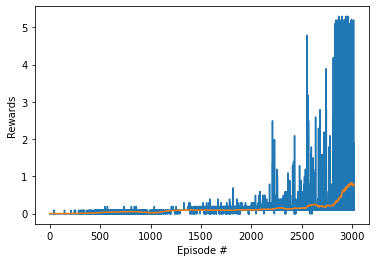

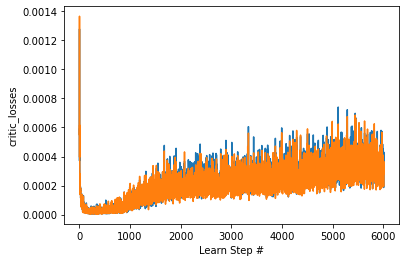

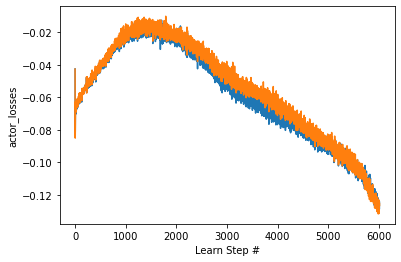

-------------------------------------
-------------------------------------
Summary :
-------------------------------------
-------------------------------------
Config Parameters    : 
gamma                : 0.99
tau                  : 0.01
action_size          : 2
state_size           : 24
hidden_size          : 256
buffer_size          : 50000
batch_size           : 256
seed                 : 64
max_episodes         : 3023
dropout              : 0.01
learn_every          : 1
learn_num            : 2
critic_learning_rate : 0.001
actor_learning_rate  : 0.001
noise_decay          : 0.999
sigma                : 1
num_agents           : 2
env_file_name        : Tennis_Windows_x86_64/Tennis.exe
load_model           : False
save_model           : True
train_mode           : True
brain_name           : TennisBrain


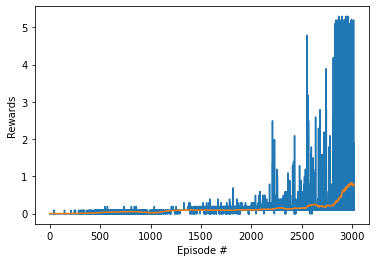

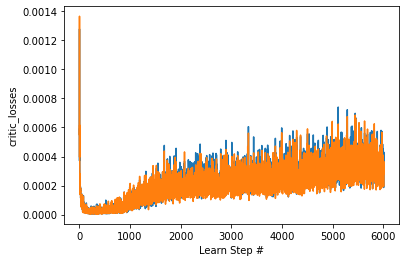

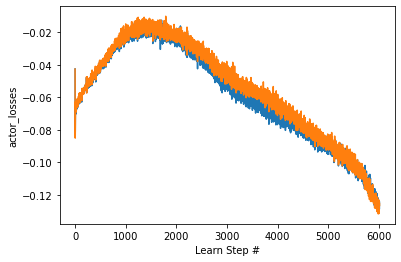

In [6]:
from maddpg import maddpg
import cProfile
DoProfile = False

config = {
    'gamma'               : 0.99,
    'tau'                 : 0.01,
    'action_size'         : action_size,
    'state_size'          : state_size,
    'hidden_size'         : 256,
    'buffer_size'         : 50000,
    'batch_size'          : 256,
    'seed'                : 86,
    'max_episodes'        : 3023,
    'dropout'             : 0.01,      # currently not active
    'learn_every'         : 1,
    'learn_num'           : 2,
    'critic_learning_rate': 1e-3,
    'actor_learning_rate' : 1e-3,
    'noise_decay'         : 0.999,
    'sigma'               : 1,
    'num_agents'          : num_agents,
    'env_file_name'       : env_file_name,
    'load_model'          : False,
    'save_model'          : True,
    'train_mode'          : True,
    'brain_name'          : brain_name}

def print_config(config):
    print('Config Parameters    : ')
    for c,k in config.items():
        print('{:20s} : {}'.format(c,k))

config_list = []
result_list = []
var_range = []
# batch = [512,1024]
# nd = [0.999, 0.998]
# for l in learn:
    # for b in batch:
        # var_range.append([l,b])
        # for h in hidden:
            # for n in nd:
var_range = [0.05] #, 0.1, 0.15, 0.2, 0.4, 0.6] # , 0.999975] # , 0.6, 0.7, 0.8] #, 0.45, 0.5]
# var_range = [0.9998, 0.9999, 0.99995] # , 0.0003, 0.0005, 0.001]# [0.2, 0.25, 0.3]
selected_seeds = [64] # [31,36,43,44] # 24,26, 33] # [8,16] # [7,9,13,15]
# [8,16] for learn2,sig6, hidden256, batch 256, ind
# [41,43,48,50,54,55,57,62,64,67,77,86]
# num_runs = 50
for param in range(len(var_range)):
    alt_config = config.copy()
    # alt_config['sigma'] = var_range[param]
    # alt_config['noise_decay'] = var_range[param]
    # alt_config['noise_scale_trigger'] = var_range[param]
    # alt_config['actor_learning_rate'] = var_range[param]
    # alt_config['learn_every_low'] = var_range[param][0]
    num_runs = len(selected_seeds)
    for main in range(num_runs):#len(tau_range)):
        print('-------------------------------------')
        print('New Run :')
        print('-------------------------------------')
        # env = UnityEnvironment(file_name=env_file_name,no_graphics=True)
        # brain_name = env.brain_names[0]
        # brain = env.brains[brain_name]
        # alt_config['seed'] += 1
        alt_config['seed'] = selected_seeds[main]
        print_config(alt_config)
        config_list.append(alt_config.copy())
        alt_config['brain_name'] = brain_name
        agent = maddpg(env, alt_config)
        if DoProfile:cProfile.run("results = agent.train()",'PerfStats')
        else:results = agent.train()
        result_list.append(results)
        # all_rewards,avg_rewards,critic_losses,actor_losses = agent.train()
        print_config(alt_config)
        plot_results(results)
        
print('-------------------------------------')
print('-------------------------------------')
print('Summary :')
print('-------------------------------------')
print('-------------------------------------')
for param in range(len(var_range)):
    for main in range(num_runs):
        print_config(config_list[param*num_runs+main])
        plot_results(result_list[param*num_runs+main])
    
env.close()

# 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```